In [ ]:
# import sys
# import os

# # Add the parent directory of Lab_Equipment to the Python path
# sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from ...Config import config 

ImportError: attempted relative import with no known parent package

In [ ]:
import sys
import os

# Add the parent directory of Lab_Equipment to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

In [3]:
%load_ext autoreload
%aimport  Lab_Equipment.OpticalSimulations.libs.CoupMatrixAndMetricAnalysisFuncitons
%aimport  Lab_Equipment.OpticalSimulations.libs.OpticalOperators
%aimport  Lab_Equipment.PlotingFunctions.ComplexPlotFunction
%aimport  Lab_Equipment.OpticalSimulations.libs.GaussianBeamBasis
%aimport  Lab_Equipment.OpticalSimulations.libs.GeneralFunctions
# %aimport  Lab_Equipment.OpticalSimulations.libs..SaveMaskToBinFile

# %aimport  Lab_Equipment.OpticalSimulations.libs..ModelabProcessBatchFile
%aimport  Lab_Equipment.OpticalSimulations.libs.QuantumGateGenerator
%aimport Lab_Equipment.OpticalSimulations.libs.MPLCFunctions


%autoreload 1

ModuleNotFoundError: No module named 'Lab_Equipment'

In [ ]:

import os
import numpy as np
import scipy.io
import copy
import math
# from scipy.io import savemat loadmat
import matplotlib.pyplot as plt
import sys
import ipywidgets
import scipy.optimize as opt
# import ComplexPlotFunction as cmplxplt
# import AnalysisFuncitons as ProCouplMat
# Global Ploting properties and style
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = [3,3]
# from scipy.fft import fft, fftfreq, fftshift, fft2,ifft2,rfft2,irfft2
import scipy.fft as fft 

import  Lab_Equipment.OpticalSimulations.libs.OpticalOperators as OpticOp
import  Lab_Equipment.PlotingFunctions.ComplexPlotFunction as cmplxplt
import Lab_Equipment.PlotingFunctions.SaveFigure as savefig
import  Lab_Equipment.OpticalSimulations.libs.GaussianBeamBasis as GaussBeams
# import  MyPythonLibs.GeneralFunctions as GenFuncs
import  Lab_Equipment.OpticalSimulations.libs.CoupMatrixAndMetricAnalysisFuncitons as MetricCals
# import  MyPythonLibs.SaveMaskToBinFile as SaveMaskBin
# import  Lab_Equipment.OpticalSimulations.libs.ModelabProcessBatchFile as Modelab
import  Lab_Equipment.OpticalSimulations.libs.QuantumGateGenerator as QGateGen
import Lab_Equipment.OpticalSimulations.libs.MPLCFunctions as MPLC



# Simulate the Masks REad Masks in and simulate the fields through the masks

In [1]:
FolderName=config.SLM_LIB_PATH

NameError: name 'config' is not defined

In [ ]:

FolderName=config.SLM_LIB_PATH 'MASKS'+slash
ModeType="DFTGate"
# ModeType="ZGate"
ModeType="XGate"

if(ModeType=="XGate"):
    MaskFileNamePrefix='Joel_XGate_17Modes_MDL1p13_SNR16p88_NoChange.mat'
elif(ModeType=="ZGate"):
    MaskFileNamePrefix='Joel_ZGate_17Modes_MDL0p3_SNR24p24_NoChange.mat'
elif(ModeType=="DFTGate"):
    MaskFileNamePrefix='GATE_017Fa_FromJoel_NotChanged.mat'
elif(ModeType=="LGAzim"):
    MaskFileNamePrefix='Gauss8p641toLG3p5Azmth17_Dis50p06_bandW50_Best_MASK.mat'
    
    # Gauss8p641toLG3p5Azmth17_Dis50p06_bandW50_Best_MASK
else:
    print("not valid mode type")
# MaskFileNamePrefix='GATE_017Fa_FromJoel_NotChanged.mat'
# MaskFileNamePrefix='Joel_XGate_17Modes_MDL1p13_SNR16p88_NoChange.mat'
# MaskFileNamePrefix='Joel_ZGate_17Modes_MDL0p3_SNR24p24_NoChange.mat'

# MaskFileNamePrefix='XGate_3p5LGAzthTo3p5LGAzth_Dis25p13_17modes_OffsetOn_symOff_adaptOffset_2500it_50BW_Best.mat'

# GateName="DFTGate"
# GateName="XGate"
# GateName="ZGate"


modeCountNew=1

PathName=FolderName+MaskFileNamePrefix
data_mat=scipy.io.loadmat(PathName)
MASKSCmplxTemp=data_mat["MASKS"]
MaskDimsFromFile=np.shape(MASKSCmplxTemp)
print(MaskDimsFromFile)

modeCountFromFile=MaskDimsFromFile[0]
planeCountFromFile=MaskDimsFromFile[1]
NyFromFile=MaskDimsFromFile[2]
NxFromFile=MaskDimsFromFile[3]


Nx=256
Ny=256
# Nx=512
# Ny=512
# MaskCmplx=np.zeros((1,Dims[0],Nx_New,Ny_New),dtype=complex)
# test=MASKSCmplxTemp[:,Nx_New//2:(Nx-Nx_New//2),Ny_New//2:(Ny-Ny_New//2)]
# MaskCmplx[0,:,:,:]=test


shiftY=((NyFromFile-Ny)//2)
shiftX=((NxFromFile-Nx)//2)

MASKSCmplx=copy.deepcopy(MASKSCmplxTemp)
MASKSCmplx_New= np.zeros([modeCountNew,planeCountFromFile,Ny,Nx],dtype=np.csingle)
for imode in range(modeCountFromFile):
    for iplane in range(planeCountFromFile):
        if(ModeType=="LGAzim"): 
            # MASKSCmplx_New[imode,iplane,:,:] =  np.flip(MASKSCmplx[imode,iplane,:,:],1)
            MASKSCmplx_New[imode,iplane,:,:] =  np.flip(np.transpose(MASKSCmplx[imode,iplane,:,:]),1)
            # MASKSCmplx_New[imode,iplane,:,:] =  ((MASKSCmplx[imode,iplane,:,:]))
            
            
        elif(ModeType=="DFTGate"): # It think this is beacuse Joel used my gates and there was some confusion about the mask orientaion or it could be some kind if flip I have done to the mask file It dont known
            MASKSCmplx_New[imode,iplane,:,:] =  np.flip(np.transpose(MASKSCmplx[imode,iplane,shiftY:-shiftY,shiftX:-shiftX]),1)
        else:
            # MASKSCmplx_New[imode,iplane,:,:] = (MASKSCmplx[imode,iplane,shiftY:-shiftY,shiftX:-shiftX])
            MASKSCmplx_New[imode,iplane,:,:] = np.flip(MASKSCmplx[imode,iplane,shiftY:-shiftY,shiftX:-shiftX],1)
            # MASKSCmplx_New[imode,iplane,:,:] =  np.flip(np.transpose(MASKSCmplx[imode,iplane,shiftY:-shiftY,shiftX:-shiftX]),1)
        # MASKSCmplx_New[imode,iplane,:,:] = np.transpose(MASKSCmplx[imode,iplane,shiftY:-shiftY,shiftX:-shiftX])
      
            
planeCount=planeCountFromFile
# Ny=NyFromFile
# Nx=NxFromFile
# Might need to change these parameters depending on masks
# planeCount=planeCountFromFile 
# modeCount=17
# Ny=NyFromFile
# Nx=NxFromFile
# NewMASKS= copy.deepcopy((MASKSCmplxTemp))
MASKSPhaseComplx=np.exp(1j*np.angle(MASKSCmplx_New));
# Propergate the Fields Through MPLC/
# FieldsFWD,FieldsBKWD,SimMetrics=MPLC.PropergateFieldThroughMPLC(planeCount,modeCount,pixelSize,FieldsFWD,FieldsBKWD,MASKSPhaseComplx,TransferMatrixToFirstPlane,TransferMatrixBetweenPlanes,TransferMatrixAfterLastPlane)
# ImageName='HGtoLG_cyclidricalLenTransform.eps'
# ImageName=GateName+'_MaskImageForFinalResults'+'.eps'

maxModeGroup=9
AzthmIdxArr=np.arange(-(maxModeGroup-1),(maxModeGroup-1)+1,dtype=int)
modeCount=np.size(AzthmIdxArr)


# InputWasitDistance=34.0e-3
InputWasitDistance=0.0e0
InputWasitDistance=-0.04765201372248836*2

# 0.04765201372248836
planeSpacing=25.13e-3
# planeSpacing=50.06e-3
OutputWasitDistance=0.0

# OutputWasitDistance=-0.04765201372248836*2
# OutputWasitDistance=0.02666544221929705*2


MFDout=3.50e-4


wavelength=1565e-9
z_dist=0
pixelSize=9.2e-6

xmin=(((-(Nx-1))/2.0))*pixelSize
xmax=(((Nx-1)/2.0))*pixelSize
ymin=(((-(Ny-1))/2.0))*pixelSize
ymax=(((Ny-1)/2.0))*pixelSize
xArr=np.linspace(xmin,xmax,Nx)
yArr=np.linspace(ymin,ymax,Ny)

XGrid,YGrid=np.meshgrid(xArr,yArr)


######
# This is for a phase mask plot out put 
######
# ImageName=GateName+'_MaskImageForFinalResults'+'.eps'
# PhaseArray=np.linspace(0,2*np.pi,256)
# PhaseArray=np.linspace(-1*np.pi,np.pi,256)

# MASKSPhase=np.zeros((Ny,planeCount*Nx))
# startIdx=0
#     # MASKS2D_2pi[:,startIdx:stopIdx]=np.angle(MASKSCmplx[iplane,:,:])
#     # MASKS2D_2pi[:,startIdx:stopIdx]=(2.0*np.pi/wavelengthCentral)*MASKS[iplane,:,:] * 1e-6
# for iplane in range(planeCount):
#     startIdx=startIdx
#     stopIdx=startIdx+Nx
#     MASKSPhase[:,startIdx:stopIdx]=np.arctan2(MASKSCmplx_New[0,iplane,:,:].imag,MASKSCmplx_New[0,iplane,:,:].real)
#     startIdx=stopIdx
# # MASKS2D_2pi=np.angle(MASKSCmplx.reshape(Ny,planeCount*Nx))
# # ImageName='MASKS2pi'
# plt.figure()
# plt.imshow((MASKSPhase),cmap='gray', vmin=-np.pi, vmax=np.pi)

# plt.axis('off')
# # plt.colorbar()
# plt.savefig(f'SavedImages/{ImageName}',bbox_inches='tight')


# startIdx=0
# for iplane in range(planeCount):
#     startIdx=startIdx
#     stopIdx=startIdx+Nx
#     # MASKS2D_2pi[:,startIdx:stopIdx]=np.angle(MASKSCmplx[iplane,:,:])
#     # MASKS2D_2pi[:,startIdx:stopIdx]=(2.0*np.pi/wavelengthCentral)*MASKS[iplane,:,:] * 1e-6
    
#     phase=np.arctan2(MASKSCmplx_New[0,iplane,:,:].imag,MASKSCmplx_New[0,iplane,:,:].real)
#     for iy in range(Ny):
#         for ix in range(Nx): 
#             if(phase[iy,ix]<0):
#                 phase[iy,ix]=phase[iy,ix]+2*np.pi
            
#     MASKSPhase[:,startIdx:stopIdx]=phase
#     startIdx=stopIdx
# plt.figure()
# plt.imshow((MASKSPhase),cmap='gray')
# plt.axis('off')
# plt.colorbar()
# plt.savefig(f'SavedImages/{ImageName}',bbox_inches='tight')

NameError: name 'slash' is not defined

In [291]:
modeCount

17

# Plot masks in a single figure

(-0.5, 2239.5, 319.5, -0.5)

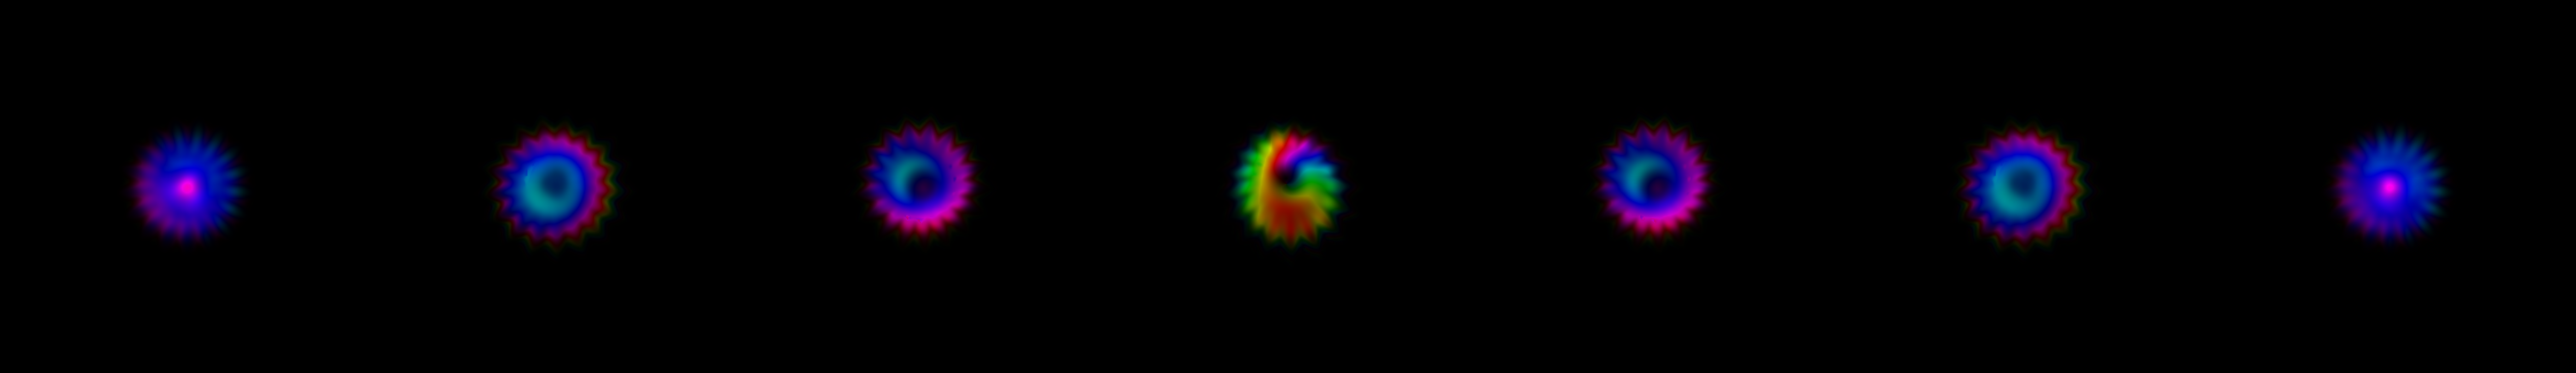

In [292]:

MASKS_forplot=np.zeros((MASKSCmplx.shape[2],planeCount*MASKSCmplx.shape[3]),complex)
startIdx=0
for iplane in range(planeCount):
    startIdx=startIdx
    stopIdx=startIdx+MASKSCmplx.shape[2]
    # MASKS_forplot[:,startIdx:stopIdx]=np.arctan2(Mask[0,iplane,:,:].imag,Mask[0,iplane,:,:].real)
    MASKS_forplot[:,startIdx:stopIdx]=MASKSCmplx[0,iplane,:,:]
    
    # MASKSPhase[startIdx:stopIdx,:]=np.arctan2(Mask[0,iplane,:,:].imag,Mask[0,iplane,:,:].real)
    
    startIdx=stopIdx

figsize = (100,100)

fig, ax = plt.subplots(1, 1, figsize=figsize)
ax.imshow(cmplxplt.ComplexArrayToRgb(MASKS_forplot, theme ="dark"))


ax.axis('off')

In [293]:
#Make transfer matrix of free space
# Angle=MaskAngle1
# Angle=0

dist=InputWasitDistance#*1e-6/np.cos(Angle)
TransferMatrixToFirstPlane=OpticOp.transferFunctionOfFreeSpace(XGrid,YGrid,dist,wavelength)
# planeSpacing=22.5e-3
planeSpacingArr=np.asarray([planeSpacing])
# planeSpacingArr=np.asarray([0.0275, 0.0275, 0.0225, 0.02,0.0175, 0.02])
planeDistCount=np.size(planeSpacingArr)

TransferMatrixBetweenPlanes=np.zeros([planeDistCount,Ny,Nx],dtype=complex)
for iplaneDist in range(planeDistCount):
    dist=planeSpacingArr[iplaneDist]
    TransferMatrixBetweenPlanes[iplaneDist,:,:]=OpticOp.transferFunctionOfFreeSpace(XGrid,YGrid,dist,wavelength)

dist=OutputWasitDistance
TransferMatrixAfterLastPlane=OpticOp.transferFunctionOfFreeSpace(XGrid,YGrid,dist,wavelength)
# TransferMatrixAfterLastPlane=np.ones([Nx,Ny],dtype=complex)
#Make LG Modes and Gaussian Spots and initialise the Field array
# initaslise Field
FieldsFWD=np.zeros((modeCount,planeCount+2,Ny,Nx),dtype=complex)
FieldsBKWD=np.zeros((modeCount,planeCount+2,Ny,Nx),dtype=complex)

#Make LG modes
modeIndices=np.zeros([2,modeCount],dtype=int);
modeIndices[1,:]=AzthmIdxArr;
# FieldsBKWD[:,0,:,:]=QGateGen.GenerateLGAzthmModes(x,y,0.0,MFDout,wavelength,modeIndices)
# IndexFilename='LGModesIndex_MG5.txt'
# ExperData.modeCount_ReconBasis=5
# FieldsFWD[:,0,:,:],_= Modelab.MakeIdealModes(ModeType,maxModeGroup,ExperData,IndexFilename)

FieldsFWD[:,0,:,:]=QGateGen.GenerateLGAzthmModes(xArr,yArr,0.0,MFDout,wavelength,modeIndices)
# Temp=QGateGen.GenerateLGAzthmModes(xArr,yArr,0.0,MFDout,wavelength,modeIndices)

# FieldsFWD[:,0,:,:],_=QGateGen.GenerateGateModes("DFTGate",Temp)
Temp=QGateGen.GenerateLGAzthmModes(xArr,yArr,OutputWasitDistance,MFDout,wavelength,modeIndices)

FieldsBKWD[:,0,:,:],GateMatrix=QGateGen.GenerateGateModes(ModeType,Temp)
# FieldsBKWD[:,0,:,:],GateMatrix=QGateGen.GenerateGateModes(ModeType,Temp)
# FieldsBKWD[:,0,:,:],GateMatrix=QGateGen.GenerateGateModes("DFTGate",FieldsBKWD[:,0,:,:])


Zmat=copy.deepcopy(GateMatrix)
# FieldsBKWD[:,0,:,:],DFTmat=QGateGen.GenerateGateModes("DFTGate",FieldsBKWD[:,0,:,:])


# FieldsFWD[:,0,:,:]=QGateGen.GenerateLGAzthmModes(xArr,yArr,0.0,MFDout,wavelength,modeIndices)
# FieldsFWD[:,0,:,:],GateMatrix=QGateGen.GenerateGateModes("DFTGate",FieldsFWD[:,0,:,:])

# dumb=QGateGen.GenerateLGAzthmModes(xArr,yArr,0.0,MFDout,wavelength,modeIndices)
# dumb,Xmat=QGateGen.GenerateGateModes("XGate",dumb)

if(ModeType=='LGAzim'):
    modeIndices=np.zeros([2,modeCount],dtype=int);
    FieldsFWD[:,0,:,:]=QGateGen.GenerateLGAzthmModes(xArr,yArr,0.0,864.1e-6,wavelength,modeIndices)
    modeIndices[1,:]=AzthmIdxArr;
    # FieldsBKWD[:,0,:,:]=QGateGen.GenerateGateModes("DFTGate",FieldsFWD[:,0,:,:])
    FieldsBKWD[:,0,:,:]=QGateGen.GenerateLGAzthmModes(xArr,yArr,0.0,MFDout,wavelength,modeIndices)
    # plt.imshow(cmplxplt.ComplexArrayToRgb(GateMatrix));


for imode in range(modeCount):
    #Make Gassuain spots
    # FieldsFWD[imode,0,:,:]=GaussBeams.GaussianBeam(MFDin, wavelength,pixelSize ,XGrid, YGrid, 0)
     #Prop forwards Field To first masks
    # FieldsFWD[imode,1,:,:]=GaussBeams.GaussianBeam(MFDin, wavelength,pixelSize ,XGrid, YGrid, InputWasitDistance)
    FieldsFWD[imode,1,:,:]=OpticOp.propagateField(FieldsFWD[imode,0,:,:],(TransferMatrixToFirstPlane))
    #Prop backWards Field To first masks
    FieldsBKWD[imode,1,:,:]=OpticOp.propagateField(FieldsBKWD[imode,0,:,:],np.conj(TransferMatrixAfterLastPlane))

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [-8 -7 -6 -5 -4 -3 -2 -1  0  1  2  3  4  5  6  7  8]]
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [-8 -7 -6 -5 -4 -3 -2 -1  0  1  2  3  4  5  6  7  8]]


IL= 0.1842004950503401 MDL= 1.136269797547224 Vis= 0.9799493145658769 sum(diag)=11.880212843154238 SNR=16.890743898764665


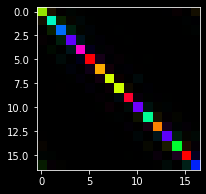

In [294]:
# Propergate the Fields Through MPLC
FieldsFWD,FieldsBKWD,SimMetrics=MPLC.PropergateFieldThroughMPLC(planeCount,modeCount,pixelSize,FieldsFWD,FieldsBKWD,MASKSPhaseComplx,TransferMatrixToFirstPlane,TransferMatrixBetweenPlanes,TransferMatrixAfterLastPlane)

In [244]:
diagonalAlongCouplingMat=np.unwrap(np.diag(np.angle(SimMetrics.CouplingMatrix)))
print(np.std(diagonalAlongCouplingMat))

5.337450578567373


In [60]:
ipywidgets.interact(OpticOp.PlotModes,imode=(0,modeCount-1,1),Modes=ipywidgets.fixed(FieldsFWD[:,0,:,:]))
ipywidgets.interact(OpticOp.PlotModes,imode=(0,modeCount-1,1),Modes=ipywidgets.fixed(FieldsBKWD[:,0,:,:]))

# ipywidgets.interact(OpticOp.PlotModes,imode=(0,modeCount-1,1),Modes=ipywidgets.fixed(FieldsFWD[:,-1,:,:]))


interactive(children=(IntSlider(value=8, description='imode', max=16), IntSlider(value=0, description='dimdirc…

interactive(children=(IntSlider(value=8, description='imode', max=16), IntSlider(value=0, description='dimdirc…

<function MyPythonLibs.OpticalOperators.PlotModes(imode, Modes, dimdirc=0)>

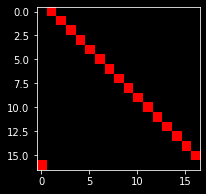

In [245]:
CoupleMAt=OpticOp.CalculateCouplingMatrix(FieldsFWD[:,0,:,:],FieldsBKWD[:,0,:,:],pixelSize)
plt.imshow(cmplxplt.ComplexArrayToRgb(CoupleMAt, theme ="dark"))


In [154]:
np.rad2deg(0.62)

35.52338329811104

In [236]:
wavelength

1.565e-06

In [ ]:
np.tan(2.143691220352175)*(np.pi * (MFDout/2)**2 / wavelength)/2

-0.04765201372248836

In [296]:
np.tan((2.143691220352175*3)/5)*(np.pi * (MFDout/2)**2 / wavelength)/2


0.10508097145615873

-8.763428120950323e-07
0.09172659531995356
-2.08753017423501
-2.032477358082415
[-0.24479308  0.00501886  0.27200226  0.28571326  0.26730397  0.21205195
  0.05664128 -0.30413752 -0.54980887]
[-1.44560546 -1.69150662 -2.05213666 -2.20753763 -2.26337996 -2.28190846
 -2.28526671]
1.8309665924127296
0.4353827218578002
0.7987974867853044


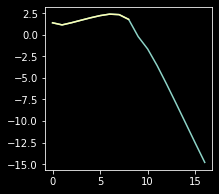

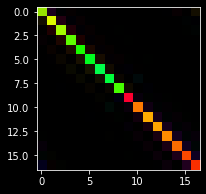

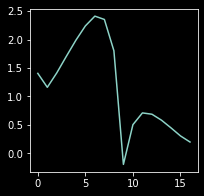

In [283]:

# plt.imshow(cmplxplt.ComplexArrayToRgb(SimMetrics.CouplingMatrix, theme ="dark"))
couplmat=CompleteModeMetrics_PhaseFixedAll.CouplingMatrix
couplmat=SimMetrics.CouplingMatrix

diagonalAlongCouplingMat=np.unwrap(np.diag(np.angle(couplmat)))


plt.plot(diagonalAlongCouplingMat)
plt.plot(diagonalAlongCouplingMat[0:9])
print(np.mean(np.gradient(diagonalAlongCouplingMat[0:9],AzthmIdxArr[0:9])))
print((diagonalAlongCouplingMat[8]-diagonalAlongCouplingMat[1])/(AzthmIdxArr[8]-AzthmIdxArr[1]))
print((diagonalAlongCouplingMat[-1]-diagonalAlongCouplingMat[9])/(AzthmIdxArr[-1]-AzthmIdxArr[9]))

print(np.mean(np.gradient(diagonalAlongCouplingMat[9:-1],AzthmIdxArr[9:-1])))
print((np.gradient(diagonalAlongCouplingMat[0:9],AzthmIdxArr[0:9])))
print((np.gradient(diagonalAlongCouplingMat[9:-1],AzthmIdxArr[9:-1])))
plt.figure(2)
phaseAdjustedCoupleMat=np.copy(couplmat)
scaleShift1=2.143691220352175
# scaleShift1=17/2
# scaleShift1=2.14

# scaleShift2=2.0875372914848147
modeIdxArray=range(17)
for imode in range(len(AzthmIdxArr)):
    if AzthmIdxArr[imode]<=0:
        # phaseAdjustedCoupleMat[imode,:]=couplmat[imode,:]*np.exp(1j*scaleShift1*(abs(AzthmIdxArr[imode])))
        phaseAdjustedCoupleMat[imode,:]=couplmat[imode,:]
        
        # phaseAdjustedCoupleMat[imode,:]=SimMetrics.CouplingMatrix[imode,:]*np.exp(1j*modeIdxArray[imode]+1)
    # elif AzthmIdxArr[imode]==0:
    #     phaseAdjustedCoupleMat[imode,:]=SimMetrics.CouplingMatrix[imode,:]
    else:
        phaseAdjustedCoupleMat[imode,:]=couplmat[imode,:]*np.exp(1j*(scaleShift1*(abs(AzthmIdxArr[imode]-1.0))))
        
plt.imshow(cmplxplt.ComplexArrayToRgb(couplmat, theme ="dark"))
plt.imshow(cmplxplt.ComplexArrayToRgb(phaseAdjustedCoupleMat, theme ="dark"))
diagonalAlongFixedCouplingMat=np.unwrap(np.diag(np.angle(phaseAdjustedCoupleMat)))
plt.figure(3)
plt.plot(np.diag(np.angle(phaseAdjustedCoupleMat)))
print(np.mean(diagonalAlongFixedCouplingMat[0:9]))
print(np.mean(diagonalAlongFixedCouplingMat[9:-1]))

print(np.std(diagonalAlongFixedCouplingMat[:]))





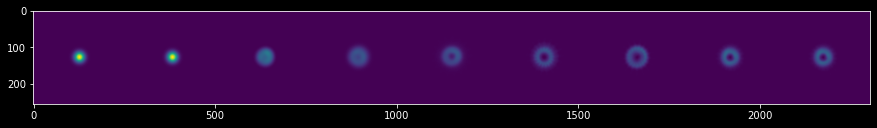

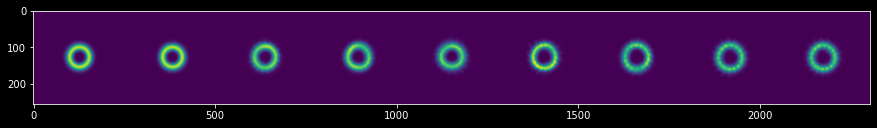

In [49]:
plt.figure(200)
# plt.title(modeIndices[1,imode])
reshaped_array = FieldsFWD[8,:,:,:].transpose(1, 0, 2).reshape(256, 9 * 256)
plt.imshow(abs(reshaped_array)**2)  
plt.figure(300)
reshaped_array = FieldsFWD[4,:,:,:].transpose(1, 0, 2).reshape(256, 9 * 256)
plt.imshow(abs(reshaped_array)**2)  

In [70]:
def Savefigure(Field,PlotType,PlotTheme,FilenameForSaveFile,Scale=1,Phase=True):
      Ny=Field.shape[0]
      Nx=Field.shape[1]
      if(Scale>1):
            # FieldToPlot=ExperData.Field[imode,int(Ny/Scale):Ny-int(Ny/Scale) ,int(Nx/Scale):Nx-int(Nx/Scale) ]
            FieldToPlot=Field[int(Ny/Scale):Ny-int(Ny/Scale) ,int(Nx/Scale):Nx-int(Nx/Scale) ]
      else:
            # FieldToPlot=np.squeeze(ExpoDataGateMode.Field[imode,:,:])
            # FieldToPlot=np.squeeze(ExpoDataInputMode.Field[imode,:,:])
            # FieldToPlot=np.squeeze(ExperData.Field[imode,:,:])
            FieldToPlot=(Field[:,:])

      
      width_px = Field.shape[0]
      height_px = Field.shape[1]
      dpi = 150  # Set the desired DPI

      # Calculate figsize in inches
      figsize = (width_px / dpi, height_px / dpi)
      # fig, ax=plt.subplots(1,1);
      figsize = (width_px / dpi, height_px / dpi)

      # Create the plot with the specified figsize
      # fig = plt.figure(figsize=figsize, dpi=dpi)
      fig, ax = plt.subplots(1, 1, figsize=figsize, dpi=dpi)
      if(PlotType=='c'):
            print("complex plot")
            # if(PlotTheme=="light"):
            #       ax.imshow(cmplxplt.ComplexArrayToRgb(Field, theme ='PlotTheme'))
            # else if(PlotTheme=="dark"):
            ax.imshow(cmplxplt.ComplexArrayToRgb(FieldToPlot, theme =PlotTheme))
            
      else:
            if(Phase==True):
                  # ax.imshow(Field,cmap='inferno') 
                  ax.imshow(Field,cmap='gray',vmin=-np.pi, vmax=np.pi)
                  # ax.imshow(Field,cmap='gray')
            else:
                  ax.imshow(Field,cmap='gray')
            
            # plt.clim(i,np.pi)
                
               
      ax.axis('off')
      plt.savefig(FilenameForSaveFile+".eps",format='eps', transparent=True,bbox_inches='tight',pad_inches=0)
      
########Example to save field to eps
# Fieldname="DarkKey"
# FieldToPlot=KeyMat
# PlotType="c"
# FilenameForSaveFile="SavedImages/"+Fieldname
# Savefigure(FieldToPlot,PlotType,"dark",FilenameForSaveFile)

complex plot
complex plot
complex plot
complex plot
complex plot
complex plot
complex plot
complex plot
complex plot


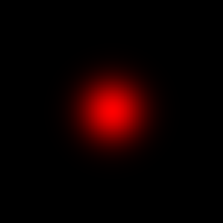

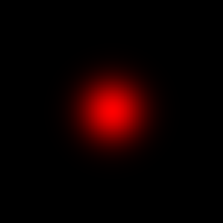

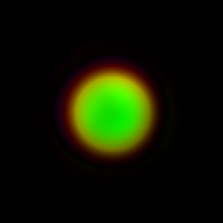

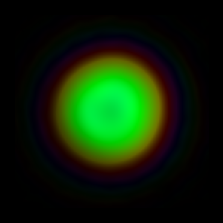

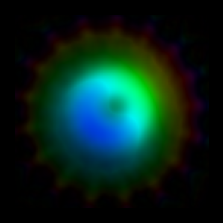

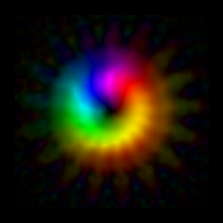

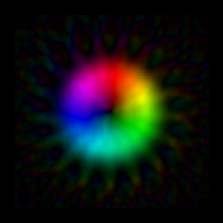

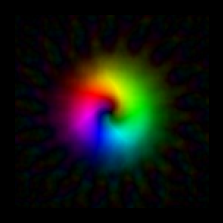

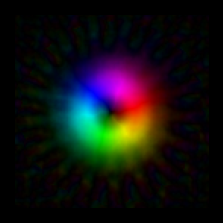

In [71]:
for iplane in range(planeCount+2):
    Fieldname=ModeType+"_IdealExper"+str(iplane)
    FieldToPlot=FieldsFWD[8,iplane,:,:]
    PlotType="c"
    FilenameForSaveFile="SavePlaneFigures/"+ModeType+"/"+Fieldname
    Savefigure(FieldToPlot,PlotType,"dark",FilenameForSaveFile,4)
    

In [58]:
phasemat=np.angle(Xmat)-np.angle(test.CouplingMatrix)
phasemat=np.angle(test.CouplingMatrix)
ampmat=np.abs(test.CouplingMatrix)


In [71]:
print((phasemat[:,0]))
print(ampmat[:,0])

[-2.78127505 -2.95679309 -2.95763185  0.0088842  -0.32560154 -2.58232532
  2.83668382 -1.6633384   2.87281348  2.29922593  1.47723952  1.71452254
  1.68761989  0.12972002 -0.14465751 -1.70752156 -1.13445934]
[4.56757419e-16 1.00000005e+00 1.59215382e-16 7.23122282e-16
 9.40452112e-16 5.95116628e-16 4.37610680e-16 1.80869181e-16
 4.04415273e-16 4.92770393e-16 3.81097288e-16 2.06378819e-16
 2.79202436e-16 4.23414700e-16 3.75185945e-16 2.88477569e-16
 4.44173375e-16]


In [78]:
ZmatNew

0.9411764719469188

Are A and B close within tolerance? False
[-2.95679309e+00 -2.58719395e+00 -2.21759481e+00 -1.84799568e+00
 -1.47839654e+00 -1.10879741e+00 -7.39198271e-01 -3.69599136e-01
  2.41502845e-16  3.69599136e-01  7.39198271e-01  1.10879741e+00
  1.47839654e+00  1.84799568e+00  2.21759481e+00  2.58719395e+00
  2.95679309e+00]


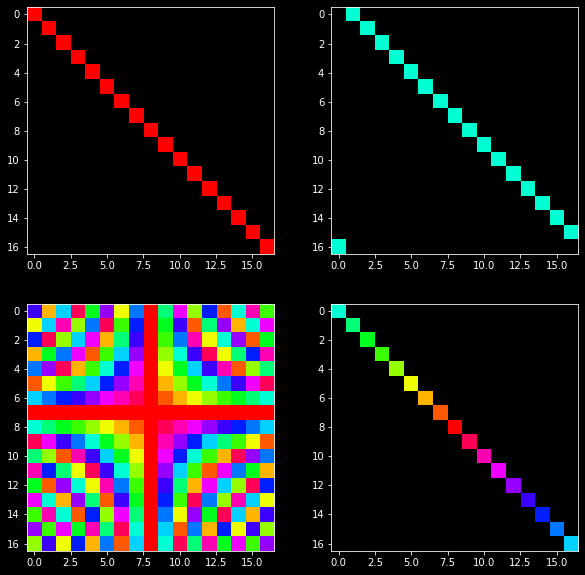

In [94]:

DFTZmat=np.matmul(DFTmat,Zmat)
XDFTmat=np.matmul(Xmat,DFTmat)

# DFTZmat=np.matmul(np.linalg.inv((DFTmat)),np.linalg.inv((DFTmat)))

# DFTZDFTinvmat=np.matmul(DFTZmat,np.linalg.inv(DFTmat))
# DFTZDFTinvmat=(DFTmat)@ np.transpose(Zmat) @ np.linalg.inv((DFTmat))
DFTZDFTinvmat= Xmat@ (DFTmat)@ (Zmat) @ np.linalg.inv((DFTmat))
# DFTZDFTinvmat=  (DFTZmat)@ (Zmat) @  (DFTZmat)

# DFTZmat

XDFTmat=np.matmul(Xmat,DFTmat)
tolerance = 1e-3  # Tolerance level for both real and imaginary parts
# are_close = np.allclose(DFTZmat, XDFTmat, atol=tolerance)
are_close = np.allclose(DFTZDFTinvmat, Zmat*np.exp(-1j*(2.95679309)), atol=tolerance)

# test.CouplingMatrix
print("Are A and B close within tolerance?", are_close)
plt.subplot(2,2,1)
plt.imshow(cmplxplt.ComplexArrayToRgb(DFTZDFTinvmat));
plt.subplot(2,2,2)
plt.imshow(cmplxplt.ComplexArrayToRgb(test.CouplingMatrix));
plt.subplot(2,2,3) 
plt.imshow(cmplxplt.ComplexArrayToRgb(DFTZmat));
plt.subplot(2,2,4)
plt.imshow(cmplxplt.ComplexArrayToRgb(Zmat));

print(np.angle(np.diag(DFTZDFTinvmat))-np.angle(np.diag(Zmat)))

IL= 2.36260229305556e-14 MDL= 3.2787133862811885e-14 Vis= 3.2071235700663744e-31 sum(diag)=292.6343534307523 SNR=304.9388430643761


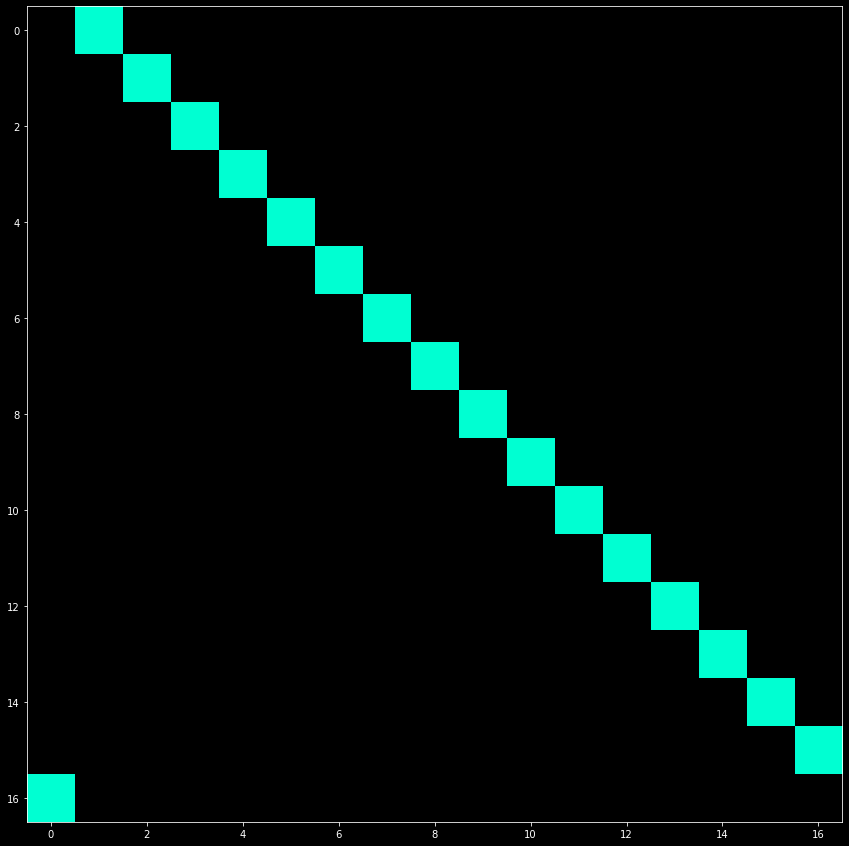

In [90]:
test=MetricCals.CalculateCoupMatrixAndMetrics(FieldsFWD[:,0,:,:] ,np.conj(FieldsBKWD[:,0,:,:]),pixelSize)
plt.imshow(cmplxplt.ComplexArrayToRgb(test.CouplingMatrix));

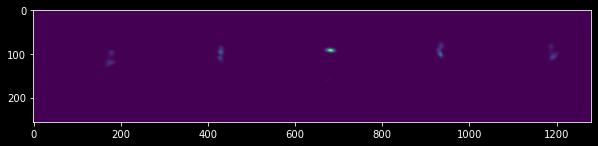

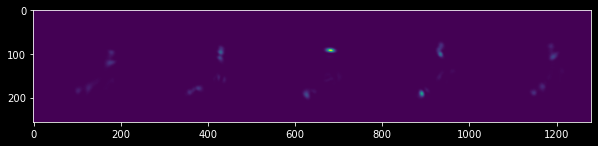

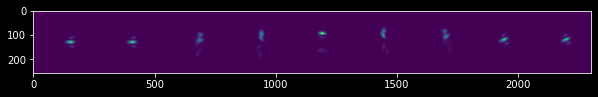

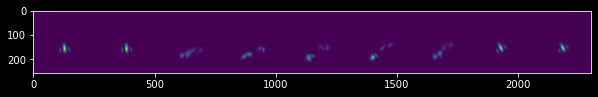

In [140]:
FieldsFWD.shape
# totalField=np.zeros(FieldsFWD.shape[1:])
totalField=np.zeros((5,256,256))

# for imode in range(modeCount):
totalField=totalField+np.abs(FieldsFWD[8,2:-2,:,:])**2
reshaped_array = totalField.transpose(1, 0, 2).reshape(256, 5 * 256)
plt.figure(1)
plt.imshow(abs(reshaped_array)**2) 

# totalField=totalField+np.abs(FieldsFWD[0,2:-2,:,:])**2
# reshaped_array = totalField.transpose(1, 0, 2).reshape(256, 5 * 256)
# plt.figure(2)
# plt.imshow(abs(reshaped_array)**2) 

totalField=totalField+np.abs(FieldsFWD[4,2:-2,:,:])**2
reshaped_array = totalField.transpose(1, 0, 2).reshape(256, 5 * 256)
plt.figure(3)
plt.imshow(abs(reshaped_array)**2) 



# reshaped_array = totalField.transpose(1, 0, 2).reshape(256, 5 * 256)
# plt.figure(1)
# plt.imshow(abs(reshaped_array)**2) 

plt.figure(200)
# plt.title(modeIndices[1,imode])
reshaped_array = FieldsFWD[8,:,:,:].transpose(1, 0, 2).reshape(256, 9 * 256)
plt.imshow(abs(reshaped_array)**2)  
plt.figure(300)
reshaped_array = FieldsFWD[4,:,:,:].transpose(1, 0, 2).reshape(256, 9 * 256)
plt.imshow(abs(reshaped_array)**2)  

In [98]:
MASKSPhaseComplx.shape

(1, 7, 256, 256)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


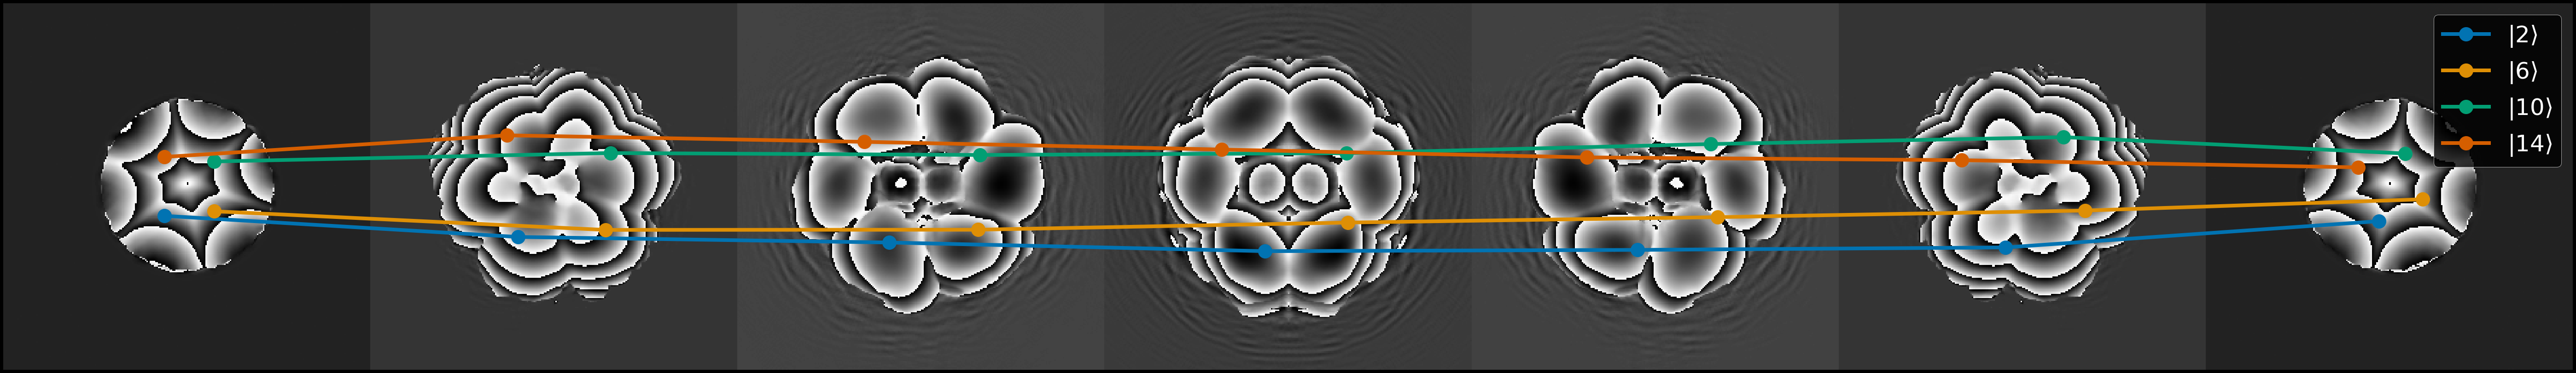

In [143]:
# # FieldsFWD.shape
# totalField=np.zeros(FieldsFWD.shape[1:])
# figsize = (100,100)
# plt.figure(100,figsize=figsize)
# for imode in range(modeCount):
#     totalField=totalField+np.abs(FieldsFWD[imode,:,:,:])**2

# # reshaped_array = totalField.transpose(1, 0, 2).reshape(256, 9 * 256)
# reshaped_array = np.angle(MASKSPhaseComplx[0,:,:,:]).transpose(1, 0, 2).reshape(256, 7 * 256)

# plt.imshow((reshaped_array)) 
# MASKSPhaseComplx[0,:,:,:]
# MASKS_forplot=np.zeros((MASKSPhaseComplx.shape[2],planeCount*MASKSPhaseComplx.shape[3]),complex)
MASKS_forplot=np.zeros((planeCount*MASKSPhaseComplx.shape[2],MASKSPhaseComplx.shape[3]))
startIdx=0
for iplane in range(planeCount):
    startIdx=startIdx
    stopIdx=startIdx+MASKSPhaseComplx.shape[2]
    # MASKS_forplot[:,startIdx:stopIdx]=np.arctan2(Mask[0,iplane,:,:].imag,Mask[0,iplane,:,:].real)
    # MASKS_forplot[:,startIdx:stopIdx]=MASKSPhaseComplx[0,iplane,:,:]
    MASKS_forplot[startIdx:stopIdx,:]=np.arctan2(MASKSPhaseComplx[0,iplane,:,:].imag,MASKSPhaseComplx[0,iplane,:,:].real)
    
    # MASKSPhase[startIdx:stopIdx,:]=np.arctan2(Mask[0,iplane,:,:].imag,Mask[0,iplane,:,:].real)
    
    startIdx=stopIdx
MASKS_forplot=np.transpose(MASKS_forplot)
figsize = (100,100)

fig, ax = plt.subplots(1, 1, figsize=figsize)
# ax.imshow(cmplxplt.ComplexArrayToRgb(MASKS_forplot, theme ="dark"))
ax.imshow((MASKS_forplot),cmap='gray', vmin=-np.pi, vmax=np.pi)
import seaborn as sns
sns.set_palette('colorblind') 
ax.axis('off')

modelist=[2,6,10,14]
# coloursarr=['r','g','orange','colorblind']
i=0
for imode in modelist:
    # plt.plot(centroid_arr[imode,1:-1,1]-256,centroid_arr[imode,1:-1,0],color=coloursarr[i],marker='o', markersize=30,linestyle='-',linewidth=8,label=modeIndices[1,imode])
    plt.plot(centroid_arr[imode,1:-1,1]-256,centroid_arr[imode,1:-1,0],marker='o', markersize=30,linestyle='-',linewidth=8,label=rf'$|{modelist[i]}\rangle$')
    
    i=i+1
plt.legend(fontsize=50)
# totalField=np.zeros(FieldsFWD.shape[1:])
# for imode in range(modeCount):
#     plt.figure(imode)
#     plt.title(modeIndices[1,imode])
#     reshaped_array = FieldsFWD[imode,:,:,:].transpose(1, 0, 2).reshape(256, 9 * 256)
#     plt.imshow(abs(reshaped_array)**2)  
#     plt.plot(centroid_arr[imode,:,1],centroid_arr[imode,:,0],'r','o',label=modeIndices[1,imode])

ImageName='Zgate_centroids.eps'
plt.savefig(f'SavedImages/{ImageName}',format='eps', transparent=True,bbox_inches='tight')

## find centroid of the field as it propergates through the systems

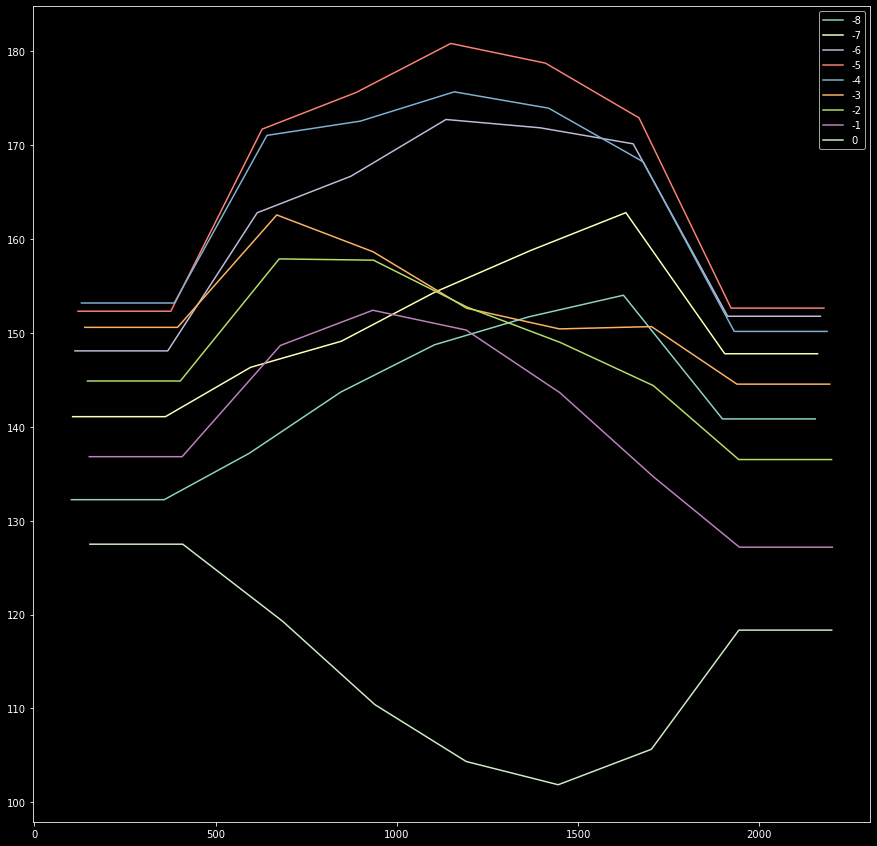

In [18]:
def find_centroid_complex_field(complex_field):
    # Calculate the magnitude of the complex numbers
    magnitudes = np.abs(complex_field)**2
    
    # Get the total 'mass' of the magnitudes
    total_mass = np.sum(magnitudes)
    
    # Get the indices of all elements in the array
    indices = np.indices(complex_field.shape)
    
    # Compute the weighted sum of the pixel coordinates
    x_center = np.sum(indices[1] * magnitudes) / total_mass
    y_center = np.sum(indices[0] * magnitudes) / total_mass
    
    return (x_center, y_center)

centroid_arr=np.zeros((modeCount,9,2))
for imode in range(modeCount):
    for iplane in range(9):      
       x,y= find_centroid_complex_field(FieldsFWD[imode,iplane,:,:])
       centroid_arr[imode,iplane,1]= x+iplane*256
       centroid_arr[imode,iplane,0]=y 
    # reshaped_array = FieldsFWD[imode,:,:,:].transpose(1, 0, 2).reshape(256, 9 * 256)
plt.figure()
for imode in range(modeCount//2+1):
    plt.plot(centroid_arr[imode,:,1],centroid_arr[imode,:,0],'-',label=modeIndices[1,imode])
plt.legend()

# plt.imshow(abs(reshaped_array)**2)  
    
# for imode in range(modeCount):
#     plt.figure(imode)
#     plt.title(modeIndices[1,imode])
#     reshaped_array = FieldsFWD[imode,:,:,:].transpose(1, 0, 2).reshape(256, 9 * 256)
#     plt.imshow(abs(reshaped_array)**2)  


## phase shift simulation to global zero phase

IL= 0.6908276620664062 MDL= 1.594782223503541 Vis= 0.9518364938705988 sum(diag)=11.035687528409637 SNR=12.958442573707458


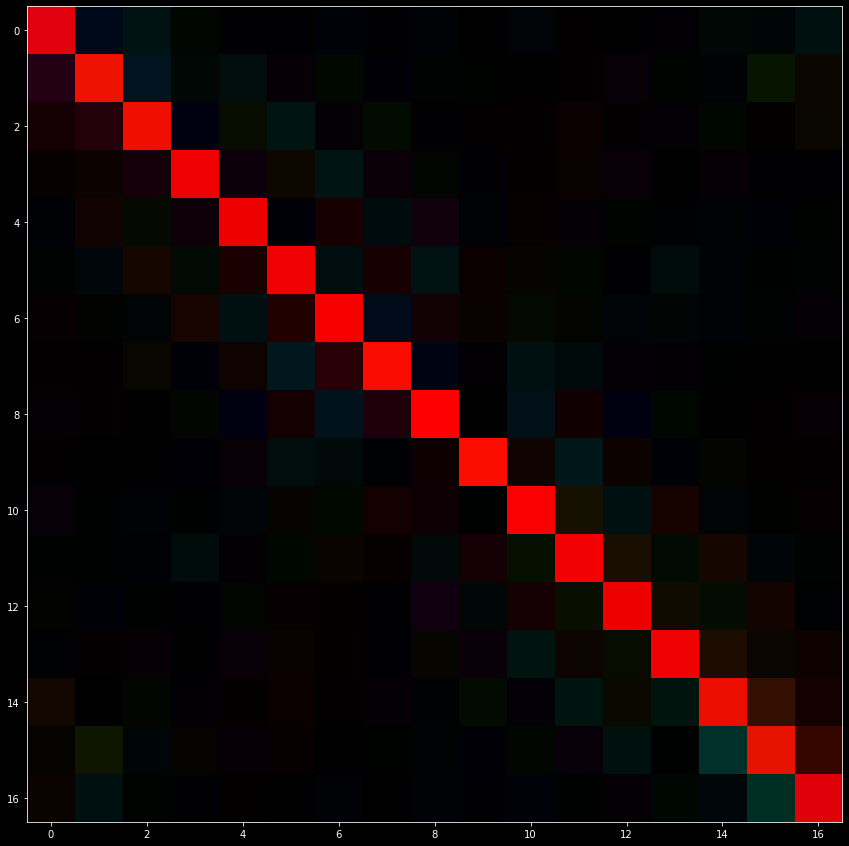

In [383]:
if(ModeType=="LGAzim"):
    artifical_fixPhase=True
    if(artifical_fixPhase):
        # Field_PhaseShifted=np.zeros(ExperData.Field.shape,dtype=complex)
        FieldFieldPhaseshiftToGauss=copy.deepcopy(FieldsFWD[:,-1,:,:])
        for imode in range(modeCount):
            PhaseShift=np.angle(SimMetrics.CouplingMatrix[imode,imode])
            FieldFieldPhaseshiftToGauss[imode,:,:]= FieldsFWD[imode,-1,:,:]*np.exp(1j*PhaseShift)
else:
    GaussPhaseLock=np.angle(np.sum((FieldsFWD[8,-1,:,:])*np.conj( FieldsBKWD[8,0,:,:] )))
    # print(np.angle(np.sum((IdealGauss)*(IdealGauss))))
    # print(np.angle(np.sum((Exper_Fields[GaussianIndex,:,:])*np.conj(Exper_Fields[GaussianIndex,:,:]))))
    FieldFieldPhaseshiftToGauss=copy.deepcopy(FieldsFWD[:,-1,:,:])
    FieldFieldPhaseshiftToGauss[:,:,:]=FieldsFWD[:,-1,:,:]*np.exp(-1j*GaussPhaseLock)

SimMetricsGlobalPhaseShift=MetricCals.CalculateCoupMatrixAndMetrics(FieldsBKWD[:,0,:,:] ,np.conj(FieldFieldPhaseshiftToGauss),pixelSize)

# plt.imshow(cmplxplt.ComplexArrayToRgb(XGateTestSimMetrics.CouplingMatrix));
plt.imshow(cmplxplt.ComplexArrayToRgb(SimMetricsGlobalPhaseShift.CouplingMatrix));

In [384]:
# # SimMetrics=MetricCals.CalculateCoupMatrixAndMetrics(FieldsBKWD[:,0,:,:],np.conj(FieldsFWD[:,-1,:,:]),pixelSize)
# # SimMetrics=MetricCals.CalculateCoupMatrixAndMetrics((FieldsFWD[:,-1,:,:]) ,(FieldsBKWD[:,0,:,:]),pixelSize)
# # SimMetrics=MetricCals.CalculateCoupMatrixAndMetrics(np.conj(FieldsFWD[:,-1,:,:]),(FieldsFWD[:,0,:,:]),pixelSize)
# testXGateCoupl=ModeMetrics_PhaseLocked.CouplingMatrix*np.exp(-1j*np.angle(SimMetrics.CouplingMatrix))
# testXGateCoupl=testXGateCoupl*np.exp(-1j*np.angle(testXGateCoupl[GaussIdx,GaussIdx]))
# XGateTestSimMetrics=MetricCals.CalculateCoupMatrixAndMetrics(Exper_PhaseLockedFields ,np.conj(FieldsFWD[:,-1,:,:]),pixelSize)

# # plt.imshow(cmplxplt.ComplexArrayToRgb(XGateTestSimMetrics.CouplingMatrix));
# plt.imshow(cmplxplt.ComplexArrayToRgb(testXGateCoupl));


                                                             
# plt.imshow(cmplxplt.ComplexArrayToRgb(SimMetrics.CouplingMatrix));

IL= 2.7965496530045417e-14 MDL= 4.0501753595238244e-14 Vis= 1.0 sum(diag)=12.304489633623826 SNR=293.80547675483535


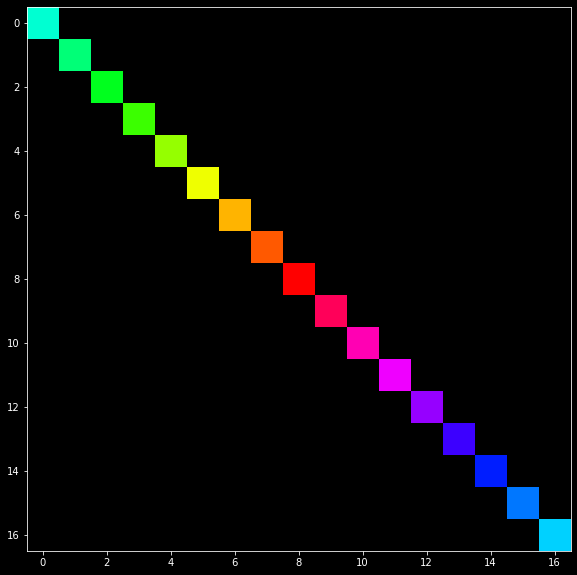

In [131]:
# plt.plot(np.unwrap(np.angle(np.diag(testXGateCoupl))))
# plt.plot(np.unwrap(np.angle(np.diag(XGateTestSimMetrics.CouplingMatrix))))
test2=MetricCals.CalculateCoupMatrixAndMetrics(FieldsBKWD[:,0,:,:] ,np.conj(FieldsFWD[:,0,:,:]),pixelSize)
plt.imshow(cmplxplt.ComplexArrayToRgb(test2.CouplingMatrix));

In [130]:
ipywidgets.interact(OpticOp.PlotModes,imode=(0,modeCount-1,1),Modes=ipywidgets.fixed(FieldsBKWD[:,0,:,:]))
ipywidgets.interact(OpticOp.PlotModes,imode=(0,modeCount-1,1),Modes=ipywidgets.fixed(FieldsFWD[:,0,:,:]))

interactive(children=(IntSlider(value=8, description='imode', max=16), Output()), _dom_classes=('widget-intera…

interactive(children=(IntSlider(value=8, description='imode', max=16), Output()), _dom_classes=('widget-intera…

<function MyPythonLibs.OpticalOperators.PlotModes(imode, Modes)>

In [387]:
ipywidgets.interact(OpticOp.PlotModes,imode=(0,ExperData.modeCount_ReconBasis-1,1),Modes=ipywidgets.fixed(FinalModes))

interactive(children=(IntSlider(value=8, description='imode', max=16), Output()), _dom_classes=('widget-intera…

<function MyPythonLibs.OpticalOperators.PlotModes(imode, Modes)>

# save everything to one file

In [388]:

import pickle
# Group the objects in a dictionary for clarity
# ModeMetrics=MetricCals.CalculateCoupMatrixAndMetrics(InputModes_Ideal, np.conj(ExperData.Field[:,ipol1,:,:]),ExperData.pixelSize)
data_to_save = {
    'ExperimentalData':ExperData,
    'PhaseLockedCouplingMatrix': ModeMetrics_PhaseLocked,
    'PhaseLockedField': Exper_PhaseLockedFields,
    'PhaseAdjustmentFromInputModesCouplingMatrix': CompleteModeMetrics_PhaseFixedAll,
    'PhaseAdjustmentFromInputModesField': FinalModes,
    'Ideal_OutputModes_Exper':InputModes_Ideal,
    'Ideal_InputModes_sim':FieldsFWD[:,0,:,:],
    'Ideal_OutputModes_sim':FieldsBKWD[:,0,:,:],
    'PhaseMasks':MASKSPhaseComplx,
    'OutputModes_sim':FieldsFWD[:,-1,:,:],
    'SimulationMetric':SimMetrics,
    'SimulationMetric_phaseOffset':SimMetricsGlobalPhaseShift,
    'OutputModes_sim_phaseOffset':FieldFieldPhaseshiftToGauss,
    'MFD_sim':MFDout,
    'pixelsize_sim':pixelSize,
    'wavelength':wavelength
    }

# Pickle the dictionary of objects
Filname='RawFullData/'+ModeType+'_FullData.pkl'
with open(Filname, 'wb') as file:
    pickle.dump(data_to_save, file)


In [9]:
New_CouplingMat.shape

(17, 17)

In [10]:
import pickle
# Group the objects in a dictionary for clarity
# ModeMetrics=MetricCals.CalculateCoupMatrixAndMetrics(InputModes_Ideal, np.conj(ExperData.Field[:,ipol1,:,:]),ExperData.pixelSize)
data_to_save = {
    'OriginalNoPhaseLockedCoupMat':New_CouplingMat
    }

# Pickle the dictionary of objects
Filname='RawFullData/'+ModeType+'_OriginalCoupMat.pkl'
with open(Filname, 'wb') as file:
    pickle.dump(data_to_save, file)
# New_CouplingMat

# Run the MPLC simulation over multiple wavelength

(1, 7, 320, 320)
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [-8 -7 -6 -5 -4 -3 -2 -1  0  1  2  3  4  5  6  7  8]]
(17, 256, 256)
IL= 0.9269253911955702 MDL= 2.3311257838467023 Vis= 0.9447236707617608 sum(diag)=10.80244200658877 SNR=12.327656021459203
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [-8 -7 -6 -5 -4 -3 -2 -1  0  1  2  3  4  5  6  7  8]]
(17, 256, 256)
IL= 0.9233098003058904 MDL= 2.318098917593239 Vis= 0.9450387084220484 sum(diag)=10.807207779455233 SNR=12.353926674147822
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [-8 -7 -6 -5 -4 -3 -2 -1  0  1  2  3  4  5  6  7  8]]
(17, 256, 256)
IL= 0.9197165217760523 MDL= 2.305193834393127 Vis= 0.9453487994006583 sum(diag)=10.811924245066661 SNR=12.37992369836486
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [-8 -7 -6 -5 -4 -3 -2 -1  0  1  2  3  4  5  6  7  8]]
(17, 256, 256)
IL= 0.9161462640514615 MDL= 2.292425271942204 Vis= 0.9456539351806322 sum(diag)=10.816590629724448 SNR=12.405641317008048


KeyboardInterrupt: 

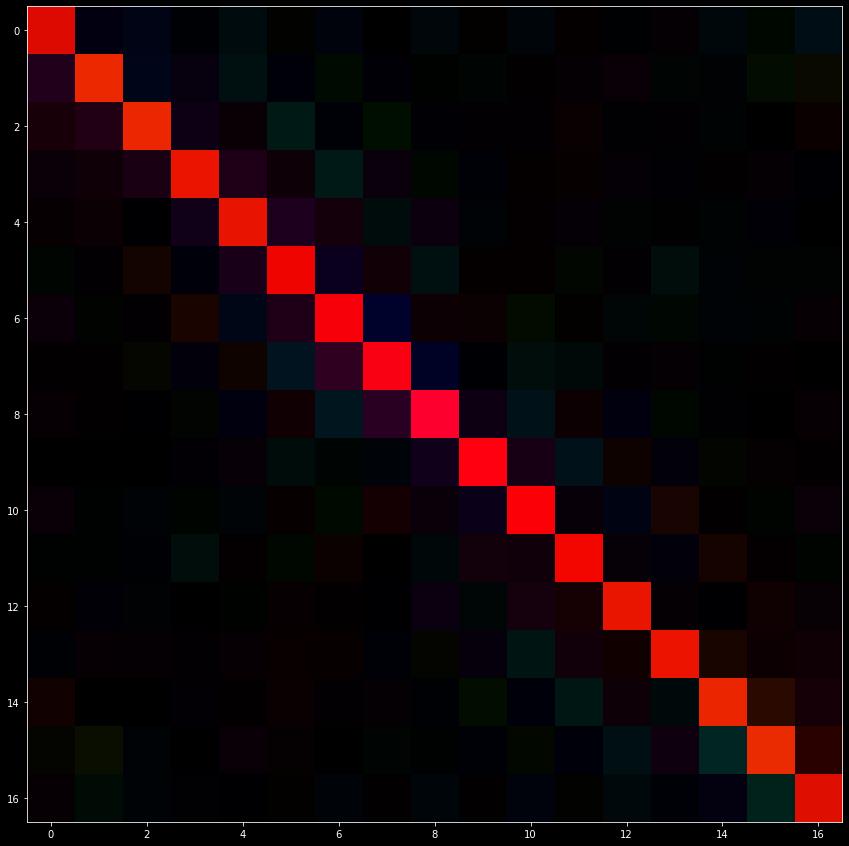

In [42]:
FolderName='MASKS'+slash
ModeType="DFTGate"
# ModeType="ZGate"
# ModeType="XGate"

if(ModeType=="XGate"):
    MaskFileNamePrefix='Joel_XGate_17Modes_MDL1p13_SNR16p88_NoChange.mat'
elif(ModeType=="ZGate"):
    MaskFileNamePrefix='Joel_ZGate_17Modes_MDL0p3_SNR24p24_NoChange.mat'
elif(ModeType=="DFTGate"):
    MaskFileNamePrefix='GATE_017Fa_FromJoel_NotChanged.mat'
elif(ModeType=="LGAzim"):
    MaskFileNamePrefix='Gauss8p641toLG3p5Azmth17_Dis50p06_bandW50_Best_MASK.mat'
    
    # Gauss8p641toLG3p5Azmth17_Dis50p06_bandW50_Best_MASK
else:
    print("not valid mode type")

modeCountNew=1

PathName=FolderName+MaskFileNamePrefix
data_mat=scipy.io.loadmat(PathName)
MASKSCmplxTemp=data_mat["MASKS"]
MaskDimsFromFile=np.shape(MASKSCmplxTemp)
print(MaskDimsFromFile)

modeCountFromFile=MaskDimsFromFile[0]
planeCountFromFile=MaskDimsFromFile[1]
NyFromFile=MaskDimsFromFile[2]
NxFromFile=MaskDimsFromFile[3]

Nx=256
Ny=256

shiftY=((NyFromFile-Ny)//2)
shiftX=((NxFromFile-Nx)//2)

MASKSCmplx=copy.deepcopy(MASKSCmplxTemp)
MASKSCmplx_New= np.zeros([modeCountNew,planeCountFromFile,Ny,Nx],dtype=np.csingle)
for imode in range(modeCountFromFile):
    for iplane in range(planeCountFromFile):
        if(ModeType=="LGAzim"): 
            # MASKSCmplx_New[imode,iplane,:,:] =  np.flip(MASKSCmplx[imode,iplane,:,:],1)
            MASKSCmplx_New[imode,iplane,:,:] =  np.flip(np.transpose(MASKSCmplx[imode,iplane,:,:]),1)
            # MASKSCmplx_New[imode,iplane,:,:] =  ((MASKSCmplx[imode,iplane,:,:]))
            
            
        elif(ModeType=="DFTGate"): # It think this is beacuse Joel used my gates and there was some confusion about the mask orientaion or it could be some kind if flip I have done to the mask file It dont known
            MASKSCmplx_New[imode,iplane,:,:] =  np.flip(np.transpose(MASKSCmplx[imode,iplane,shiftY:-shiftY,shiftX:-shiftX]),1)
        else:
            # MASKSCmplx_New[imode,iplane,:,:] = (MASKSCmplx[imode,iplane,shiftY:-shiftY,shiftX:-shiftX])
            MASKSCmplx_New[imode,iplane,:,:] = np.flip(MASKSCmplx[imode,iplane,shiftY:-shiftY,shiftX:-shiftX],1)
            # MASKSCmplx_New[imode,iplane,:,:] =  np.flip(np.transpose(MASKSCmplx[imode,iplane,shiftY:-shiftY,shiftX:-shiftX]),1)
        # MASKSCmplx_New[imode,iplane,:,:] = np.transpose(MASKSCmplx[imode,iplane,shiftY:-shiftY,shiftX:-shiftX])
      
            
planeCount=planeCountFromFile
MASKSPhaseComplx=np.exp(1j*np.angle(MASKSCmplx_New));

maxModeGroup=9
AzthmIdxArr=np.arange(-(maxModeGroup-1),(maxModeGroup-1)+1,dtype=int)
modeCount=np.size(AzthmIdxArr)


# InputWasitDistance=34.0e-3
InputWasitDistance=0.0e0
planeSpacing=25.13e-3
# planeSpacing=50.06e-3

OutputWasitDistance=0.0e0
MFDout=3.50e-4



z_dist=0
pixelSize=9.2e-6

xmin=(((-(Nx-1))/2.0))*pixelSize
xmax=(((Nx-1)/2.0))*pixelSize
ymin=(((-(Ny-1))/2.0))*pixelSize
ymax=(((Ny-1)/2.0))*pixelSize
xArr=np.linspace(xmin,xmax,Nx)
yArr=np.linspace(ymin,ymax,Ny)

XGrid,YGrid=np.meshgrid(xArr,yArr)
wavelength_arr=np.linspace(1510,1610,200)*1e-9 #1565e-9
# metric_wavelenght=[]
IL_wavelen=[]
MDL_wavelen=[]
SNR_wavelen=[]
V_wavelen=[]
for iwave in range(wavelength_arr.size):
    wavelength=wavelength_arr[iwave]
    dist=InputWasitDistance#*1e-6/np.cos(Angle)
    TransferMatrixToFirstPlane=OpticOp.transferFunctionOfFreeSpace(XGrid,YGrid,dist,wavelength)
    # planeSpacing=22.5e-3
    planeSpacingArr=np.asarray([planeSpacing])
    # planeSpacingArr=np.asarray([0.0275, 0.0275, 0.0225, 0.02,0.0175, 0.02])
    planeDistCount=np.size(planeSpacingArr)

    TransferMatrixBetweenPlanes=np.zeros([planeDistCount,Ny,Nx],dtype=complex)
    for iplaneDist in range(planeDistCount):
        dist=planeSpacingArr[iplaneDist]
        TransferMatrixBetweenPlanes[iplaneDist,:,:]=OpticOp.transferFunctionOfFreeSpace(XGrid,YGrid,dist,wavelength)

    dist=OutputWasitDistance
    TransferMatrixAfterLastPlane=OpticOp.transferFunctionOfFreeSpace(XGrid,YGrid,dist,wavelength)
    TransferMatrixAfterLastPlane=np.ones([Nx,Ny],dtype=complex)
    #Make LG Modes and Gaussian Spots and initialise the Field array
    # initaslise Field
    FieldsFWD=np.zeros((modeCount,planeCount+2,Ny,Nx),dtype=complex)
    FieldsBKWD=np.zeros((modeCount,planeCount+2,Ny,Nx),dtype=complex)

    #Make LG modes
    modeIndices=np.zeros([2,modeCount],dtype=int);
    modeIndices[1,:]=AzthmIdxArr;
    # FieldsBKWD[:,0,:,:]=QGateGen.GenerateLGAzthmModes(x,y,0.0,MFDout,wavelength,modeIndices)

    FieldsFWD[:,0,:,:]=QGateGen.GenerateLGAzthmModes(xArr,yArr,0.0,MFDout,wavelength,modeIndices)
    FieldsBKWD[:,0,:,:],GateMatrix=QGateGen.GenerateGateModes(ModeType,FieldsFWD[:,0,:,:])

    if(ModeType=='LGAzim'):
        modeIndices=np.zeros([2,modeCount],dtype=int);
        FieldsFWD[:,0,:,:]=QGateGen.GenerateLGAzthmModes(xArr,yArr,0.0,864.1e-6,wavelength,modeIndices)
        modeIndices[1,:]=AzthmIdxArr;
        # FieldsBKWD[:,0,:,:]=QGateGen.GenerateGateModes("DFTGate",FieldsFWD[:,0,:,:])
        FieldsBKWD[:,0,:,:]=QGateGen.GenerateLGAzthmModes(xArr,yArr,0.0,MFDout,wavelength,modeIndices)
        # plt.imshow(cmplxplt.ComplexArrayToRgb(GateMatrix));


    for imode in range(modeCount):
        #Make Gassuain spots
        # FieldsFWD[imode,0,:,:]=GaussBeams.GaussianBeam(MFDin, wavelength,pixelSize ,XGrid, YGrid, 0)
        #Prop forwards Field To first masks
        # FieldsFWD[imode,1,:,:]=GaussBeams.GaussianBeam(MFDin, wavelength,pixelSize ,XGrid, YGrid, InputWasitDistance)
        FieldsFWD[imode,1,:,:]=OpticOp.propagateField(FieldsFWD[imode,0,:,:],(TransferMatrixToFirstPlane))
        #Prop backWards Field To first masks
        FieldsBKWD[imode,1,:,:]=OpticOp.propagateField(FieldsBKWD[imode,0,:,:],np.conj(TransferMatrixAfterLastPlane))
    # Propergate the Fields Through MPLC
    FieldsFWD,FieldsBKWD,SimMetrics=MPLC.PropergateFieldThroughMPLC(planeCount,modeCount,pixelSize,FieldsFWD,FieldsBKWD,MASKSPhaseComplx,TransferMatrixToFirstPlane,TransferMatrixBetweenPlanes,TransferMatrixAfterLastPlane)
    # metric_wavelenght.append(SimMetrics)
    IL_wavelen.append(SimMetrics.IL)
    MDL_wavelen.append(SimMetrics.MDL)
    SNR_wavelen.append(SimMetrics.SNR)
    V_wavelen.append(SimMetrics.Visibility)

In [ ]:
# MASKSCmplx

MASKS_forplot=np.zeros((MASKSCmplx.shape[2],planeCount*MASKSCmplx.shape[3]))
# MASKSPhase=np.zeros((planeCount*Mask.shape[2],Mask.shape[3]))

startIdx=0
    # MASKS2D_2pi[:,startIdx:stopIdx]=np.angle(MASKSCmplx[iplane,:,:])
    # MASKS2D_2pi[:,startIdx:stopIdx]=(2.0*np.pi/wavelengthCentral)*MASKS[iplane,:,:] * 1e-6
for iplane in range(planeCount):
    startIdx=startIdx
    stopIdx=startIdx+MASKSCmplx.shape[2]
    # MASKS_forplot[:,startIdx:stopIdx]=np.arctan2(Mask[0,iplane,:,:].imag,Mask[0,iplane,:,:].real)
    MASKS_forplot[:,startIdx:stopIdx]=MASKSCmplx[0,iplane,:,:]
    
    # MASKSPhase[startIdx:stopIdx,:]=np.arctan2(Mask[0,iplane,:,:].imag,Mask[0,iplane,:,:].real)
    
    startIdx=stopIdx
# MASKS2D_2pi=np.angle(MASKSCmplx.reshape(Ny,planeCount*Nx))
# ImageName='MASKS2pi'
# width_px = MASKSPhase.shape[0]
# height_px = MASKSPhase.shape[1]
# dpi = 300  # Set the desired DPI

# # Calculate figsize in inches
# figsize = (width_px / dpi, height_px / dpi)
figsize = (100,100)

# # fig, ax=plt.subplots(1,1);
# figsize = (width_px / dpi, height_px / dpi)

# Create the plot with the specified figsize
# fig = plt.figure(figsize=figsize, dpi=dpi)
fig, ax = plt.subplots(1, 1, figsize=figsize)
# ax.imshow((MASKSPhase),cmap='gray', vmin=-np.pi, vmax=np.pi)
# ax.imshow((MASKSPhase),cmap='gray', vmin=-np.pi, vmax=np.pi)
ax.imshow(cmplxplt.ComplexArrayToRgb(MASKS_forplot, theme ="dark"))


ax.axis('off')

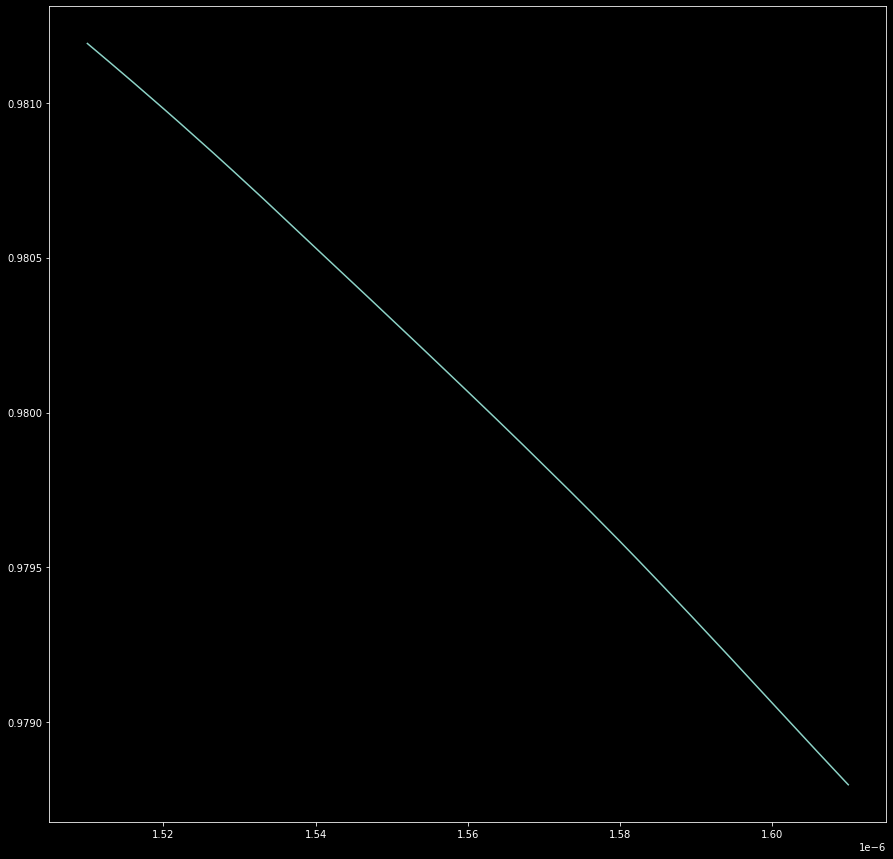

In [41]:
# Using list comprehension to access the name attribute of each Fruit object
# IL_wavelength = [metric_wavelenght.IL for fruit in fruits]
# plt.plot(wavelength_arr,IL_wavelen)
# plt.plot(wavelength_arr,MDL_wavelen)
# plt.plot(wavelength_arr,SNR_wavelen)
plt.plot(wavelength_arr,V_wavelen)




In [35]:

import pickle
# Group the objects in a dictionary for clarity
# ModeMetrics=MetricCals.CalculateCoupMatrixAndMetrics(InputModes_Ideal, np.conj(ExperData.Field[:,ipol1,:,:]),ExperData.pixelSize)
data_to_save = {
    'Wavelength':wavelength_arr,
    'IL':IL_wavelen,
    'MDL': MDL_wavelen,
    'SNR': SNR_wavelen,
    'Vis': V_wavelen
    }

# Pickle the dictionary of objects
Filname='RawFullData/'+ModeType+'_Metrics_WavelengthSimData.pkl'
with open(Filname, 'wb') as file:
    pickle.dump(data_to_save, file)


# EVery thing below here is testing things out. There is a coupling matrix way of phase locking which works but I went with the mode way just beacuse it was a little easier to understand

# Lets see if we can fix the apparent Gouy phase in the coupling matrix

In [31]:
allCoupleDiags=np.zeros((2,ExperData.modeCount_ReconBasis))

In [41]:
CouplingdiagElements=np.angle(np.diag(ModeMetrics_PhaseLocked.CouplingMatrix))
allCoupleDiags[0,:]=CouplingdiagElements

8
Inital Guesses for the n mean and scale term of the Poisson distrabution n_mean= -0.08908923814428132, scale= -4.6525226204256273e-10
Fitted n mean and scale term of the Poisson distrabution n_mean= -0.0813500031729368, scale= -0.07297719536465495
[[-0.06573918]]


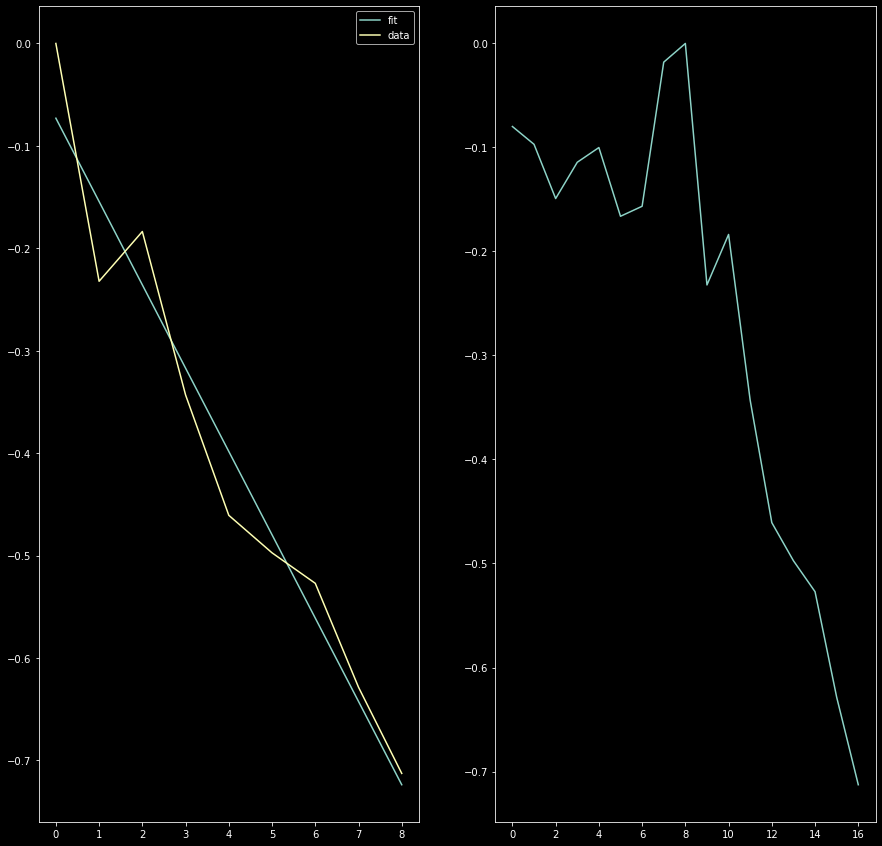

In [33]:
def LinearFunction(x,m,b):
    y=m*x+b
    return y.reshape(-1) # you dont have to do the reshape it is just there if you had a 2D or higher function



# # select a region in which you want to look at 
# xmax=np.where(N_photons==30)[0][0]#looked at the graph to get the 80 value NOTE the index stuff [0][0] is just what you need to do for where as it give it back in some array format
# xmin=1

# prob_adjust=copy.deepcopy(probabilties)
# prob_adjust[0:xmin]=0 #set every thing else to zero
# prob_adjust[xmax:-1]=0

#make some good guesses for the n_mean and scale term of the poisson distrabution

CouplingdiagElements=np.angle(np.diag(ModeMetrics_PhaseLocked.CouplingMatrix))
# CouplingdiagElements=allCoupleDiags[2,:]
print(CouplingdiagElements.shape[0]//2)
Ncouple_half=CouplingdiagElements.shape[0]//2
Ncouple_half_arr=np.arange(Ncouple_half,ExperData.modeCount_ReconBasis)-Ncouple_half
CouplingdiagElements_half=CouplingdiagElements[Ncouple_half:]

# Ncouple_half_arr=np.arange(Ncouple_half,ExperData.modeCount_ReconBasis)
# CouplingdiagElements_half=CouplingdiagElements[:Ncouple_half+1]

m_guess=(CouplingdiagElements_half[-1]-CouplingdiagElements_half[0])/(Ncouple_half)
b_guess=CouplingdiagElements_half[0]
initial_guess = np.asarray([m_guess,b_guess]) 

#set some bounds for the fit, dont really need these
# param_bounds = ([0,0], [np.max(N_photons),2])  # Example bounds: a>=0, no bounds for b, c

# do the fit
# popt, pcov = opt.curve_fit(PoissonFunction, (N_photons), prob_adjust, p0=initial_guess, bounds=param_bounds)
popt, pcov = opt.curve_fit(LinearFunction, (Ncouple_half_arr), CouplingdiagElements_half,p0=initial_guess,)


# pass the fit values back to the function to make a model array from the fit
LinearFit = LinearFunction((Ncouple_half_arr),*popt)

print('Inital Guesses for the n mean and scale term of the Poisson distrabution n_mean= '+str(initial_guess[0])+', scale= '+str(initial_guess[1]))
print('Fitted n mean and scale term of the Poisson distrabution n_mean= '+str(popt[0])+', scale= '+str(popt[1]))
z0 = np.pi * (ExperData.waist)**2 / ExperData.wavelen
z_1=np.tan(initial_guess[0])*z0
print(z_1)

plt.figure()
plt.subplot(1,2,1)
plt.plot(Ncouple_half_arr,LinearFit,label='fit')
plt.plot(Ncouple_half_arr,CouplingdiagElements_half,label='data')
plt.legend()

plt.subplot(1,2,2)
plt.plot((CouplingdiagElements))

# CouplingdiagElements=np.diag(New_CouplingMat)
# print(CouplingdiagElements.shape[0]//2)

# Ncouple_half=CouplingdiagElements.shape[0]//2
# print(Ncouple_half)
# # plt.plot(np.angle(CouplingdiagElements[Ncouple_half:-1]))



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


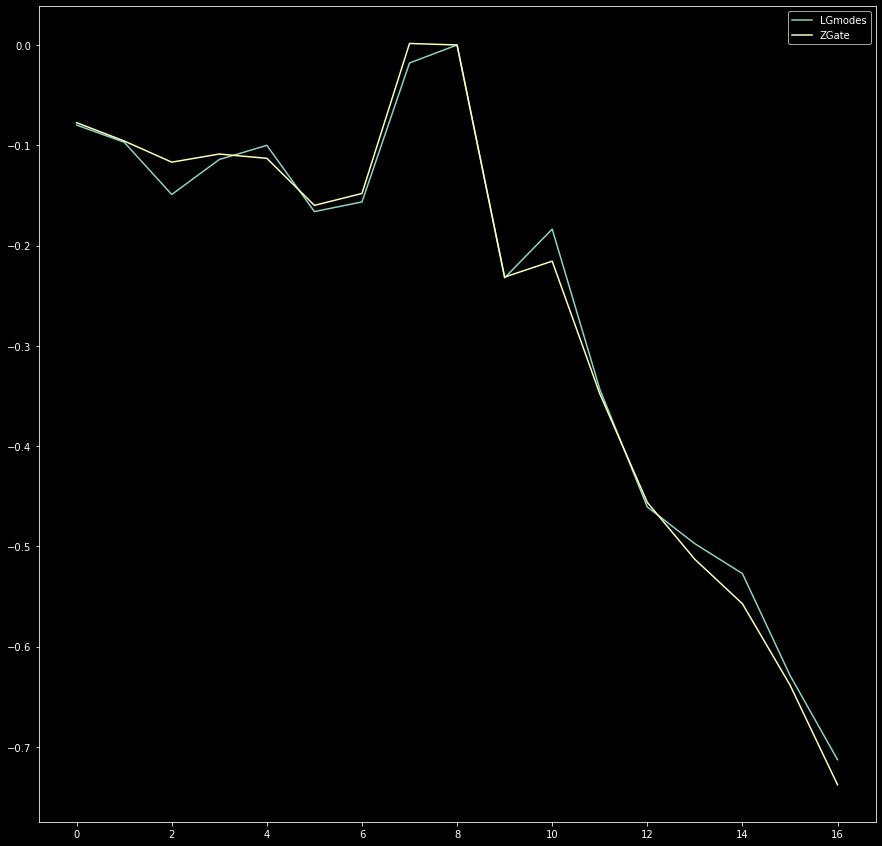

In [42]:
plt.figure()
plt.plot(allCoupleDiags[0,:],label='LGmodes')
plt.plot(allCoupleDiags[1,:],label='ZGate')
# plt.plot(allCoupleDiags[2,:],label='DFTGate')
plt.legend()

plt.savefig("DiagPhaseValues.eps")

# If you have run a batch that has the superposition modes in it to fix the phase up you can run this cell to see the resluts of fixing the phase

In [486]:
check=np.angle(np.sum((CouplingMat_GLobalPhaseShift[GaussianIndex,:])*np.conj(CouplingMat_GLobalPhaseShift[GaussianIndex,:])))
print(np.angle(CouplingMat_GLobalPhaseShift[GaussianIndex,GaussianIndex]))
print(check)

5.353279902144059e-17
0.0


In [491]:
np.angle(New_CouplingMat[7,9])

2.3038714956462902

# This is for the a single row method of fixing the phase directly in coupling matrix 

test [-1.25100849e+00  2.95173909e+00  2.00197600e+00 -2.70329429e+00
 -2.01888409e+00 -4.56068500e-01 -1.36886418e+00 -3.13969301e+00
  5.11493313e-17  7.34285136e-01 -8.31606711e-01 -2.26662912e+00
 -2.60837450e+00 -2.05214158e+00  2.52090517e+00  3.03345611e+00
  2.37528421e-01]


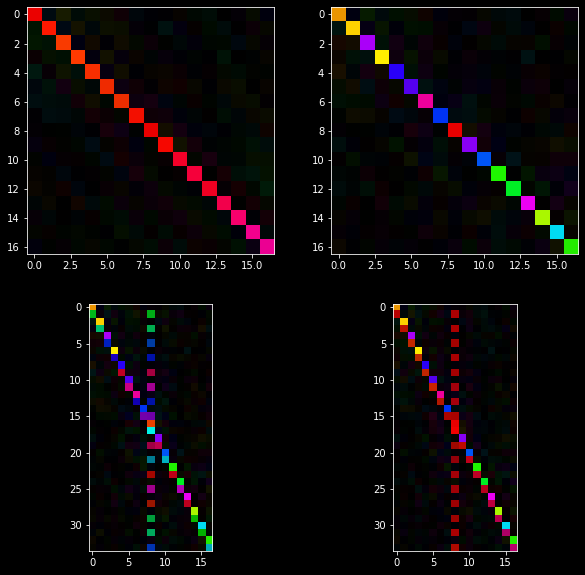

In [56]:
ipol1=0
# CouplingMat=np.conj(ExperData.CouplingMatrix[:,:,ipol1])

CouplingMat=ModeMetrics.CouplingMatrix
GaussianIndex=16 # the other one is at 93
plotCoupleMatrices=True
# DoMetrics=False
# MakeInvertedMatrix=False
# MatlabFilename = 'CouplingMatrix_inv_From_MGGroup10_Azimuthals_AtEnd_Superpositions_Interwoven_Azmuth17_IL.mat'

# LoadAndApplyInvertedMatrix=True
CouplingMat_GLobalPhaseShift=copy.deepcopy(CouplingMat)
phaseShift=np.angle(CouplingMat_GLobalPhaseShift[GaussianIndex,8])
CouplingMat_GLobalPhaseShift[GaussianIndex,:]=CouplingMat_GLobalPhaseShift[GaussianIndex,:]*np.exp(-1j*phaseShift)
#Shift the Gaussian show so that its Gaussian Element (First element in the reference row) has phase 0
# print(np.angle(CouplingMat_GLobalPhaseShift[GaussianIndex,0]))
# CouplingMat_GLobalPhaseShift[GaussianIndex,:]=CouplingMat_GLobalPhaseShift[GaussianIndex,:]*np.exp(-1j*np.angle(CouplingMat_GLobalPhaseShift[GaussianIndex,0]))
# print(np.angle(CouplingMat_GLobalPhaseShift[GaussianIndex,0]))



# Shift all the rows so that they are locked with the Gaussian
for imode in range(1,ExperData.modeCount_Frames,2):
    if(imode!=GaussianIndex):
        Phase_SupPos=np.angle(np.sum((CouplingMat_GLobalPhaseShift[imode,:])*np.conj(CouplingMat_GLobalPhaseShift[GaussianIndex,:])))
        # Phase_SupPos=np.angle(np.sum((CouplingMat_GLobalPhaseShift[imode,:])*(CouplingMat_GLobalPhaseShift[GaussianIndex,:])))
        
        CouplingMat_GLobalPhaseShift[imode,:]=CouplingMat_GLobalPhaseShift[imode,:]*np.exp(-1j*Phase_SupPos)


# print(GaussianRow.shape)
New_CouplingMat=np.zeros([ExperData.modeCount_ReconBasis,ExperData.modeCount_ReconBasis],dtype=complex)
Old_CouplingMat=np.zeros([ExperData.modeCount_ReconBasis,ExperData.modeCount_ReconBasis],dtype=complex)

PhaseShiftForMode=np.zeros(ExperData.modeCount_ReconBasis)
Field_FromExperiemnt=np.zeros([ExperData.modeCount_ReconBasis,ExperData.polCount,ExperData.Ny,ExperData.Nx],dtype=complex)
Field_PhaseShifted=np.zeros(Field_FromExperiemnt.shape,dtype=complex)
icounter=0
for imode in range(0,ExperData.modeCount_Frames,2):
    Old_CouplingMat[icounter,:]=CouplingMat_GLobalPhaseShift[imode,:]
    if(imode!=GaussianIndex):
        Phase_SupPos=np.sum((CouplingMat_GLobalPhaseShift[imode,:])*np.conj(CouplingMat_GLobalPhaseShift[imode+1,:]))
        PhaseShiftForMode[icounter]=np.angle(Phase_SupPos)
        New_CouplingMat[icounter,:]=CouplingMat_GLobalPhaseShift[imode,:]*np.exp(-1j* PhaseShiftForMode[icounter])
        
        #Apply and store Phase adjustments to Fields
        Field_FromExperiemnt[icounter,ipol1,:,:]=ExperData.Field[imode,ipol1,:,:]
        Field_PhaseShifted[icounter,ipol1,:,:]=ExperData.Field[imode,ipol1,:,:]*np.exp(-1j* PhaseShiftForMode[icounter])
    else:
        print('test',np.angle(CouplingMat_GLobalPhaseShift[imode,:]))
   
        New_CouplingMat[icounter,:]=CouplingMat_GLobalPhaseShift[imode,:]
        Field_FromExperiemnt[icounter,ipol1,:,:]=ExperData.Field[imode,ipol1,:,:]
        Field_PhaseShifted[icounter,ipol1,:,:]=ExperData.Field[imode,ipol1,:,:]
        
    icounter=icounter+1

if(plotCoupleMatrices):
    # print(GlobalPhase)
    plt.figure()
    plt.subplot(2,2,1)
    plt.imshow(cmplxplt.ComplexArrayToRgb(New_CouplingMat))
    
    plt.subplot(2,2,2)
    # plt.figure()
    plt.imshow(cmplxplt.ComplexArrayToRgb(Old_CouplingMat))
    plt.subplot(2,2,3)
    plt.imshow(cmplxplt.ComplexArrayToRgb(CouplingMat))
    # plt.figure()
    
    plt.subplot(2,2,4)
    # plt.figure()
    plt.imshow(cmplxplt.ComplexArrayToRgb(CouplingMat_GLobalPhaseShift))
    

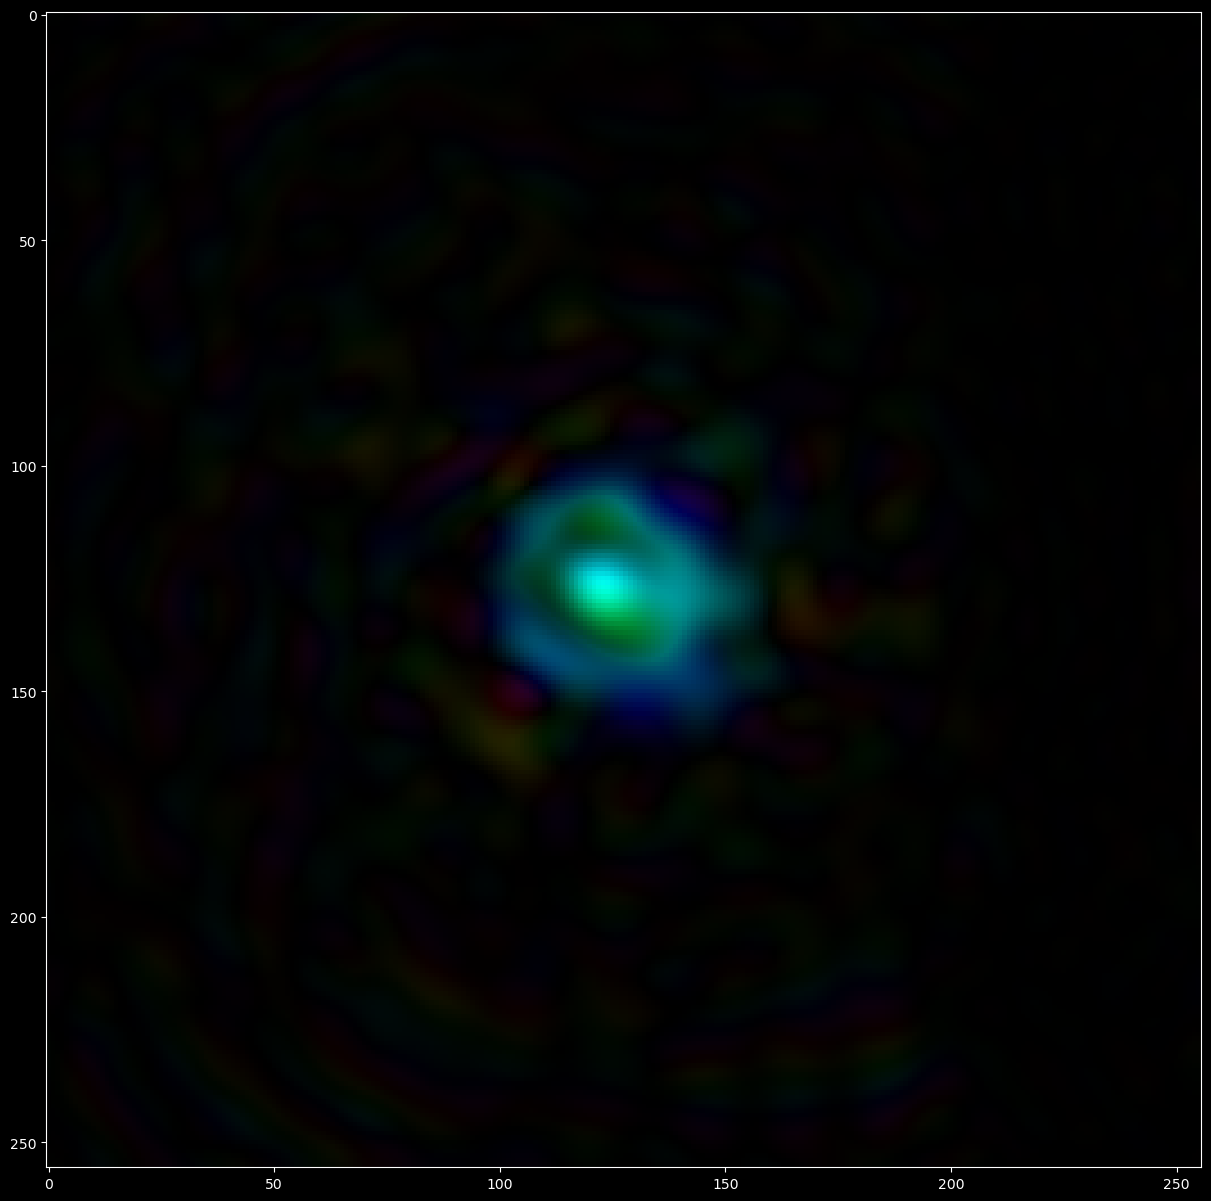

In [276]:

plt.imshow(cmplxplt.ComplexArrayToRgb(Exper_Fields[GaussianIndex+1,:,:]))

8
Inital Guesses for the n mean and scale term of the Poisson distrabution n_mean= -0.09268638213353406, scale= 1.1321272201601805e-10
Fitted n mean and scale term of the Poisson distrabution n_mean= -0.08050157428556082, scale= 1.132127775271692e-10
[[-0.04887117]]


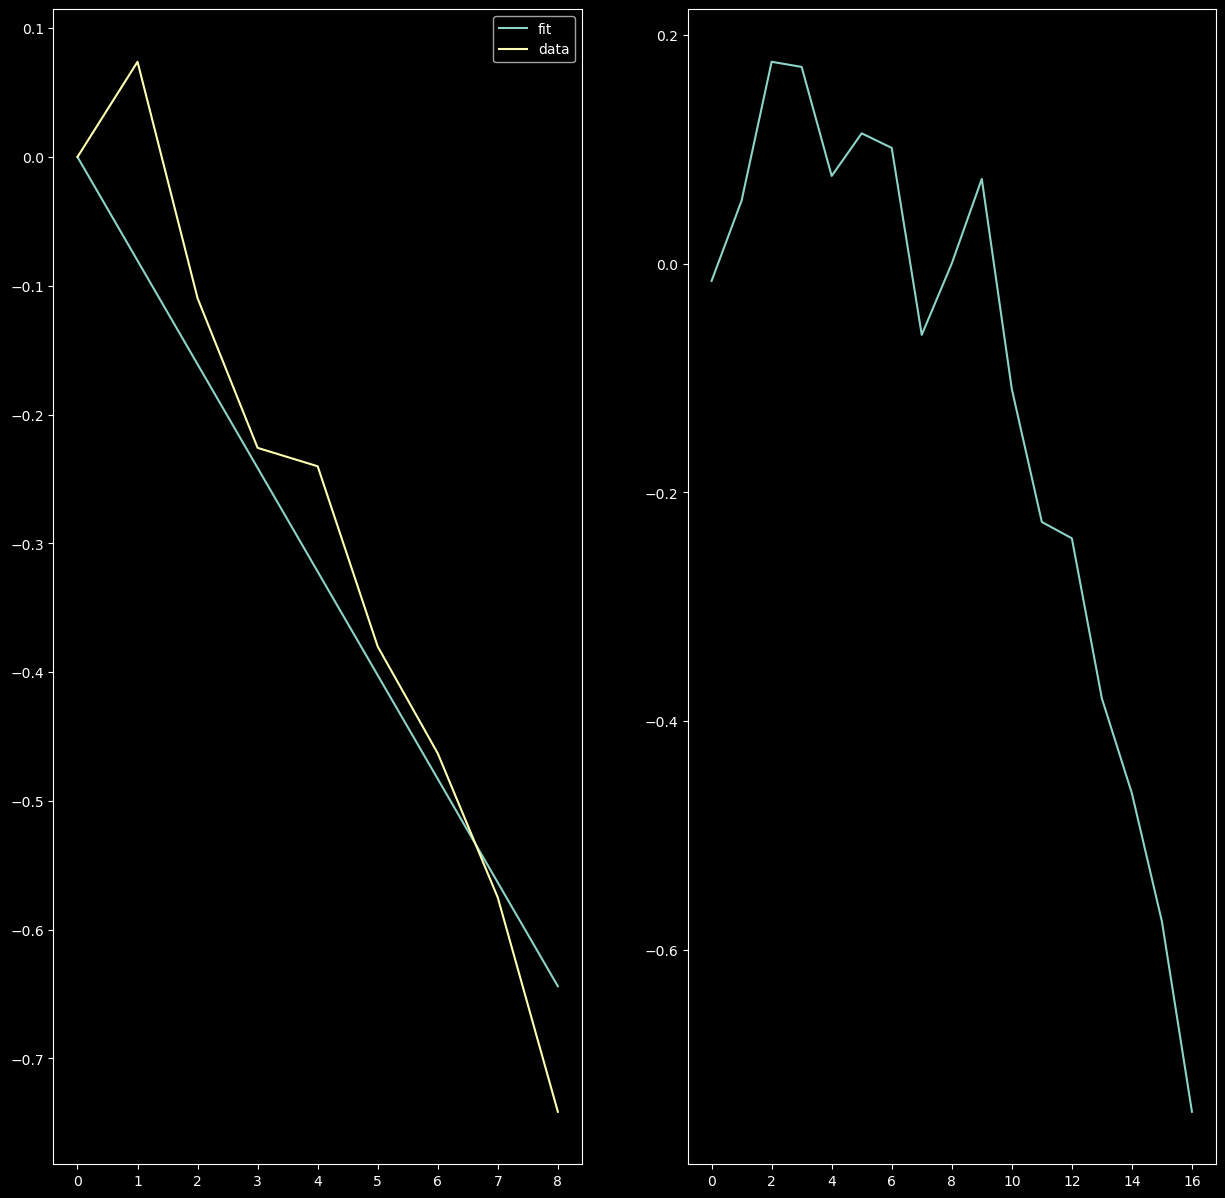

In [380]:
def LinearFunction(x,m,b):
    y=m*x+b
    return y.reshape(-1) # you dont have to do the reshape it is just there if you had a 2D or higher function



# # select a region in which you want to look at 
# xmax=np.where(N_photons==30)[0][0]#looked at the graph to get the 80 value NOTE the index stuff [0][0] is just what you need to do for where as it give it back in some array format
# xmin=1

# prob_adjust=copy.deepcopy(probabilties)
# prob_adjust[0:xmin]=0 #set every thing else to zero
# prob_adjust[xmax:-1]=0

#make some good guesses for the n_mean and scale term of the poisson distrabution

CouplingdiagElements=np.angle(np.diag(ModeMetrics_PhaseLocked.CouplingMatrix))
print(CouplingdiagElements.shape[0]//2)
Ncouple_half=CouplingdiagElements.shape[0]//2
Ncouple_half_arr=np.arange(Ncouple_half,ExperData.modeCount_ReconBasis)-Ncouple_half
CouplingdiagElements_half=CouplingdiagElements[Ncouple_half:]

# Ncouple_half_arr=np.arange(Ncouple_half,ExperData.modeCount_ReconBasis)
# CouplingdiagElements_half=CouplingdiagElements[:Ncouple_half+1]

m_guess=(CouplingdiagElements_half[-1]-CouplingdiagElements_half[0])/(Ncouple_half)
b_guess=CouplingdiagElements_half[0]
initial_guess = np.asarray([m_guess,b_guess]) 

#set some bounds for the fit, dont really need these
# param_bounds = ([0,0], [np.max(N_photons),2])  # Example bounds: a>=0, no bounds for b, c

# do the fit
# popt, pcov = opt.curve_fit(PoissonFunction, (N_photons), prob_adjust, p0=initial_guess, bounds=param_bounds)
popt, pcov = opt.curve_fit(LinearFunction, (Ncouple_half_arr), CouplingdiagElements_half,p0=initial_guess,)


# pass the fit values back to the function to make a model array from the fit
LinearFit = LinearFunction((Ncouple_half_arr),*popt)

print('Inital Guesses for the n mean and scale term of the Poisson distrabution n_mean= '+str(initial_guess[0])+', scale= '+str(initial_guess[1]))
print('Fitted n mean and scale term of the Poisson distrabution n_mean= '+str(popt[0])+', scale= '+str(popt[1]))
z0 = np.pi * (ExperData.waist)**2 / ExperData.wavelen
z_1=np.tan(initial_guess[0])*z0
print(z_1)

plt.figure()
plt.subplot(1,2,1)
plt.plot(Ncouple_half_arr,LinearFit,label='fit')
plt.plot(Ncouple_half_arr,CouplingdiagElements_half,label='data')
plt.legend()

plt.subplot(1,2,2)
plt.plot((CouplingdiagElements))

# CouplingdiagElements=np.diag(New_CouplingMat)
# print(CouplingdiagElements.shape[0]//2)

# Ncouple_half=CouplingdiagElements.shape[0]//2
# print(Ncouple_half)
# # plt.plot(np.angle(CouplingdiagElements[Ncouple_half:-1]))



# I just want see what way is the correct way to get the global phase through overlaping the a gaussian with a gaussian that has a phase shift

# save the Fields to a png

complex plot
complex plot
complex plot
complex plot
complex plot
complex plot
complex plot
complex plot
complex plot
complex plot
complex plot
complex plot
complex plot
complex plot
complex plot
complex plot
complex plot


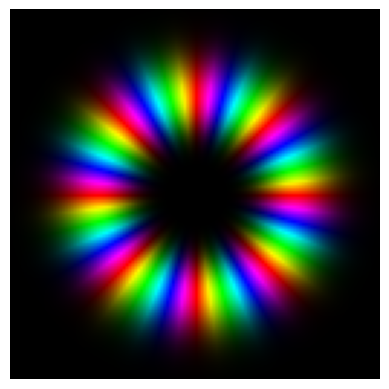

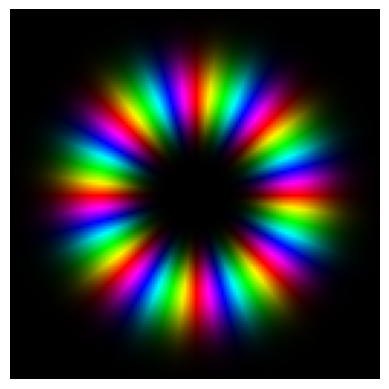

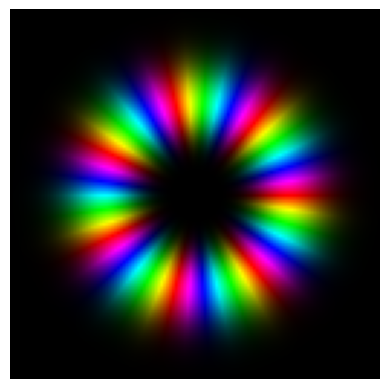

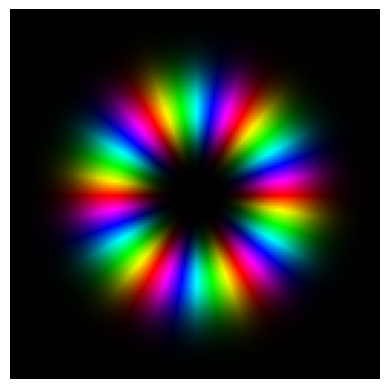

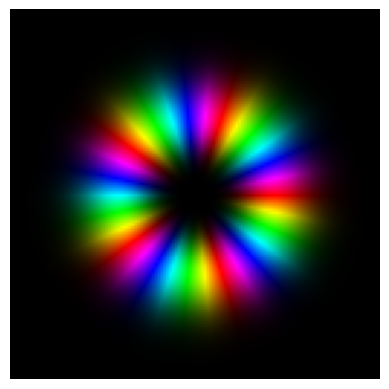

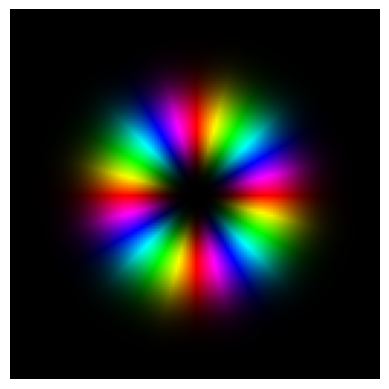

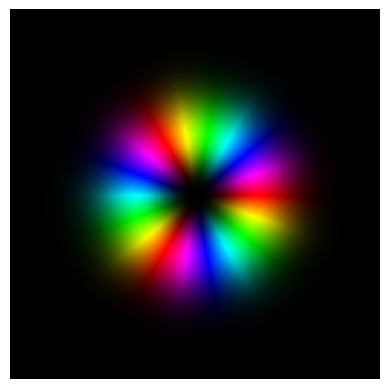

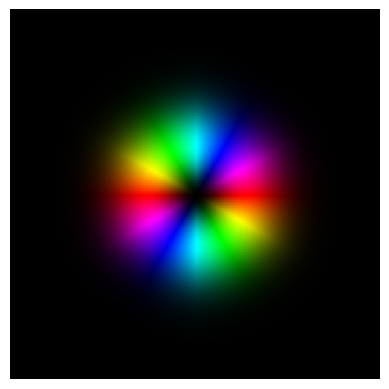

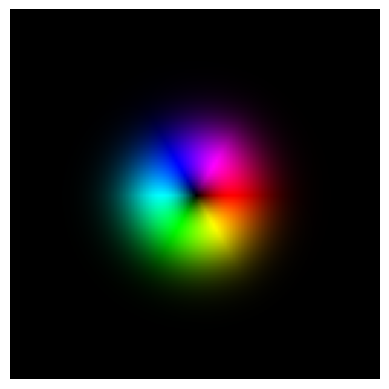

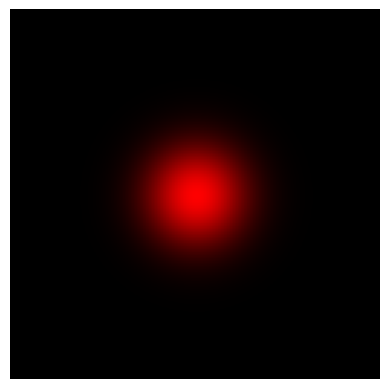

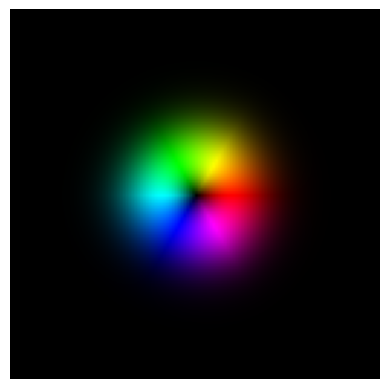

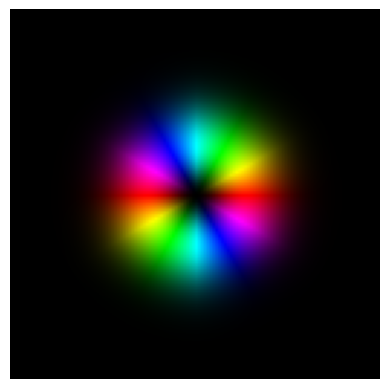

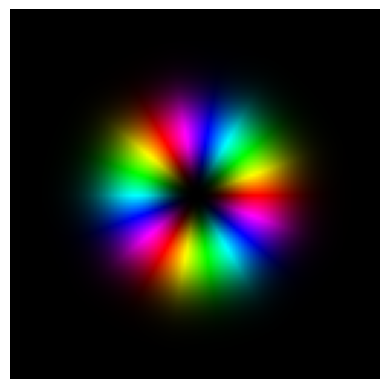

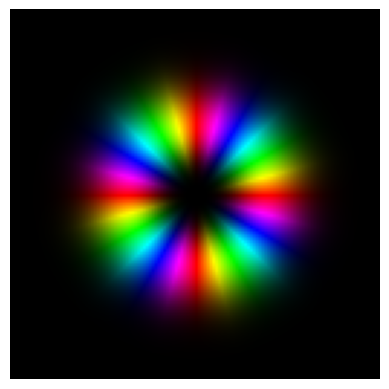

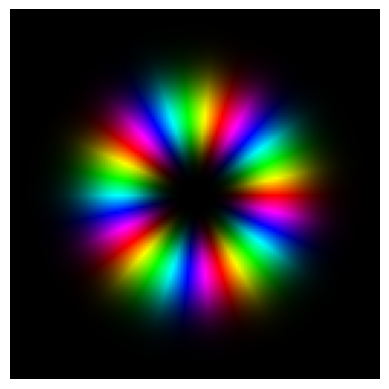

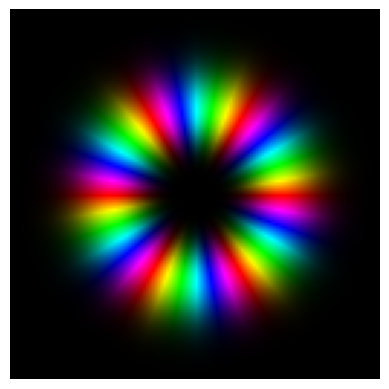

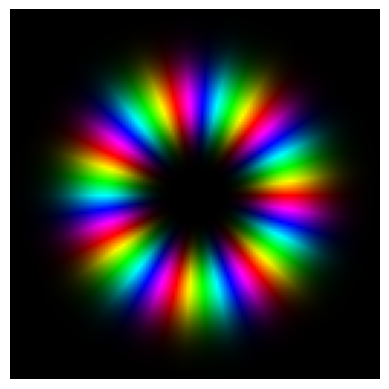

In [38]:
plt.style.use('default')
def Savefigure(Field,PlotType,PlotTheme,FilenameForSaveFile):
      fig, ax=plt.subplots(1,1);
      if(PlotType=='c'):
            print("complex plot")
            # if(PlotTheme=="light"):
            #       ax.imshow(cmplxplt.ComplexArrayToRgb(Field, theme ='PlotTheme'))
            # else if(PlotTheme=="dark"):
            ax.imshow(cmplxplt.ComplexArrayToRgb(Field, theme =PlotTheme))
            
      else:
            ax.imshow(Field,cmap='gray',vmin=-np.pi, vmax=np.pi) 
            # ax.imshow(Field,cmap='inferno')    
             
      ax.axis('off')
      plt.savefig(FilenameForSaveFile+".eps")
# for iplane in range(planeCount):
#       Fieldname="HGToLG_MASKSPLane_"+str(iplane)
#       # FieldToPlot=(np.sum(np.abs(FieldsFWD[:,iplane,:,:])**2,0))
#       FieldsFWD[:,-1,:,:]
#       # PlotType="r"
#       # FieldToPlot=((([7,iplane,:,:])))
#       FieldToPlot=np.angle(MASKSPhaseComplx[0,iplane,:,:])
      
#       PlotType="r"
#       FilenameForSaveFile="SavedImages/"+Fieldname
#       Savefigure(FieldToPlot,PlotType,"dark",FilenameForSaveFile)

# FeildsToPlt=copy.deepcopy(Exper_PhaseLockedFields)
FeildsToPlt=copy.deepcopy(InputModes_Ideal)

Scale=4
Ny=ExperData.Ny
Nx=ExperData.Nx
# Ny=ExpoDataGateMode.Ny
# Nx=ExpoDataGateMode.Nx
modeCount=ExperData.modeCount_ReconBasis
for imode in range(modeCount):
      # Fieldname="LGGroup9_FullAlgin_TheoryField_"+str(imode)
      # Fieldname=ModeType+"_ExperPhaseLocked_"+str(imode)
      # Fieldname="test_"+str(imode)
      
      Fieldname=ModeType+"_TheoryField_"+str(imode)
      
      
      # FieldToPlot=(np.sum(np.abs(FieldsFWD[:,iplane,:,:])**2,0))
      # PlotType="r"
      # FieldToPlot=((([7,iplane,:,:])))
      if(Scale>1):
            # FieldToPlot=ExperData.Field[imode,int(Ny/Scale):Ny-int(Ny/Scale) ,int(Nx/Scale):Nx-int(Nx/Scale) ]
            FieldToPlot=FeildsToPlt[imode,int(Ny/Scale):Ny-int(Ny/Scale) ,int(Nx/Scale):Nx-int(Nx/Scale) ]
            
            
      else:
            # FieldToPlot=np.squeeze(ExpoDataGateMode.Field[imode,:,:])
            # FieldToPlot=np.squeeze(ExpoDataInputMode.Field[imode,:,:])
            # FieldToPlot=np.squeeze(ExperData.Field[imode,:,:])
            FieldToPlot=np.squeeze(FeildsToPlt[imode,:,:])
            # FieldToPlot=FeildsToPlt[imode,int(Ny/Scale):Ny-int(Ny/Scale) ,int(Nx/Scale):Nx-int(Nx/Scale) ]
            
            
            
      PlotType="c"
      FilenameForSaveFile="SavedImages/"+Fieldname
      Savefigure(FieldToPlot,PlotType,"dark",FilenameForSaveFile)
      

# Save the Coupling matrix

IL= 1.6256439502335316 MDL= 4.658147199409031 Vis= 0.963809969505057 sum(diag)=16.581319878391906 SNR=14.254024652055236
15.287299615143969
IL= 1.6256439502335303 MDL= 4.658147199409025 Vis= 0.963809969505057 sum(diag)=11.683221916449906 SNR=14.254024652055232
[0.54471856 0.73354584 0.88475439 0.85608214 0.91290159 0.96042392
 0.91701315 0.94066694 0.98950093 0.75914131 0.85350373 0.87446145
 0.96245388 1.         0.90959257 0.86482696 0.7704644 ]


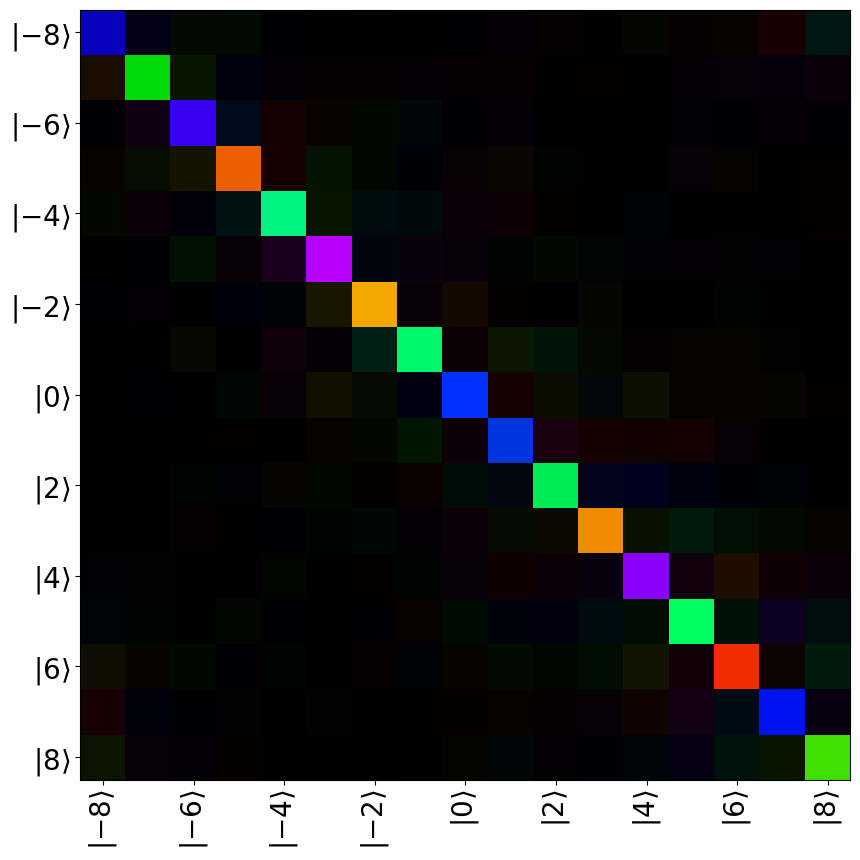

In [39]:

# ModeMetrics_FromModelab=MetricCals.CalculateMetrics(GateModeMetrics.CouplingMatrix[:,:])
# CoupMat=copy.deepcopy(np.squeeze(ExpoDataGateMode.CouplingMatrix[:,:,ipol]))
# CoupMat=copy.deepcopy(np.squeeze(ExpoDataInputMode.CouplingMatrix[:,:,ipol]))
# CoupMat=copy.deepcopy(ModeMetrics.CouplingMatrix)
CoupMat=copy.deepcopy(ModeMetrics_PhaseLocked.CouplingMatrix)


ModeMetrics_FromModelab=MetricCals.CalculateMetrics(CoupMat)
NewCoup=np.zeros(CoupMat.shape,dtype=complex)
# for imode in range(ExpoDataGateMode.modeCount_ReconBasis):
#     # normfactor=sum(np.abs(ExpoDataGateMode.CouplingMatrix[imode,:,ipol])**2)
#     # ExpoDataGateMode.CouplingMatrix[imode,:,ipol]=ExpoDataGateMode.CouplingMatrix[imode,:,ipol]/np.sqrt(normfactor)
#     # normfactor=sum(np.abs(ModeMetrics_FromModelab.CouplingMatrix[imode,:])**2)
#     normfactor=np.sum(np.abs(CoupMat[imode,:])**2)
    
#     NewCoup[imode,:]=CoupMat[imode,:]/np.sqrt(normfactor)
    # print(sum(np.abs(ModeMetrics_FromModelab.CouplingMatrix[imode,:])**2))
# ModeMetrics=MetricCals.CalculateCoupMatrixAndMetrics(InputModes_Ideal, ExperData.Field[:,ipol1,:,:],ExperData.pixelSize)
# ModeMetrics_FromModelab=MetricCals.CalculateMetrics(ExpoDataGateMode.CouplingMatrix[:,:,ipol])

# 
# normfactor=np.sum(np.sum(np.abs(NewCoup)**2))
normfactor=(np.max(np.abs(CoupMat)**2))

# NewCoup=CoupMat*(np.sqrt(ExpoDataGateMode.modeCount_ReconBasis)/(np.sqrt(normfactor)))
NewCoup=CoupMat*(1/(np.sqrt(normfactor)))

print(np.sum(np.abs(NewCoup)**2))
ModeMetrics_new=MetricCals.CalculateMetrics(NewCoup)

print(np.diag(np.abs(NewCoup)**2))
# ExpoFields=ExpoDataInputMode.Field
# IdealFields=InputModes
couplMat=NewCoup


# xaxis=np.arange(modeCount)
# yaxis=np.arange(modeCount)
# XAxis,YAxis=np.meshgrid(xaxis,yaxis)
plt.style.use('default')
plt.rcParams['figure.figsize'] = [10,10]
plt.figure()
# plt.imshow(abs(couplMat)**2,cmap='inferno')
plt.imshow(cmplxplt.ComplexArrayToRgb(couplMat, theme ="dark"))
tick_labels = [r'$\left|{{{}}}\right\rangle$'.format(i) for i in range(-8, 9,2)]
tick_positions = np.arange(0, 17, 2)

plt.xticks(tick_positions, tick_labels, rotation=90,fontsize=20)
plt.yticks(tick_positions, tick_labels,fontsize=20)
# plt.axis('off')


# plt.xticks(xaxis, fontsize=16)
# plt.yticks(yaxis, fontsize=16)

# cbar=plt.colorbar()
# cbar.ax.tick_params(labelsize=12)  # You can adjust the font size as desired


# plt.xlabel('Theoretical Mode',fontsize=20)
# plt.ylabel('Experimental Mode',fontsize=20)
# SavingFigFileName='GateAnimations'+slash+FilePrefix+'_Images/CouplingMatrix'+'.png'
# plt.savefig(SavingFigFileName,bbox_inches='tight')
Fieldname=ModeType+"_CoupleingMatrix"
FilenameForSaveFile="SavedImages/"+Fieldname
plt.savefig(FilenameForSaveFile+".eps")
# ImageName='Frame1'
# Foldername='GateAnimations'+slash+GateModeType+'_Images'
# systemCommand = f'ffmpeg -i {Foldername}/{ImageName}%04d.png -y plotanim.mp4'
# os.system(systemCommand)
# systemCommand = f'ffmpeg -i {Foldername}/{ImageName}%04d.png -y plotanim.gif'
# os.system(systemCommand)

0.857356941582952


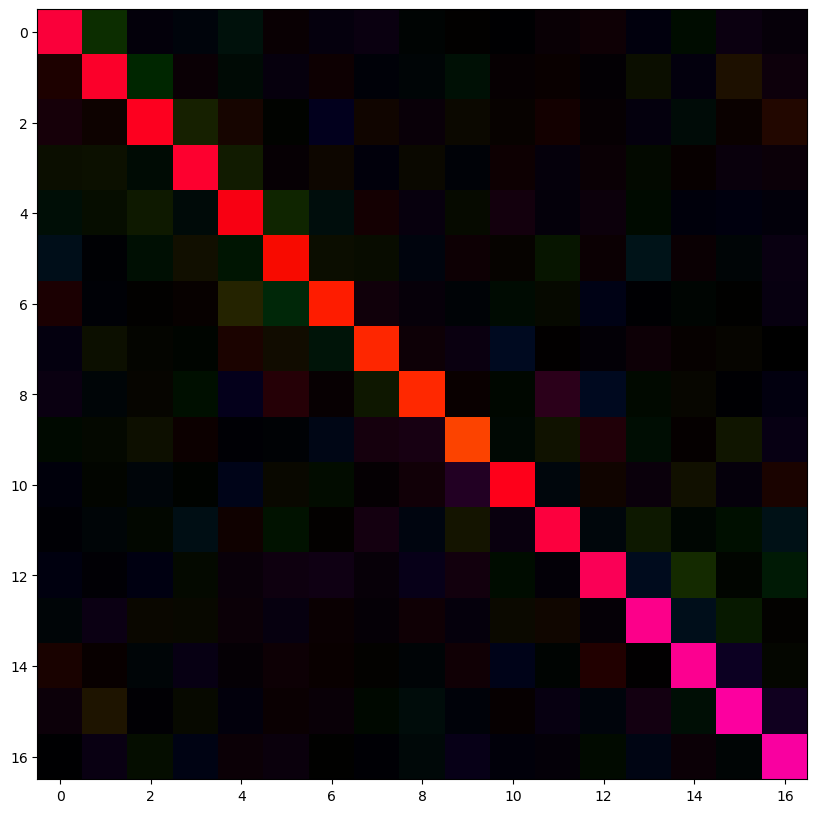

In [59]:
def calculate_fidelity(M, U):
    """
    Calculate the fidelity between the experimental matrix M and the ideal unitary matrix U.
    
    Parameters:
    - M (np.array): The experimental matrix with elements representing spatial overlaps.
    - U (np.array): The ideal unitary matrix.
    
    Returns:
    - float: The fidelity between the two matrices.
    """
    # Ensure M and U are numpy arrays
    M = np.array(M, dtype=complex)
    U = np.array(U, dtype=complex)
    
    # Compute the conjugate transpose of U
    U_dagger = np.conjugate(U.T)
    
    # Calculate the product of U_dagger and M
    product = np.dot(U_dagger, M)
    
    # Calculate the trace of the product
    trace = np.trace(product)
    
    # Calculate the dimension of the matrix
    d = U.shape[0]
    
    # Compute the fidelity
    fidelity = np.abs(trace)**2 / d**2
    
    return fidelity
def normalize_rows(matrix):
    """
    Normalize the rows of a complex matrix so that each row has a unit norm.
    
    Parameters:
    - matrix (np.array): A complex matrix to be normalized.
    
    Returns:
    - np.array: The row-normalized complex matrix.
    """
    # Calculate the norm of each row
    row_norms = np.linalg.norm(matrix, axis=0, keepdims=True)
    
    # Avoid division by zero
    row_norms[row_norms == 0] = 1
    
    # Normalize each row by its norm
    normalized_matrix = matrix / row_norms
    
    return normalized_matrix

# Example usage

CoupMat=copy.deepcopy(ModeMetrics_PhaseLocked.CouplingMatrix)
normalized_matrix_couple = normalize_rows(CoupMat)
# normalized_matrix_couple
# Need to normalise the rows to be one
I_mat=np.eye(17)
fidelity=calculate_fidelity(normalized_matrix_couple,I_mat)
plt.imshow(cmplxplt.ComplexArrayToRgb(normalized_matrix_couple, theme ="dark"))
# print(np.sum(np.abs(normalized_matrix_couple[,:])**2))
print(fidelity)

#ZGate= 0.934578697681133



# Generate the Transformaatrices for each of the Gate operations

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [-8 -7 -6 -5 -4 -3 -2 -1  0  1  2  3  4  5  6  7  8]]
(17, 256, 256)


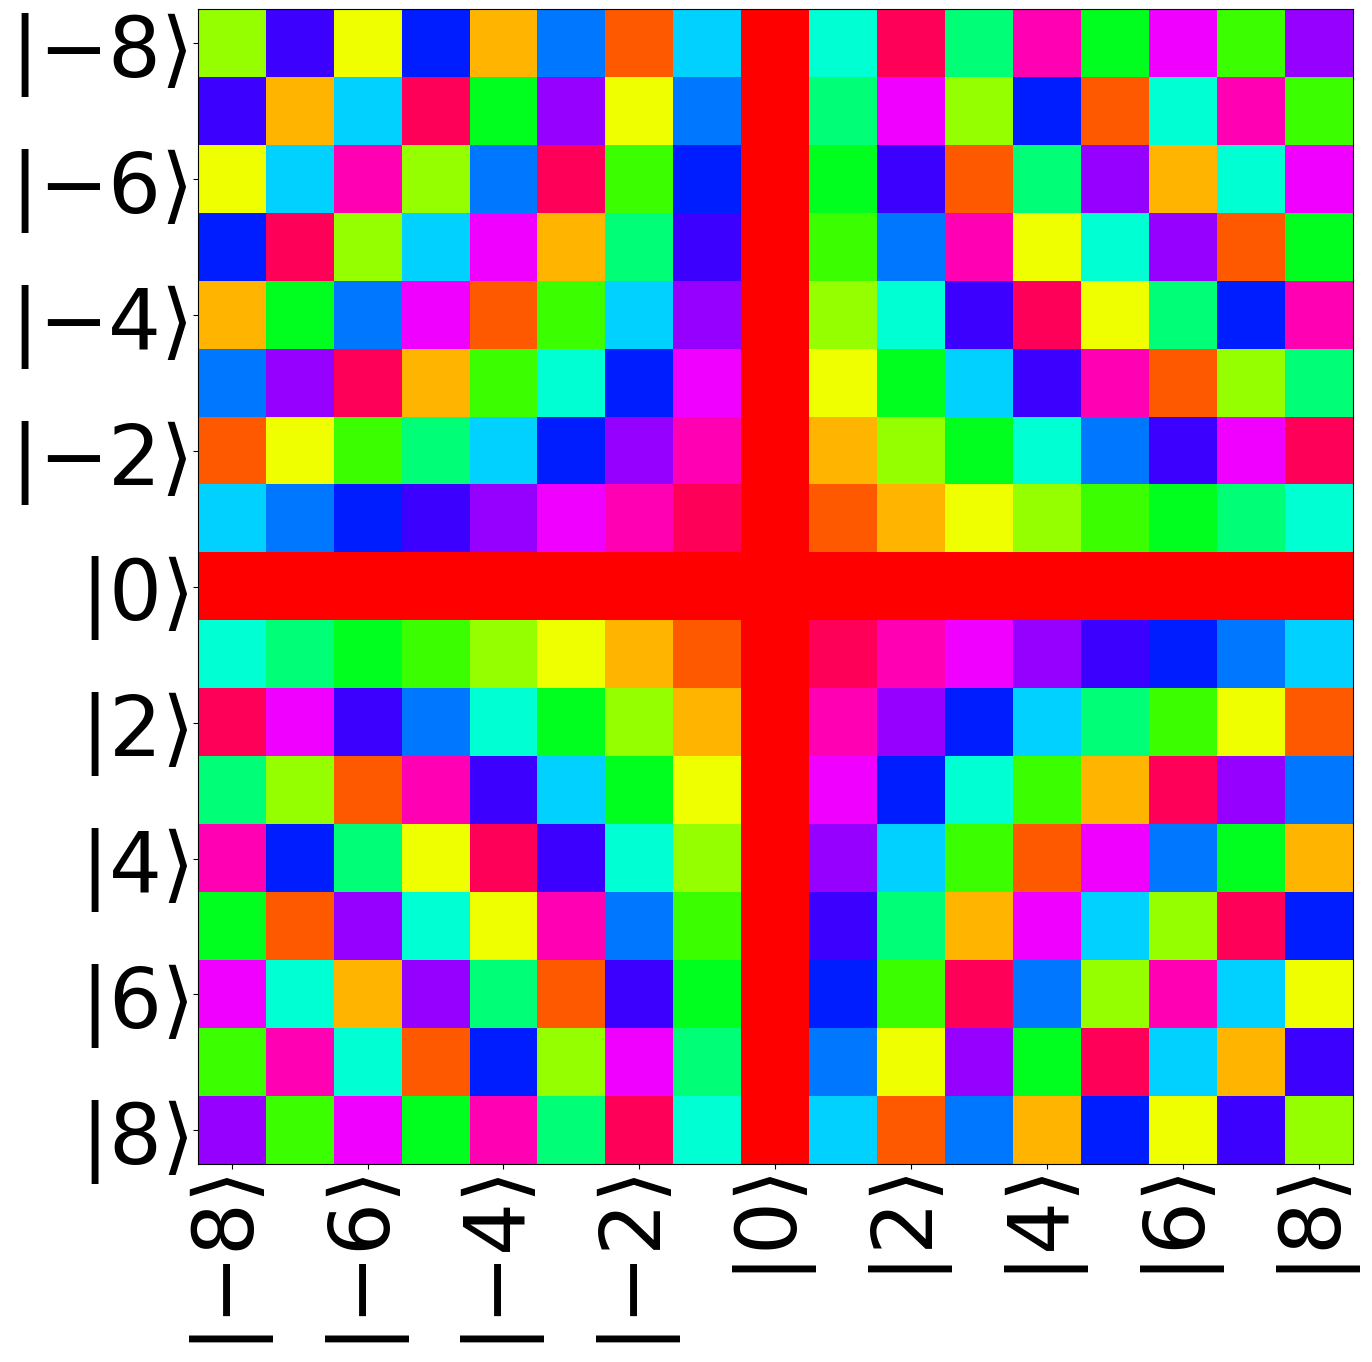

In [87]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = [15,15]
# GateType='XGate'
GateType='DFTGate' 
# GateType='ZGate'
wavelength=1565e-9
z_dist=0
pixelSize=9.2e-6
mfd=750e-6
Nx=256
Ny=256

xmin=(((-(Nx-1))/2.0))*pixelSize
xmax=(((Nx-1)/2.0))*pixelSize
ymin=(((-(Ny-1))/2.0))*pixelSize
ymax=(((Ny-1)/2.0))*pixelSize
xArr=np.linspace(xmin,xmax,Nx)
yArr=np.linspace(ymin,ymax,Ny)

XGrid,YGrid=np.meshgrid(xArr,yArr)
modeCount_ReconBasis=17
maxModeGroup=9

modeIndices=np.zeros([2,modeCount_ReconBasis],dtype=int);
AzimthalIndeices=np.arange(-1*(maxModeGroup-1),(maxModeGroup-1)+1,dtype=int);
# AzimthalIndeices=np.asarray([0,1,-1,2,-2,3,-3,4,-4,5,-5,6,-6,7,-7,8,-8],dtype=int)
modeIndices[1,0:AzimthalIndeices.size]=AzimthalIndeices
# modeIndices[1,0:AzimthalIndeices.size]=np.arange(-1*(maxModeGroup-1),(maxModeGroup-1)+1,dtype=int);
# Make the LG modes
# ExperData.modeIndices=modeIndices
LGAzimthal_Temp=QGateGen.GenerateLGAzthmModes(xArr,yArr,0.0,mfd,wavelength,modeIndices)

# Make the modes after the gate operations
# ExperData.modeIndices=modeIndices;
InputModes_Ideal,transformMat=QGateGen.GenerateGateModes(GateType,LGAzimthal_Temp[0:AzimthalIndeices.size,:,:]);
# plt.imshow(cmplxplt.ComplexArrayToRgb(transformMat))

# del LGAzimthal_Temp # we dont need the LGAzimthal_Temp field so we will delete them to save on memory further down
plt.figure()
plt.imshow(cmplxplt.ComplexArrayToRgb(transformMat,"light"))
# Set the ticks
tick_labels = [r'$\left|{{{}}}\right\rangle$'.format(i) for i in range(-8, 9,2)]
tick_positions = np.arange(0, 17, 2)

plt.xticks(tick_positions, tick_labels, rotation=90,fontsize=60)
plt.yticks(tick_positions, tick_labels,fontsize=60)
# plt.axis('off')
ImageName=GateType+'_MatrixTransform'+'.eps'
plt.savefig(f'SavedImages/{ImageName}',bbox_inches='tight')


In [49]:
ipywidgets.interact(OpticOp.PlotModes,imode=(0,modeCount_ReconBasis-1,1),Modes=ipywidgets.fixed(InputModes_Ideal))

interactive(children=(IntSlider(value=8, description='imode', max=16), Output()), _dom_classes=('widget-intera…

<function MyPythonLibs.OpticalOperators.PlotModes(imode, Modes)>

complex plot
complex plot
complex plot
complex plot
complex plot
complex plot
complex plot
complex plot
complex plot
complex plot
complex plot
complex plot
complex plot
complex plot
complex plot
complex plot
complex plot


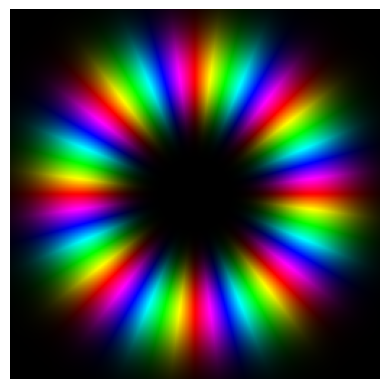

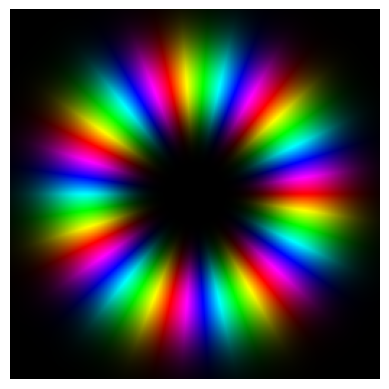

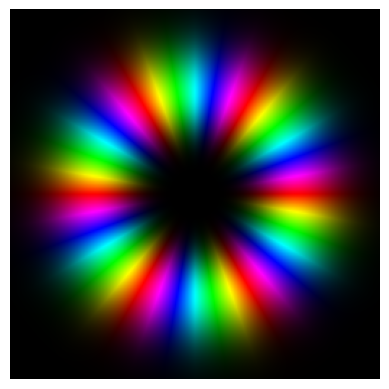

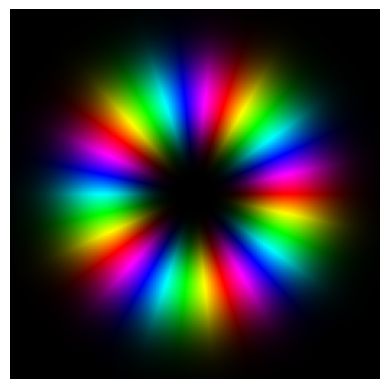

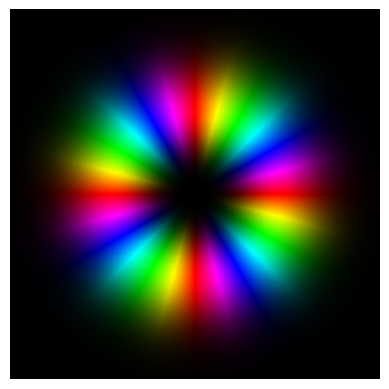

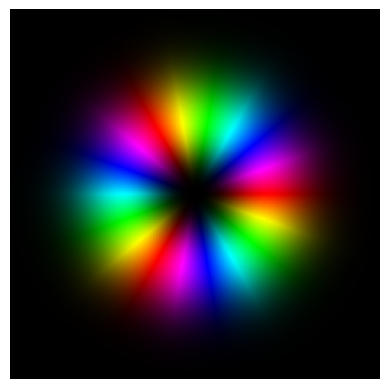

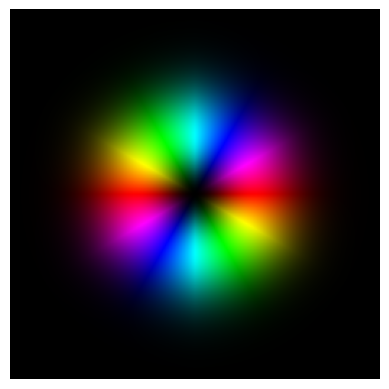

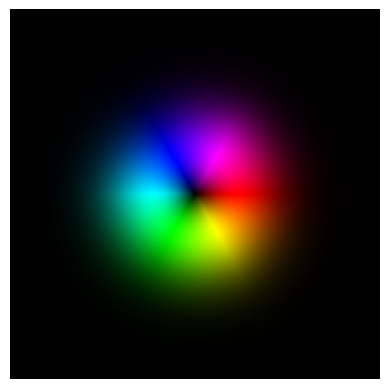

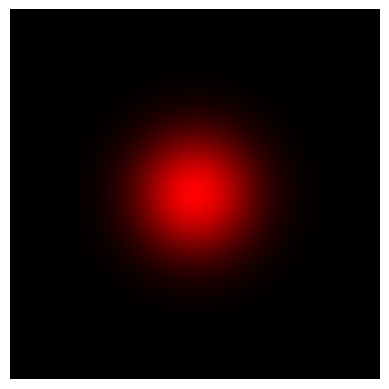

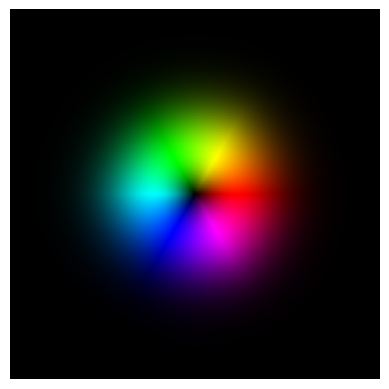

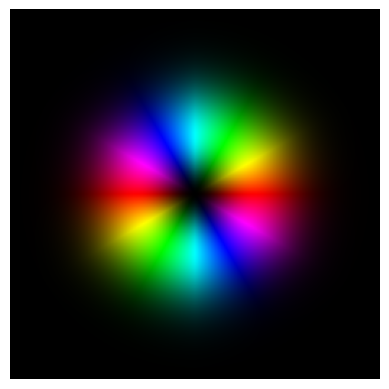

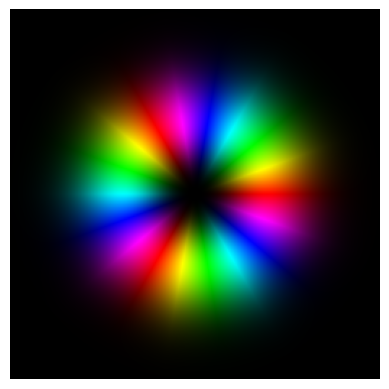

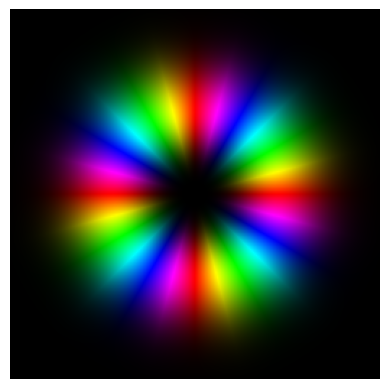

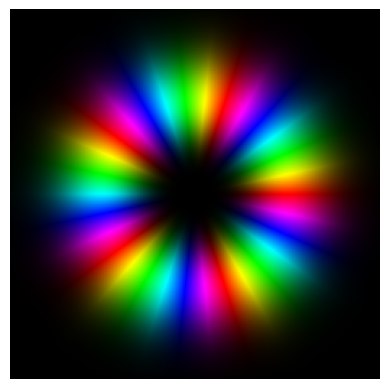

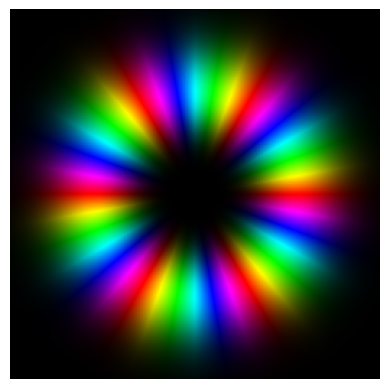

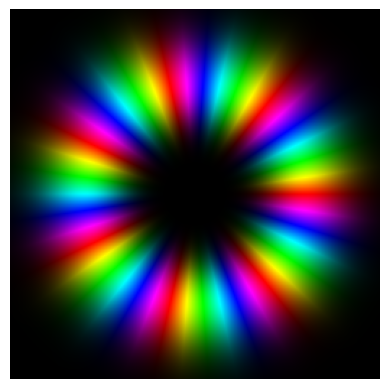

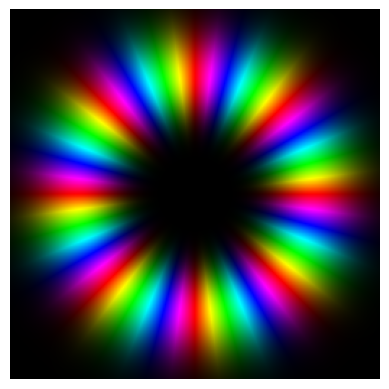

In [93]:
plt.style.use('default')
def Savefigure(Field,PlotType,PlotTheme,FilenameForSaveFile):
      fig, ax=plt.subplots(1,1);
      if(PlotType=='c'):
            print("complex plot")
            # if(PlotTheme=="light"):
            #       ax.imshow(cmplxplt.ComplexArrayToRgb(Field, theme ='PlotTheme'))
            # else if(PlotTheme=="dark"):
            ax.imshow(cmplxplt.ComplexArrayToRgb(Field, theme =PlotTheme))
            
      else:
            ax.imshow(Field,cmap='gray',vmin=-np.pi, vmax=np.pi) 
            # ax.imshow(Field,cmap='inferno')    
             
      ax.axis('off')
      plt.savefig(FilenameForSaveFile+".eps")
# for iplane in range(planeCount):
#       Fieldname="HGToLG_MASKSPLane_"+str(iplane)
#       # FieldToPlot=(np.sum(np.abs(FieldsFWD[:,iplane,:,:])**2,0))
#       FieldsFWD[:,-1,:,:]
#       # PlotType="r"
#       # FieldToPlot=((([7,iplane,:,:])))
#       FieldToPlot=np.angle(MASKSPhaseComplx[0,iplane,:,:])
      
#       PlotType="r"
#       FilenameForSaveFile="SavedImages/"+Fieldname
#       Savefigure(FieldToPlot,PlotType,"dark",FilenameForSaveFile)

# FeildsToPlt=copy.deepcopy(InputModes_Ideal)
FeildsToPlt=copy.deepcopy(LGAzimthal_Temp)

Scale=1
# Ny=ExperData.Ny
# Nx=ExperData.Nx
# Ny=ExpoDataGateMode.Ny
# Nx=ExpoDataGateMode.Nx
modeCount=17
for imode in range(modeCount):
      # Fieldname="LGGroup9_FullAlgin_TheoryField_"+str(imode)
      # Fieldname=ModeType+"_illustrationFields_"+str(imode)
      Fieldname="LGAzimth"+"_illustrationFields_"+str(imode)
      
      # Fieldname="test_"+str(imode)
      
      # Fieldname=ModeType+"_TheoryField_"+str(imode)
      
      
      # FieldToPlot=(np.sum(np.abs(FieldsFWD[:,iplane,:,:])**2,0))
      # PlotType="r"
      # FieldToPlot=((([7,iplane,:,:])))
      if(Scale>1):
            # FieldToPlot=ExperData.Field[imode,int(Ny/Scale):Ny-int(Ny/Scale) ,int(Nx/Scale):Nx-int(Nx/Scale) ]
            FieldToPlot=FeildsToPlt[imode,int(Ny/Scale):Ny-int(Ny/Scale) ,int(Nx/Scale):Nx-int(Nx/Scale) ]
            
            
      else:
            # FieldToPlot=np.squeeze(ExpoDataGateMode.Field[imode,:,:])
            # FieldToPlot=np.squeeze(ExpoDataInputMode.Field[imode,:,:])
            # FieldToPlot=np.squeeze(ExperData.Field[imode,:,:])
            FieldToPlot=np.squeeze(FeildsToPlt[imode,:,:])
            # FieldToPlot=FeildsToPlt[imode,int(Ny/Scale):Ny-int(Ny/Scale) ,int(Nx/Scale):Nx-int(Nx/Scale) ]
            
            
            
      PlotType="c"
      FilenameForSaveFile="SavedImages/"+Fieldname
      Savefigure(FieldToPlot,PlotType,"dark",FilenameForSaveFile)

# Every thing Below here is just playing around with stuff

<BarContainer object of 17 artists>

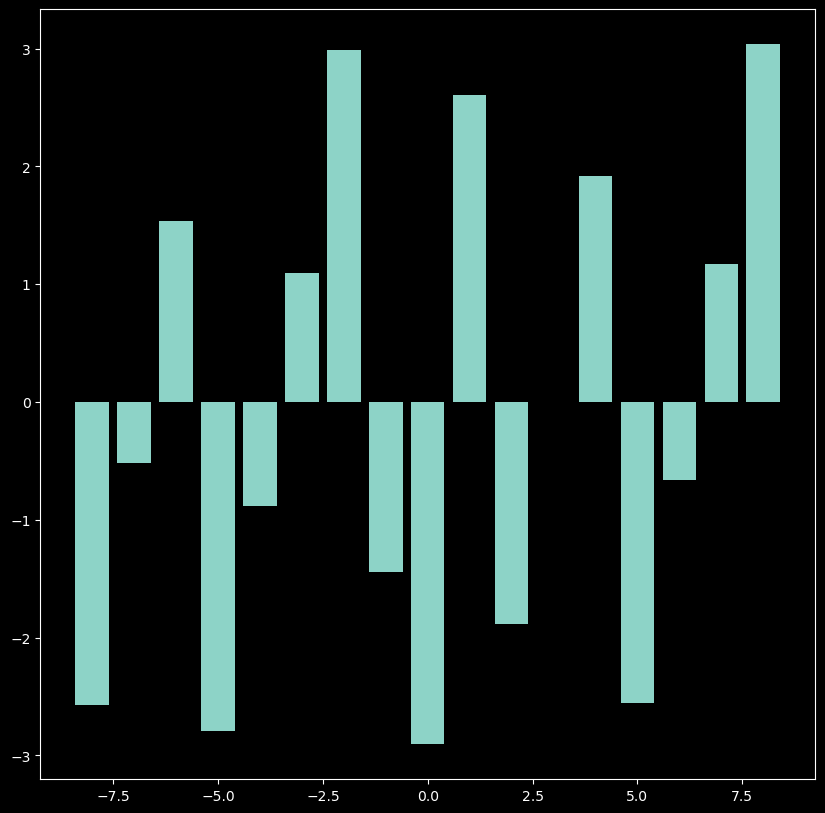

In [53]:
# plt.plot(np.unwrap(np.angle(np.diag(Ref_CouplingMat))))
# plt.bar(AzimthalIndeices,np.unwrap(np.angle(np.diag(Ref_CouplingMat))))
plt.bar(AzimthalIndeices,(np.angle(np.diag(Ref_CouplingMat))))

# plt.bar(AzimthalIndeices,(np.roll(np.unwrap(np.angle(np.diag(Ref_CouplingMat))),7)))


# plt.bar(AzimthalIndeices,(np.angle(np.diag(Ref_CouplingMat))))

# halfModeCount=np.floor(ExperData.modeCount_ReconBasis/2);
# idxArray=np.arange(-halfModeCount,halfModeCount+1);
# phase_shift=(idxArray/max(idxArray))*np.pi;
# plt.bar(AzimthalIndeices,np.unwrap(phase_shift))



In [94]:
print(np.angle(Ref_CouplingMat[0,0])-np.angle(Ref_CouplingMat[0,8]))
print(np.abs(Ref_CouplingMat[0,7]))

-0.47253162892379885
12873933053933.11


# Save the current Field to another .mat File

In [55]:
## Save the current Field to another .mat File
# NewFilePathName='SavedBatchFiles'+slash+'DFTGate17_MDL5p96_SNR3p44_batchBatch_MPLC_1'
# NewFilePathName='SavedBatchFiles'+slash+'JoelDFT17Mode_MDL7p74_SNR6p90_batchBatch_MPLC_1_F_GATE_SYMCHECK_ADIABATIC2'
# NewFilePathName='SavedBatchFiles'+slash+'LGAzimuth17Mode_MDL2p53_SNR21p49_batchBatch_MPLC_0'
# NewFilePathName='SavedBatchFiles'+slash+'LG_MG13_Plus_Superpostions_batchBatch_MPLC_1_ILAlginedDigholo__10FrameAvg'
# NewFilePostfex='JoelMaskZGate_MDL3p92_SNR_10p67_superpostion'
# NewFilePostfex='JoelMaskDFTGate_MDL5p74_SNR_11p76_superpostion'

##Gate Results
# NewFilePostfex='FinalRes_LGAzimuthal_MDL2p10_SNR_21p15'
# NewFilePostfex='FinalRes_LGAzimuthal_MDL2p10_SNR_21p15_superpostion'
# NewFilePostfex='FinalRes_LGAzimuthal_MDL2p10_SNR_21p15_superpostion_AllModesInMG12'

# NewFilePostfex='FinalRes_JoelMaskDFTGate_MDL5p74_SNR_11p76'
# NewFilePostfex='FinalRes_JoelMaskDFTGate_MDL5p74_SNR_11p76_superpostion'
# NewFilePostfex='FinalRes_JoelMaskDFTGate_MDL5p74_SNR_11p76_superpostion_AllModesInMG12'


# NewFilePostfex='FinalRes_JoelMaskXGate_MDL4p58_SNR_14p36'
# NewFilePostfex='FinalRes_JoelMaskXGate_MDL5p74_SNR_11p76_superpostion'
NewFilePostfex='FinalRes_JoelMaskXGate_MDL4p58_SNR_14p36_superpostion_AllModesInMG12'

# NewFilePostfex='FinalRes_JoelMaskZGate_MDL3p35_SNR_14p57'
# NewFilePostfex='FinalRes_JoelMaskZGate_MDL3p35_SNR_14p57_superpostion'
NewFilePostfex='FinalRes_JoelMaskZGate_MDL3p35_SNR_14p57_superpostion_A57llModesInMG12'



# 11.76

NewFilePathName='SavedBatchFiles'+slash+'batchBatch_MPLC_'+str(mplcIdx)+'_'+NewFilePostfex
Modelab.SaveDataToNewBatchFile(NewFilePathName,ExperData)

## Play around with fixing up phase term with more modes then what is needed i.e over sampleing

1 matmul
1 matmul
2 matmul
2 matmul
IL= 2.569808213169077 MDL= 6.019440931410537


IndexError: index 17 is out of bounds for axis 1 with size 17

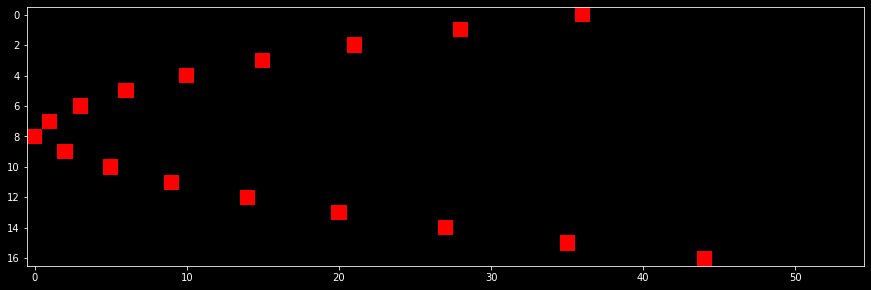

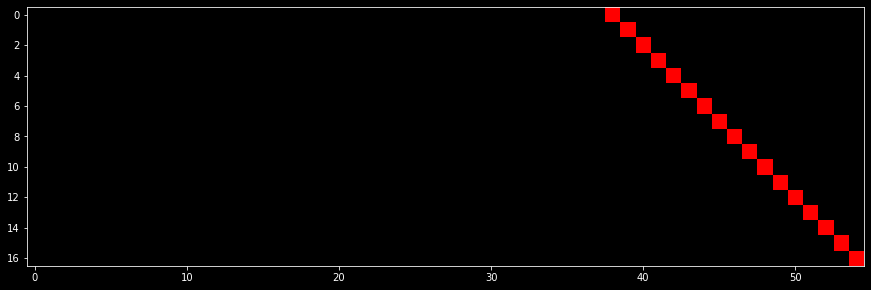

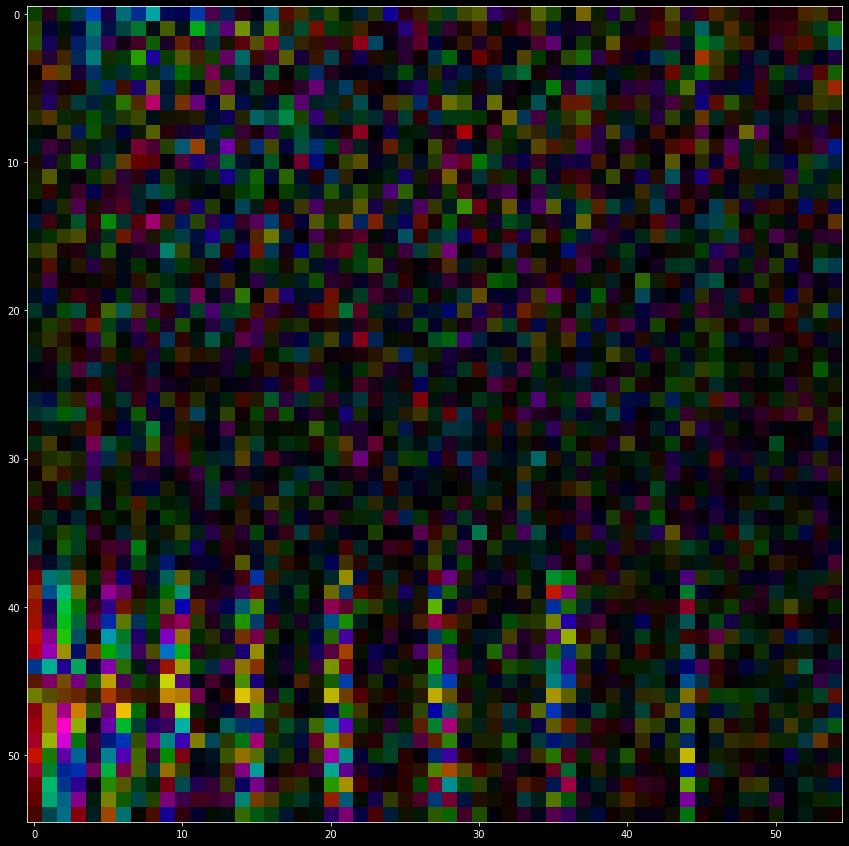

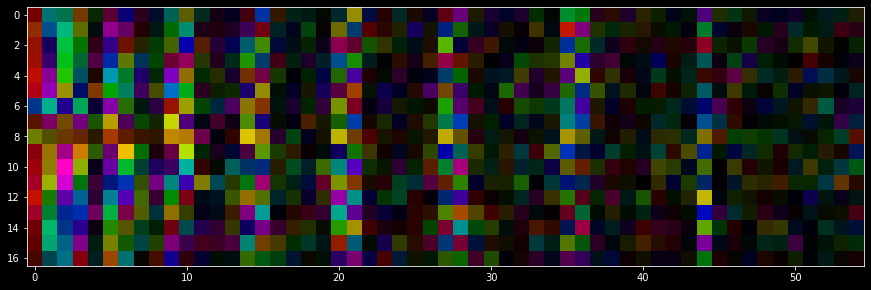

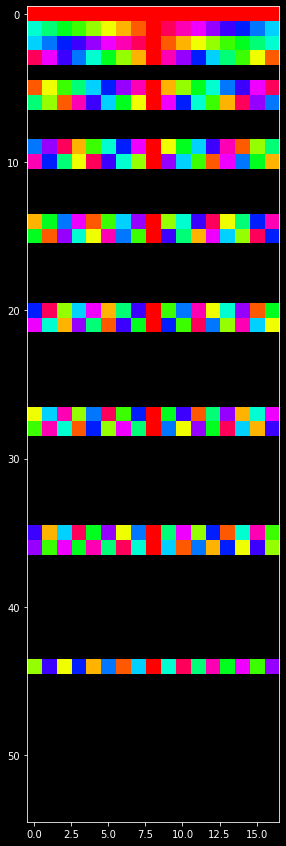

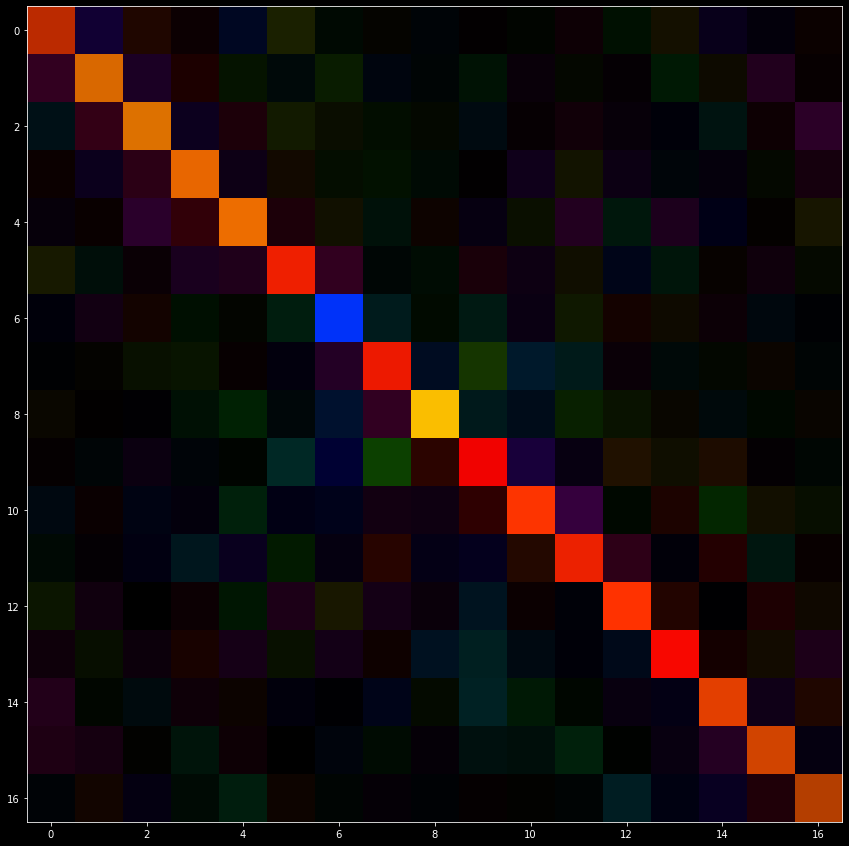

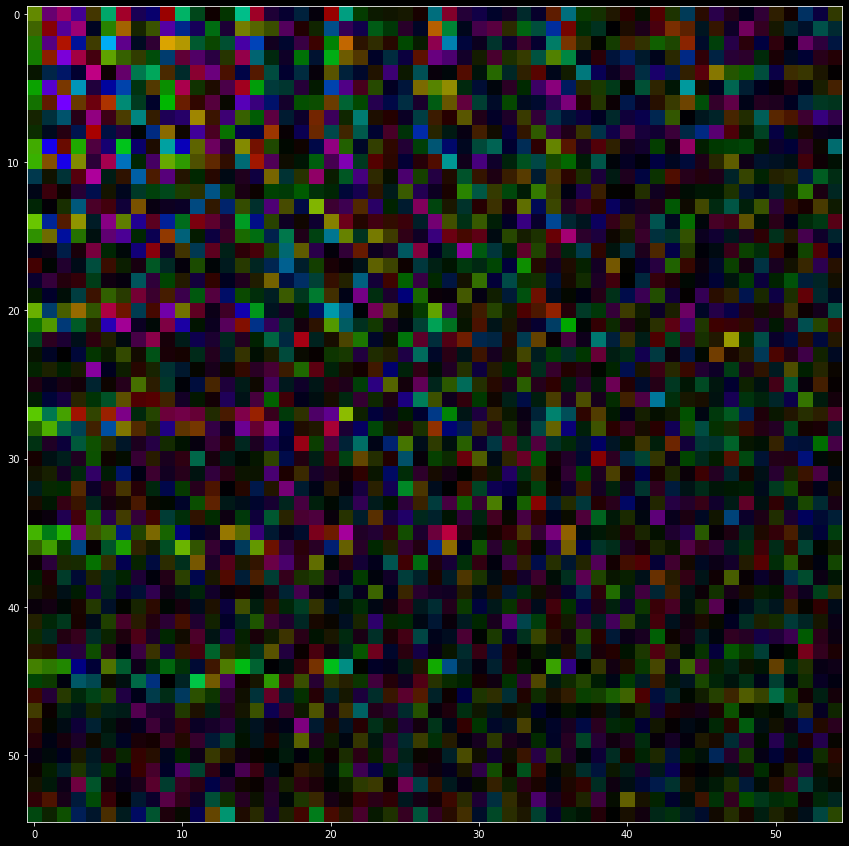

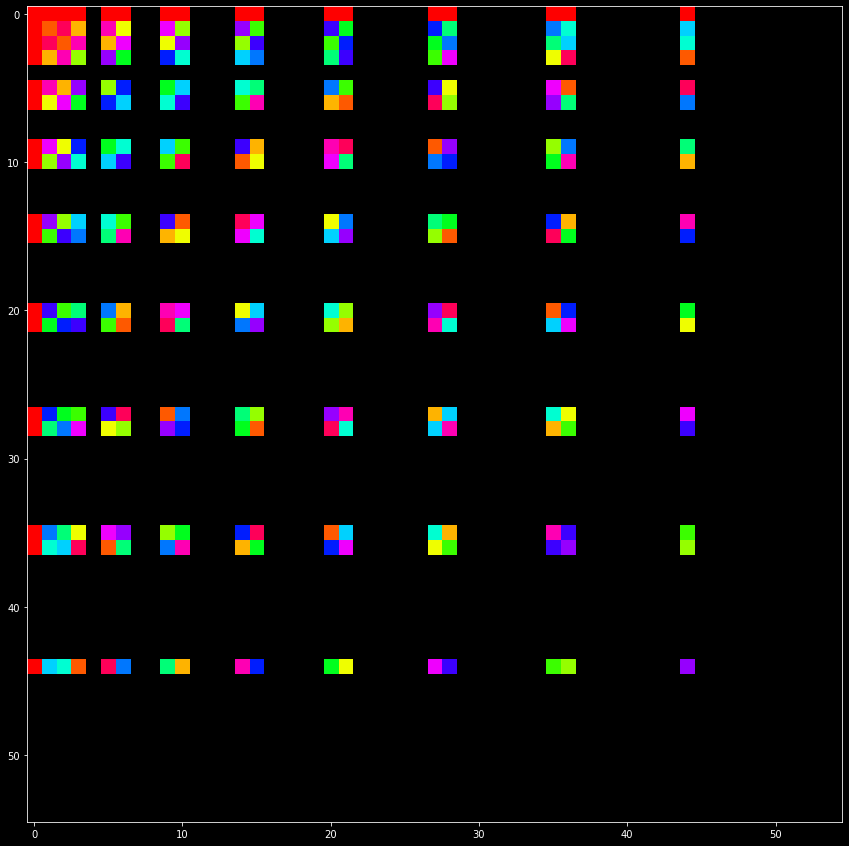

In [94]:
ipol1=0
CouplingMat=ExperData.CouplingMatrix[:,:,ipol1]
GaussianIndex=92 # the other one is at 93
plotCoupleMatrices=False
DoMetrics=False
MakeInvertedMatrix=False
MatlabFilename = 'CouplingMatrix_inv_From_MGGroup10_Azimuthals_AtEnd_Superpositions_Interwoven_Azmuth17_IL.mat'

LoadAndApplyInvertedMatrix=True
CouplingMat_GLobalPhaseShift=copy.deepcopy(CouplingMat)

#Shift the Gaussian show so that its Gaussian Element (First element in the reference row) has phase 0
# print(np.angle(CouplingMat_GLobalPhaseShift[GaussianIndex,0]))
# CouplingMat_GLobalPhaseShift[GaussianIndex,:]=CouplingMat_GLobalPhaseShift[GaussianIndex,:]*np.exp(-1j*np.angle(CouplingMat_GLobalPhaseShift[GaussianIndex,0]))
# print(np.angle(CouplingMat_GLobalPhaseShift[GaussianIndex,0]))

# Shift all the rows so that they are locked with the Gaussian
for imode in range(1,ExperData.modeCount_Frames,2):
    if(imode!=GaussianIndex):
        Phase_SupPos=np.angle(np.sum((CouplingMat_GLobalPhaseShift[imode,:])*np.conj(CouplingMat_GLobalPhaseShift[GaussianIndex,:])))
        CouplingMat_GLobalPhaseShift[imode,:]=CouplingMat_GLobalPhaseShift[imode,:]*np.exp(-1j*Phase_SupPos)


# print(GaussianRow.shape)
New_CouplingMat=np.zeros([ExperData.modeCount_ReconBasis,ExperData.modeCount_ReconBasis],dtype=complex)
Old_CouplingMat=np.zeros([ExperData.modeCount_ReconBasis,ExperData.modeCount_ReconBasis],dtype=complex)

PhaseShiftForMode=np.zeros(ExperData.modeCount_ReconBasis)
Field_FromExperiemnt=np.zeros([ExperData.modeCount_ReconBasis,ExperData.polCount,ExperData.Ny,ExperData.Nx],dtype=complex)
Field_PhaseShifted=np.zeros(Field_FromExperiemnt.shape,dtype=complex)
icounter=0
for imode in range(0,ExperData.modeCount_Frames,2):
    Old_CouplingMat[icounter,:]=CouplingMat_GLobalPhaseShift[imode,:]
    if(imode!=GaussianIndex):
        Phase_SupPos=np.sum((CouplingMat_GLobalPhaseShift[imode,:])*np.conj(CouplingMat_GLobalPhaseShift[imode+1,:]))
        PhaseShiftForMode[icounter]=np.angle(Phase_SupPos)
        New_CouplingMat[icounter,:]=CouplingMat_GLobalPhaseShift[imode,:]*np.exp(-1j* PhaseShiftForMode[icounter])
        
        #Apply and store Phase adjustments to Fields
        Field_FromExperiemnt[icounter,ipol1,:,:]=ExperData.Field[imode,ipol1,:,:]
        Field_PhaseShifted[icounter,ipol1,:,:]=ExperData.Field[imode,ipol1,:,:]*np.exp(-1j* PhaseShiftForMode[icounter])
    else:
        New_CouplingMat[icounter,:]=CouplingMat_GLobalPhaseShift[imode,:]
        Field_FromExperiemnt[icounter,ipol1,:,:]=ExperData.Field[imode,ipol1,:,:]
        Field_PhaseShifted[icounter,ipol1,:,:]=ExperData.Field[imode,ipol1,:,:]
        
    icounter=icounter+1

if(plotCoupleMatrices):
    # print(GlobalPhase)
    plt.figure()
    # plt.subplot(1,3,1)
    plt.imshow(cmplxplt.ComplexArrayToRgb(CouplingMat))
    # plt.subplot(1,3,2)
    plt.figure()
    plt.imshow(cmplxplt.ComplexArrayToRgb(CouplingMat_GLobalPhaseShift))
    # plt.subplot(1,3,3)
    plt.figure()
    plt.imshow(cmplxplt.ComplexArrayToRgb(New_CouplingMat))

    plt.figure()
    plt.imshow(cmplxplt.ComplexArrayToRgb(Old_CouplingMat))

if (LoadAndApplyInvertedMatrix):
    #Make filter Matrix
    # ModeType='LGAzim';
    ModeType='DFTGate'
    modeCountAzimthal=AzimthalIndeices.size
    # modeCountAzimthal=17
    
    ModesX1,ExperData= Modelab.MakeIdealModes('LGAzim',maxModeGroup-1,ExperData,'temp')
    ModesX2,ExperData= Modelab.MakeIdealModes('DFTGate',maxModeGroup-1,ExperData,'temp')
    
    IndexFilename='LGModesIndex.txt'
    ModesY1,ExperData= Modelab.MakeIdealModes('LGModeGroup',maxModeGroup,ExperData,IndexFilename)
    IndexFilename='LGModesIndexMGOrder.txt'
    # IndexFilename='LGModesIndex.txt' #This is needed if the inversion matrix is applied you also have to do a fftshift
    ModesY2,ExperData= Modelab.MakeIdealModes('LGModeGroup',maxModeGroup,ExperData,IndexFilename)
    
    
    ModeGate,ExperData= Modelab.MakeIdealModes(ModeType,maxModeGroup-1,ExperData,'temp')
    
    FilterMatrix1=MetricCals.CalculateCouplingMatrix(ModesY1,ModesX1[0:modeCountAzimthal,:,:],ExperData.pixelSize)
    # plt.figure()
    # plt.imshow(cmplxplt.ComplexArrayToRgb(FilterMatrix1))
    
    FilterMatrix2=MetricCals.CalculateCouplingMatrix(ModesX2[0:modeCountAzimthal,:,:],ModesY2,ExperData.pixelSize)
    FilterMatrix6=MetricCals.CalculateCouplingMatrix(ModesY2,ModesX1[0:modeCountAzimthal,:,:],ExperData.pixelSize)
    
    plt.figure()
    plt.imshow(cmplxplt.ComplexArrayToRgb(FilterMatrix6))
    
    # IL,MDL,SingularValues=MetricCals.CalculateILAndMDL(FilterMatrix)
    # outputstr='IL= '+ str(IL) +' MDL= ' +str(MDL)
    # print(outputstr)

    # MatlabFilename = 'CouplingMatrix_inv_From_MGGroup10_Azimuthals_AtEnd_Superpositions_Interwoven_Azmuth17.mat'
    data_mat=scipy.io.loadmat(MatlabFilename)
    CouplingMat_inv=data_mat['CouplingMat_inv']
    # CouplingMatrixWithInv=np.dot((CouplingMat_inv),New_CouplingMat)
    CouplingMatrixWithInv=np.dot((New_CouplingMat),(CouplingMat_inv))
    # plt.figure()
    # plt.imshow(cmplxplt.ComplexArrayToRgb(New_CouplingMat))
    # plt.figure()
    # plt.imshow(cmplxplt.ComplexArrayToRgb((CouplingMat_inv)))
    # plt.figure()
    # plt.imshow(cmplxplt.ComplexArrayToRgb(CouplingMatrixWithInv))
    # plt.figure()
    # plt.imshow(cmplxplt.ComplexArrayToRgb(FilterMatrix1))
    
    
    
    #Now we need to filter out the modes that we want to look at
    # FinalCouplingMat=np.dot(FilterMatrix1,(CouplingMatrixWithInv))
    # FinalCouplingMat_temp=np.dot(np.transpose(FilterMatrix1),(New_CouplingMat))
    # plt.figure()
    # plt.imshow(cmplxplt.ComplexArrayToRgb(CouplingMatrixWithInv))
    print('1 matmul')
    plt.figure()
    plt.imshow(cmplxplt.ComplexArrayToRgb(FilterMatrix1))
    plt.figure()
    plt.imshow(cmplxplt.ComplexArrayToRgb(New_CouplingMat))
    print('1 matmul')
    FinalCouplingMat_temp=np.dot((FilterMatrix1),(New_CouplingMat))#This works
    # FinalCouplingMat_temp=np.dot((FilterMatrix1),(CouplingMatrixWithInv))
    
    print('2 matmul')
    plt.figure()
    plt.imshow(cmplxplt.ComplexArrayToRgb(FinalCouplingMat_temp))
    plt.figure()
    plt.imshow(cmplxplt.ComplexArrayToRgb(FilterMatrix2))
    print('2 matmul')
    FinalCouplingMat=np.dot((FinalCouplingMat_temp),(FilterMatrix2))
    # FinalCouplingMat=np.dot(FilterMatrix,(CouplingMatrixWithInv))
    
    IL,MDL,SingularValues=MetricCals.CalculateILAndMDL(FinalCouplingMat)
    # IL,MDL,SingularValues=MetricCals.CalculateILAndMDL(fft.fftshift(FinalCouplingMat,1))
    
    
    outputstr='IL= '+ str(IL) +' MDL= ' +str(MDL)
    print(outputstr)
    plt.figure()
    plt.imshow(cmplxplt.ComplexArrayToRgb((FinalCouplingMat)))
    # plt.imshow(cmplxplt.ComplexArrayToRgb(fft.fftshift(FinalCouplingMat,1)))
    
    #Lets rebuild the modes up and look at what they look like
    # ReconstructedModes=OpticOp.ConvertModeViaTransformMatrix(np.dot(FilterMatrix1,(CouplingMat_inv)),Field_PhaseShifted[:,ipol1,:,:])
    ReconstructedModes1=OpticOp.ConvertModeViaTransformMatrix((CouplingMat_inv),Field_PhaseShifted[:,ipol1,:,:])
    # ReconstructedModes1=OpticOp.ConvertModeViaTransformMatrix((CouplingMat_inv),Field_PhaseShifted[:,ipol1,:,:])
    FilterMatrix3=MetricCals.CalculateCouplingMatrix(ReconstructedModes1,ModesY2,ExperData.pixelSize)
    plt.figure()
    plt.imshow(cmplxplt.ComplexArrayToRgb(FilterMatrix3))
    
    FilterMatrix4=np.dot((FilterMatrix2),(FilterMatrix6))
    plt.figure()
    plt.imshow(cmplxplt.ComplexArrayToRgb(FilterMatrix4))
    
    # # ReconstructedModes1=OpticOp.ConvertModeViaTransformMatrix(CouplingMat_inv,Field_FromExperiemnt[:,ipol1,:,:])
    ReconstructedModes2=OpticOp.ConvertModeViaTransformMatrix((FilterMatrix2),ReconstructedModes1)
    
    ReconstructedModes=OpticOp.ConvertModeViaTransformMatrix((FilterMatrix6),ReconstructedModes2)
    # ReconstructedModes=OpticOp.ConvertModeViaTransformMatrix(FilterMatrix1,Field_PhaseShifted[:,ipol1,:,:])

    #ReconstructedModes=OpticOp.ConvertModeViaTransformMatrix(FilterMatrix,Field_PhaseShifted[:,ipol1,:,:])

    # ReconstructedModes=OpticOp.ConvertModeViaTransformMatrix(FinalCouplingMat,ModesY)

    FinalMetrics=MetricCals.CalculateCoupMatrixAndMetrics(ModeGate,ReconstructedModes,ExperData.pixelSize)
    # # ReconstructModeMetrics=MetricCals.CalculateCoupMatrixAndMetrics(ReconstructedModes,ModesX[0:modeCountAzimthal,:,:],ExperData.pixelSize)
    ipywidgets.interact(OpticOp.PlotCouplingMatrixAndModes,imode=(0,modeCountAzimthal-1,1),FieldX =ipywidgets.fixed(ModeGate),FieldY =ipywidgets.fixed(ReconstructedModes), CouplingMatrix=ipywidgets.fixed(FinalMetrics.CouplingMatrix))
    
    # plt.figure()
    # plt.imshow(cmplxplt.ComplexArrayToRgb( np.linalg.inv(CouplingMat_inv)))


if(DoMetrics):
    # IL,MDL,SingularValues=MetricCals.CalculateILAndMDL(New_CouplingMat)
    ModeMetrics_phaseShifted=MetricCals.CalculateCoupMatrixAndMetrics(InputModes_Ideal, Field_PhaseShifted[:,ipol1,:,:],ExperData.pixelSize)
    ipywidgets.interact(OpticOp.PlotCouplingMatrixAndModes,imode=(0,ExperData.modeCount_ReconBasis-1,1),FieldX =ipywidgets.fixed(InputModes_Ideal),FieldY =ipywidgets.fixed(Field_PhaseShifted[:,ipol1,:,:]), CouplingMatrix=ipywidgets.fixed(ModeMetrics_phaseShifted.CouplingMatrix))

if(MakeInvertedMatrix):
    det_A = np.linalg.det(New_CouplingMat)
    # Check if the determinant is non-zero
    if det_A != 0:
        # Compute the inverse of the matrix
        New_CouplingMat_inv = np.linalg.inv(New_CouplingMat)
    else:
        print("The matrix is not invertible.")

    #THis just checks if the reconstriction worked
    NewModes=OpticOp.ConvertModeViaTransformMatrix(New_CouplingMat_inv,Field_PhaseShifted[:,ipol1,:,:])
    ModeMetrics_Reconstruct=MetricCals.CalculateCoupMatrixAndMetrics(InputModes_Ideal, NewModes,ExperData.pixelSize)
    ipywidgets.interact(OpticOp.PlotCouplingMatrixAndModes,imode=(0,ExperData.modeCount_ReconBasis-1,1),FieldX =ipywidgets.fixed(InputModes_Ideal),FieldY =ipywidgets.fixed(NewModes), CouplingMatrix=ipywidgets.fixed(ModeMetrics_Reconstruct.CouplingMatrix))


    #save the Matrix
    InvertedCouplingMatrix = {"CouplingMat_inv": New_CouplingMat_inv}
    # MatlabFilename = 'CouplingMatrix_inv_From_MGGroup10_Azimuthals_AtEnd_Superpositions_Interwoven_Azmuth17.mat'
    scipy.io.savemat(MatlabFilename, InvertedCouplingMatrix)
    # from scipy.fft import fft, fftfreq, fftshift, fft2,ifft2,rfft2,irfft2



# This seems to be working Correctly for LG modes The Cell Below will be an attempt at HG Modes

IL= 2.7507857169939154 MDL= 6.631467320945648 Vis= 0.9108097233059357 sum(diag)=95.55367863755438 SNR=10.091101470240364


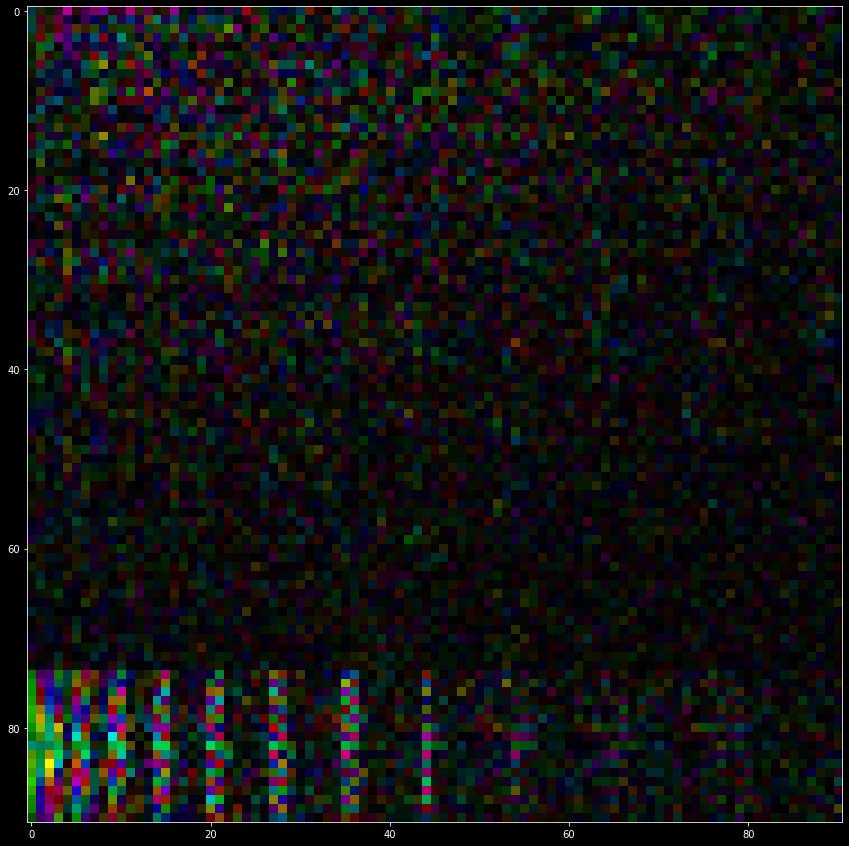

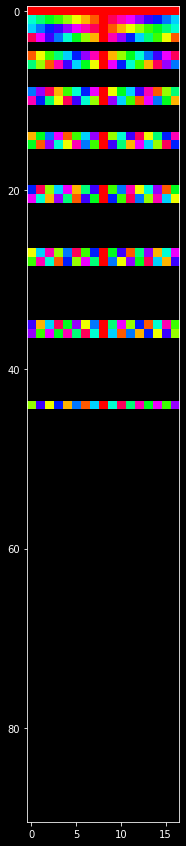

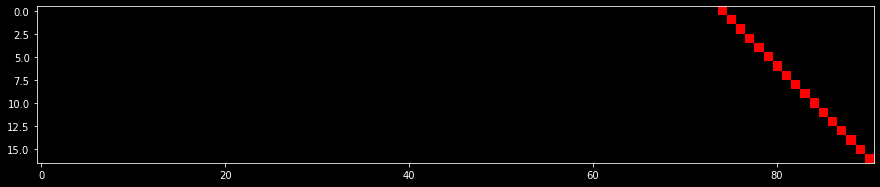

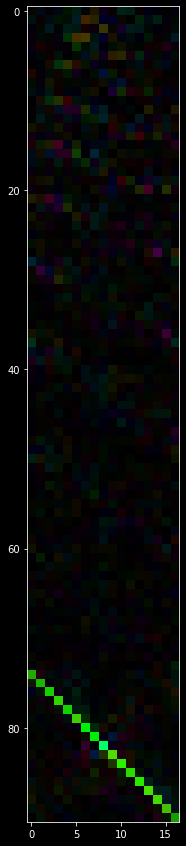

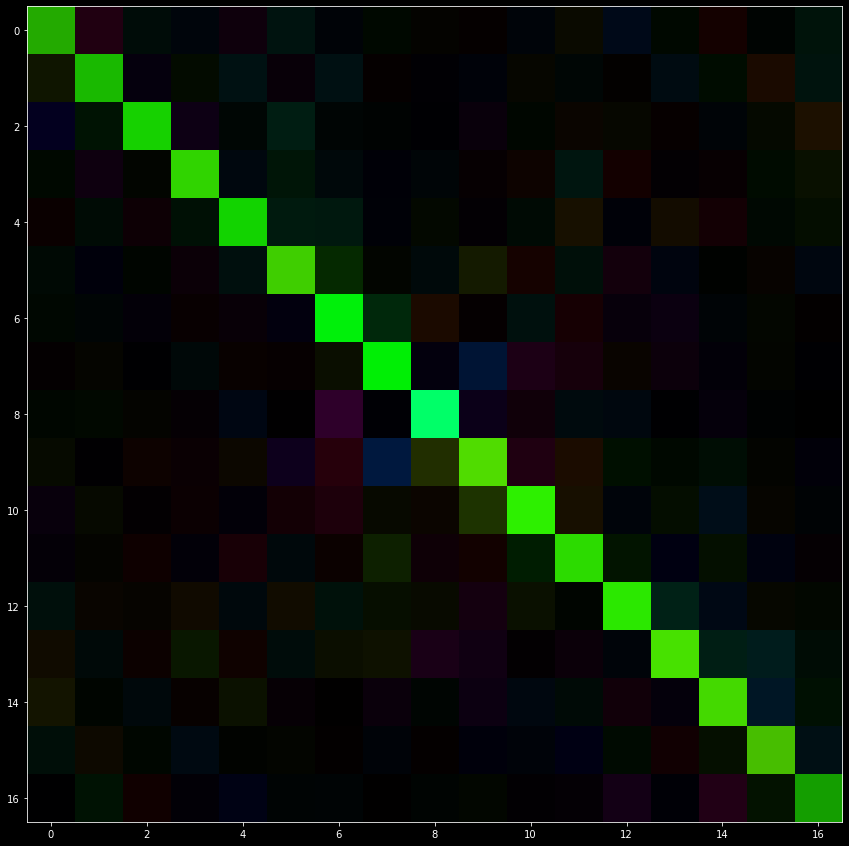

In [22]:
ipol1=0
CouplingMat=ExperData.CouplingMatrix[:,:,ipol1]
GaussianIndex=164 # the other one is at 93
plotCoupleMatrices=False
DoMetrics=False
MakeInvertedMatrix=False
MatlabFilename = 'CouplingMatrix_inv_From_MGGroup13_Azimuthals_AtEnd_Superpositions_Interwoven_Azmuth17_IL_10FrameAvg.mat'
# MatlabFilename = 'CouplingMatrix_inv_From_HG_MGGroup10_Superpositions_Interwoven_IL_10FrameAvg.mat'
LoadAndApplyInvertedMatrix=False
FilterPhaseAdjusted=True
CouplingMat_GLobalPhaseShift=copy.deepcopy(CouplingMat)

#Shift the Gaussian show so that its Gaussian Element (First element in the reference row) has phase 0
# print(np.angle(CouplingMat_GLobalPhaseShift[GaussianIndex,0]))
# CouplingMat_GLobalPhaseShift[GaussianIndex,:]=CouplingMat_GLobalPhaseShift[GaussianIndex,:]*np.exp(-1j*np.angle(CouplingMat_GLobalPhaseShift[GaussianIndex,0]))
# print(np.angle(CouplingMat_GLobalPhaseShift[GaussianIndex,0]))

# Shift all the rows so that they are locked with the Gaussian
for imode in range(1,ExperData.modeCount_Frames,2):
    if(imode!=GaussianIndex):
        Phase_SupPos=np.angle(np.sum((CouplingMat_GLobalPhaseShift[imode,:])*np.conj(CouplingMat_GLobalPhaseShift[GaussianIndex,:])))
        CouplingMat_GLobalPhaseShift[imode,:]=CouplingMat_GLobalPhaseShift[imode,:]*np.exp(-1j*Phase_SupPos)


# print(GaussianRow.shape)
New_CouplingMat=np.zeros([ExperData.modeCount_ReconBasis,ExperData.modeCount_ReconBasis],dtype=complex)
Old_CouplingMat=np.zeros([ExperData.modeCount_ReconBasis,ExperData.modeCount_ReconBasis],dtype=complex)

PhaseShiftForMode=np.zeros(ExperData.modeCount_ReconBasis)
Field_FromExperiemnt=np.zeros([ExperData.modeCount_ReconBasis,ExperData.polCount,ExperData.Ny,ExperData.Nx],dtype=complex)
Field_PhaseShifted=np.zeros(Field_FromExperiemnt.shape,dtype=complex)
icounter=0
for imode in range(0,ExperData.modeCount_Frames,2):
    Old_CouplingMat[icounter,:]=CouplingMat_GLobalPhaseShift[imode,:]
    if(imode!=GaussianIndex):
        Phase_SupPos=np.sum((CouplingMat_GLobalPhaseShift[imode,:])*np.conj(CouplingMat_GLobalPhaseShift[imode+1,:]))
        PhaseShiftForMode[icounter]=np.angle(Phase_SupPos)
        New_CouplingMat[icounter,:]=CouplingMat_GLobalPhaseShift[imode,:]*np.exp(-1j* PhaseShiftForMode[icounter])
        
        #Apply and store Phase adjustments to Fields
        Field_FromExperiemnt[icounter,ipol1,:,:]=ExperData.Field[imode,ipol1,:,:]
        Field_PhaseShifted[icounter,ipol1,:,:]=ExperData.Field[imode,ipol1,:,:]*np.exp(-1j* PhaseShiftForMode[icounter])
    else:
        New_CouplingMat[icounter,:]=CouplingMat_GLobalPhaseShift[imode,:]
        Field_FromExperiemnt[icounter,ipol1,:,:]=ExperData.Field[imode,ipol1,:,:]
        Field_PhaseShifted[icounter,ipol1,:,:]=ExperData.Field[imode,ipol1,:,:]
        
    icounter=icounter+1

if(plotCoupleMatrices):
    # print(GlobalPhase)
    plt.figure()
    # plt.subplot(1,3,1)
    plt.imshow(cmplxplt.ComplexArrayToRgb(CouplingMat))
    # plt.subplot(1,3,2)
    plt.figure()
    plt.imshow(cmplxplt.ComplexArrayToRgb(CouplingMat_GLobalPhaseShift))
    # plt.subplot(1,3,3)
    plt.figure()
    plt.imshow(cmplxplt.ComplexArrayToRgb(New_CouplingMat))

    plt.figure()
    plt.imshow(cmplxplt.ComplexArrayToRgb(Old_CouplingMat))
if(FilterPhaseAdjusted):
    #Make filter Matrix
    # ModeType='LGAzim';
    ModeType='DFTGate'
    modeCountAzimthal=AzimthalIndeices.size
    # modeCountAzimthal=17
    
    ModesX1,ExperData= Modelab.MakeIdealModes('LGAzim',maxModeGroup-(shiftidx)+1,ExperData,'temp')
    ModesX2,ExperData= Modelab.MakeIdealModes('DFTGate',maxModeGroup-(shiftidx)+1,ExperData,'temp')
    
    # IndexFilename='LGModesIndex.txt'
    IndexFilename='LGModesIndex_MG12.txt'
    ModesY1,ExperData= Modelab.MakeIdealModes('LGModeGroup',maxModeGroup,ExperData,IndexFilename)
    # IndexFilename='LGModesIndexMGOrder.txt'
    IndexFilename='LGModesIndexMGOrder_MG12.txt'
    ModesY2,ExperData= Modelab.MakeIdealModes('LGModeGroup',maxModeGroup,ExperData,IndexFilename)   
    # ModeGate,ExperData= Modelab.MakeIdealModes(ModeType,maxModeGroup-(shiftidx)+1,ExperData,'temp')
    
    FilterMatrix1=MetricCals.CalculateCouplingMatrix(ModesX2[0:modeCountAzimthal,:,:],ModesY2,ExperData.pixelSize)
    FilterMatrix2=MetricCals.CalculateCouplingMatrix(ModesY1,ModesX1[0:modeCountAzimthal,:,:],ExperData.pixelSize)
    
    #Now we need to filter out the modes that we want to look at
    plt.figure()
    plt.imshow(cmplxplt.ComplexArrayToRgb(New_CouplingMat))
    plt.figure()
    plt.imshow(cmplxplt.ComplexArrayToRgb(FilterMatrix1))
    FinalCouplingMat_temp=np.dot((New_CouplingMat),(FilterMatrix1))

    plt.figure()
    plt.imshow(cmplxplt.ComplexArrayToRgb(FilterMatrix2 ))
    plt.figure()
    plt.imshow(cmplxplt.ComplexArrayToRgb(FinalCouplingMat_temp))
    FinalCouplingMat=np.dot((FilterMatrix2),(FinalCouplingMat_temp))
    
    
    IL,MDL,SingularValues=MetricCals.CalculateILAndMDL(FinalCouplingMat)
    SNR,DiagPwrSum,Visibility,DiagCoup,OffDiagCoup=MetricCals.CalculateSNR(FinalCouplingMat)
    # IL,MDL,SingularValues=MetricCals.CalculateILAndMDL(fft.fftshift(FinalCouplingMat,1))
    # outputstr='IL= '+ str(IL) +' MDL= ' +str(MDL)
    outputstr='IL= '+ str(IL) +' MDL= ' +str(MDL) + ' Vis= '+str(Visibility)+ ' sum(diag)=' +str(DiagPwrSum) +' SNR=' +str(SNR)
    print(outputstr)
    plt.figure()
    plt.imshow(cmplxplt.ComplexArrayToRgb((FinalCouplingMat)))

if (LoadAndApplyInvertedMatrix):
    #Make filter Matrix
    # ModeType='LGAzim';
    ModeType='DFTGate'
    modeCountAzimthal=AzimthalIndeices.size
    # modeCountAzimthal=17
    
    ModesX1,ExperData= Modelab.MakeIdealModes('LGAzim',maxModeGroup-(shiftidx)+1,ExperData,'temp')
    ModesX2,ExperData= Modelab.MakeIdealModes('DFTGate',maxModeGroup-(shiftidx)+1,ExperData,'temp')
    
    # IndexFilename='LGModesIndex.txt'
    IndexFilename='LGModesIndex_MG12.txt'
    ModesY1,ExperData= Modelab.MakeIdealModes('LGModeGroup',maxModeGroup,ExperData,IndexFilename)
    # IndexFilename='LGModesIndexMGOrder.txt'
    IndexFilename='LGModesIndexMGOrder_MG12.txt'
    ModesY2,ExperData= Modelab.MakeIdealModes('LGModeGroup',maxModeGroup,ExperData,IndexFilename)
    
    
    ModeGate,ExperData= Modelab.MakeIdealModes(ModeType,maxModeGroup-(shiftidx)+1,ExperData,'temp')
    
    FilterMatrix1=MetricCals.CalculateCouplingMatrix(ModesY1,ModesX1[0:modeCountAzimthal,:,:],ExperData.pixelSize)
    FilterMatrix5=MetricCals.CalculateCouplingMatrix(ModesX2[0:modeCountAzimthal,:,:],ModesY1,ExperData.pixelSize)
    # plt.figure()
    # plt.imshow(cmplxplt.ComplexArrayToRgb(FilterMatrix1))
    
    # FilterMatrix2=MetricCals.CalculateCouplingMatrix(ModesX2[0:modeCountAzimthal,:,:],ModesY2,ExperData.pixelSize)
    # FilterMatrix6=MetricCals.CalculateCouplingMatrix(ModesY2,ModesX1[0:modeCountAzimthal,:,:],ExperData.pixelSize)
    
    # plt.figure()
    # plt.imshow(cmplxplt.ComplexArrayToRgb(FilterMatrix6))
    
    # IL,MDL,SingularValues=MetricCals.CalculateILAndMDL(FilterMatrix)
    # outputstr='IL= '+ str(IL) +' MDL= ' +str(MDL)
    # print(outputstr)

    # MatlabFilename = 'CouplingMatrix_inv_From_MGGroup10_Azimuthals_AtEnd_Superpositions_Interwoven_Azmuth17.mat'
    data_mat=scipy.io.loadmat(MatlabFilename)
    CouplingMat_inv=data_mat['CouplingMat_inv']
    CouplingMatrixWithInv2=np.dot((CouplingMat_inv),New_CouplingMat)
    CouplingMatrixWithInv=np.dot((New_CouplingMat),(CouplingMat_inv))
    plt.figure()
    plt.imshow(cmplxplt.ComplexArrayToRgb(New_CouplingMat))
    plt.figure()
    plt.imshow(cmplxplt.ComplexArrayToRgb((CouplingMat_inv)))
    plt.figure()
    plt.imshow(cmplxplt.ComplexArrayToRgb(CouplingMatrixWithInv))
    plt.figure()
    plt.imshow(cmplxplt.ComplexArrayToRgb(CouplingMatrixWithInv2))
    # plt.figure()
    # plt.imshow(cmplxplt.ComplexArrayToRgb(FilterMatrix1))
    
    
    
    #Now we need to filter out the modes that we want to look at
    # FinalCouplingMat=np.dot(FilterMatrix1,(CouplingMatrixWithInv))
    # FinalCouplingMat_temp=np.dot(np.transpose(FilterMatrix1),(New_CouplingMat))
    # plt.figure()
    # plt.imshow(cmplxplt.ComplexArrayToRgb(CouplingMatrixWithInv))
    plt.figure()
    plt.imshow(cmplxplt.ComplexArrayToRgb(New_CouplingMat))
    plt.figure()
    plt.imshow(cmplxplt.ComplexArrayToRgb(FilterMatrix5))
    # FinalCouplingMat_temp=np.dot((New_CouplingMat),(FilterMatrix2))#This works
    FinalCouplingMat_temp=np.dot((CouplingMatrixWithInv),(FilterMatrix5))
    
    # FinalCouplingMat_temp=np.dot((FilterMatrix1),(CouplingMatrixWithInv))
    
    plt.figure()
    plt.imshow(cmplxplt.ComplexArrayToRgb(FilterMatrix1 ))
    plt.figure()
    plt.imshow(cmplxplt.ComplexArrayToRgb(FinalCouplingMat_temp))
    # FinalCouplingMat=np.dot((FinalCouplingMat_temp),(FilterMatrix2))
    FinalCouplingMat=fft.fftshift(np.dot((FilterMatrix1),(FinalCouplingMat_temp)),1)
    
    # FinalCouplingMat=np.dot(FilterMatrix,(CouplingMatrixWithInv))
    
    IL,MDL,SingularValues=MetricCals.CalculateILAndMDL(FinalCouplingMat)
    SNR,DiagPwrSum,Visibility,DiagCoup,OffDiagCoup=MetricCals.CalculateSNR(FinalCouplingMat)
    # IL,MDL,SingularValues=MetricCals.CalculateILAndMDL(fft.fftshift(FinalCouplingMat,1))
    # outputstr='IL= '+ str(IL) +' MDL= ' +str(MDL)
    outputstr='IL= '+ str(IL) +' MDL= ' +str(MDL) + ' Vis= '+str(Visibility)+ ' sum(diag)=' +str(DiagPwrSum) +' SNR=' +str(SNR)
    print(outputstr)
    plt.figure()
    plt.imshow(cmplxplt.ComplexArrayToRgb((FinalCouplingMat)))
    # plt.imshow(cmplxplt.ComplexArrayToRgb(fft.fftshift(FinalCouplingMat,1)))
    
    #Lets rebuild the modes up and look at what they look like
    # ReconstructedModes=OpticOp.ConvertModeViaTransformMatrix(np.dot(FilterMatrix1,(CouplingMat_inv)),Field_PhaseShifted[:,ipol1,:,:])
    # ReconstructedModes1=copy.deepcopy(Field_PhaseShifted[:,ipol1,:,:])
    # for imode in range(55):
    #     ReconstructedModes1[imode,:,:]=OpticOp.ConvertModeViaTransformMatrix((CouplingMat_inv[:,imode]),Field_PhaseShifted[:,ipol1,:,:])
    # ReconstructedModes1=OpticOp.ConvertModeViaTransformMatrix((CouplingMat_inv),Field_PhaseShifted[:,ipol1,:,:],"Right")
    # FilterMatrix3=MetricCals.CalculateCouplingMatrix(ReconstructedModes1,ModesY1,ExperData.pixelSize)
    # plt.figure()
    # plt.imshow(cmplxplt.ComplexArrayToRgb(FilterMatrix3))
    
    # # FilterMatrix4=np.dot((FilterMatrix2),(FilterMatrix6))
    # # plt.figure()
    # # plt.imshow(cmplxplt.ComplexArrayToRgb(FilterMatrix4))
    
    # # # ReconstructedModes1=OpticOp.ConvertModeViaTransformMatrix(CouplingMat_inv,Field_FromExperiemnt[:,ipol1,:,:])
    # #ReconstructedModes2=OpticOp.ConvertModeViaTransformMatrix((FilterMatrix2),ReconstructedModes1)
    
    # ReconstructedModes=OpticOp.ConvertModeViaTransformMatrix(np.transpose(FilterMatrix5),ReconstructedModes1)
    # # # ReconstructedModes=OpticOp.ConvertModeViaTransformMatrix(FilterMatrix1,Field_PhaseShifted[:,ipol1,:,:])

    # # #ReconstructedModes=OpticOp.ConvertModeViaTransformMatrix(FilterMatrix,Field_PhaseShifted[:,ipol1,:,:])

    # # # ReconstructedModes=OpticOp.ConvertModeViaTransformMatrix(FinalCouplingMat,ModesY)

    # FinalMetrics=MetricCals.CalculateCoupMatrixAndMetrics(ModeGate,ReconstructedModes,ExperData.pixelSize)
    # # # ReconstructModeMetrics=MetricCals.CalculateCoupMatrixAndMetrics(ReconstructedModes,ModesX[0:modeCountAzimthal,:,:],ExperData.pixelSize)
    # ipywidgets.interact(OpticOp.PlotCouplingMatrixAndModes,imode=(0,modeCountAzimthal-1,1),FieldX =ipywidgets.fixed(ModeGate),FieldY =ipywidgets.fixed(ReconstructedModes), CouplingMatrix=ipywidgets.fixed(FinalMetrics.CouplingMatrix))
    
    # plt.figure()
    # plt.imshow(cmplxplt.ComplexArrayToRgb( np.linalg.inv(CouplingMat_inv)))


if(DoMetrics):
    # IL,MDL,SingularValues=MetricCals.CalculateILAndMDL(New_CouplingMat)
    ModeMetrics_phaseShifted=MetricCals.CalculateCoupMatrixAndMetrics(InputModes_Ideal, Field_PhaseShifted[:,ipol1,:,:],ExperData.pixelSize)
    ipywidgets.interact(OpticOp.PlotCouplingMatrixAndModes,imode=(0,ExperData.modeCount_ReconBasis-1,1),FieldX =ipywidgets.fixed(InputModes_Ideal),FieldY =ipywidgets.fixed(Field_PhaseShifted[:,ipol1,:,:]), CouplingMatrix=ipywidgets.fixed(ModeMetrics_phaseShifted.CouplingMatrix))

if(MakeInvertedMatrix):
    det_A = np.linalg.det(New_CouplingMat)
    # Check if the determinant is non-zero
    if det_A != 0:
        # Compute the inverse of the matrix
        New_CouplingMat_inv = np.linalg.inv(New_CouplingMat)
    else:
        print("The matrix is not invertible.")
    plt.figure()
    plt.imshow(cmplxplt.ComplexArrayToRgb(New_CouplingMat)) 
    plt.figure()
    plt.imshow(cmplxplt.ComplexArrayToRgb(New_CouplingMat_inv)) 
    #THis just checks if the reconstriction worked
    NewModes=OpticOp.ConvertModeViaTransformMatrix(New_CouplingMat_inv,Field_PhaseShifted[:,ipol1,:,:])
    ModeMetrics_Reconstruct=MetricCals.CalculateCoupMatrixAndMetrics(InputModes_Ideal, NewModes,ExperData.pixelSize)
    ipywidgets.interact(OpticOp.PlotCouplingMatrixAndModes,imode=(0,ExperData.modeCount_ReconBasis-1,1),FieldX =ipywidgets.fixed(InputModes_Ideal),FieldY =ipywidgets.fixed(NewModes), CouplingMatrix=ipywidgets.fixed(ModeMetrics_Reconstruct.CouplingMatrix))


    #save the Matrix
    InvertedCouplingMatrix = {"CouplingMat_inv": New_CouplingMat_inv}
    # MatlabFilename = 'CouplingMatrix_inv_From_MGGroup10_Azimuthals_AtEnd_Superpositions_Interwoven_Azmuth17.mat'
    scipy.io.savemat(MatlabFilename, InvertedCouplingMatrix)
    # from scipy.fft import fft, fftfreq, fftshift, fft2,ifft2,rfft2,irfft2



# This is attempting to get it working for HG modes

1 matmul
1 matmul
2 matmul
2 matmul
IL= 4.083603771333179 MDL= 16.55238880155966


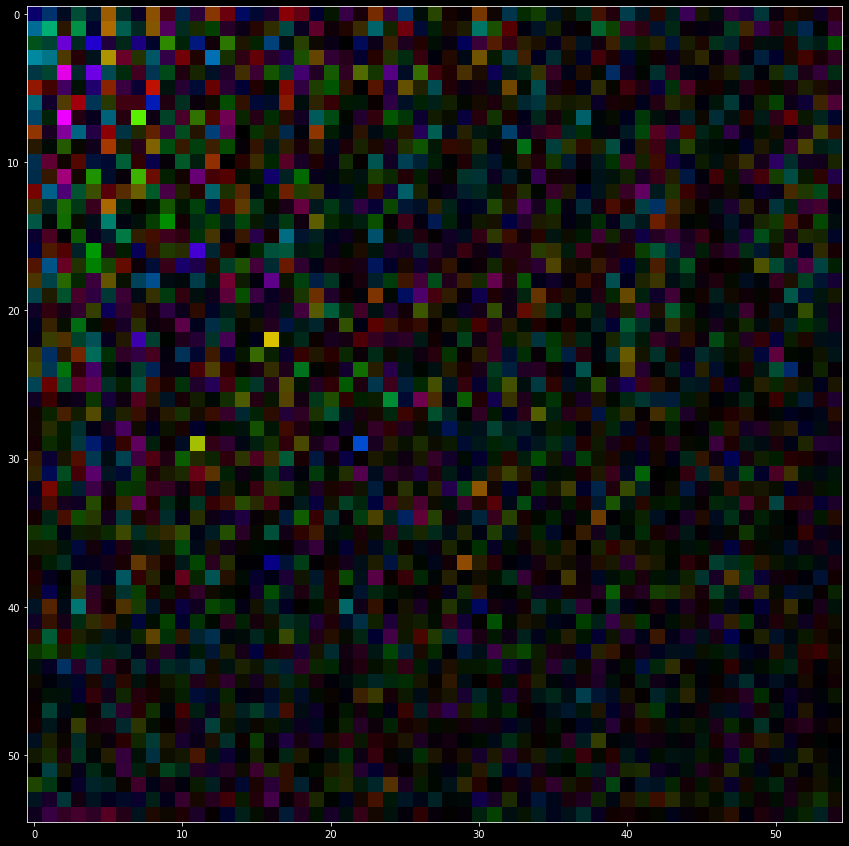

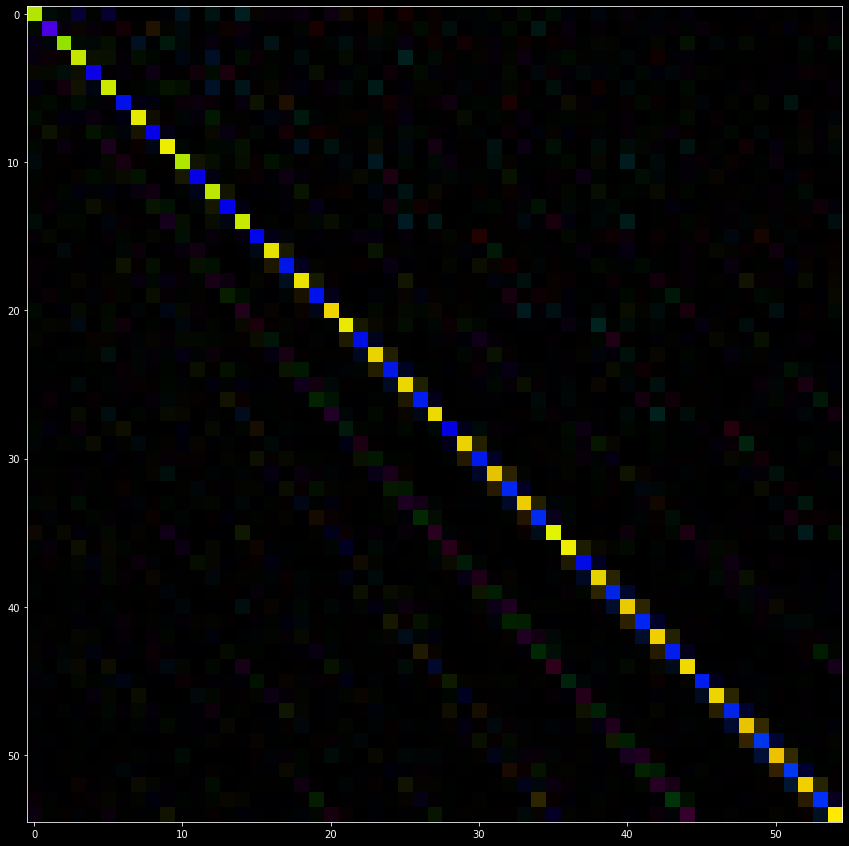

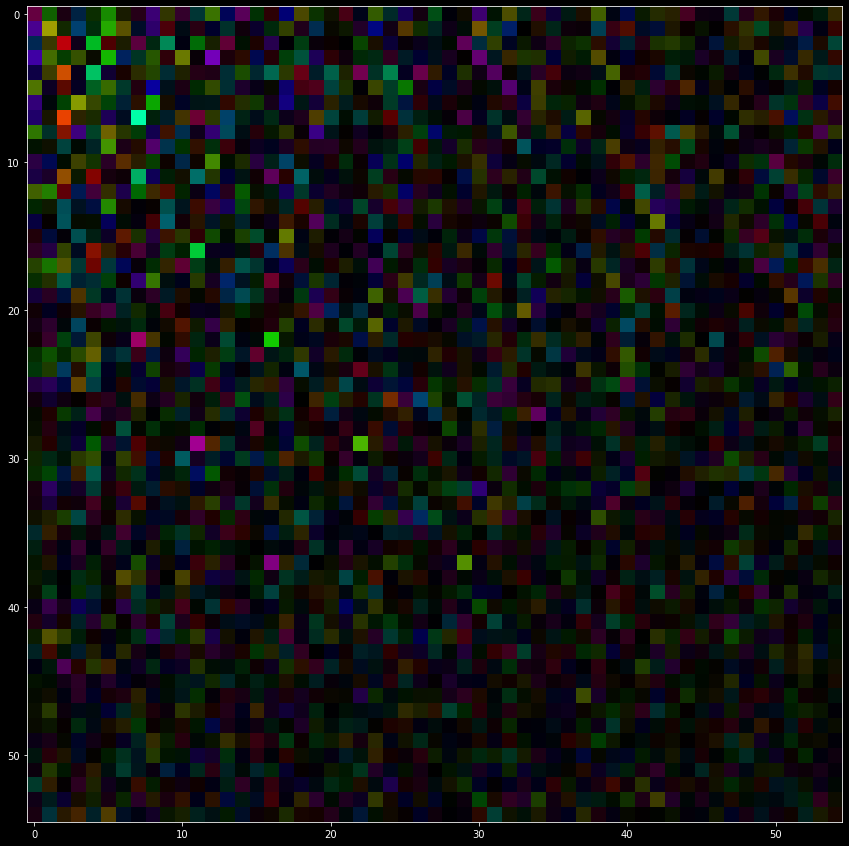

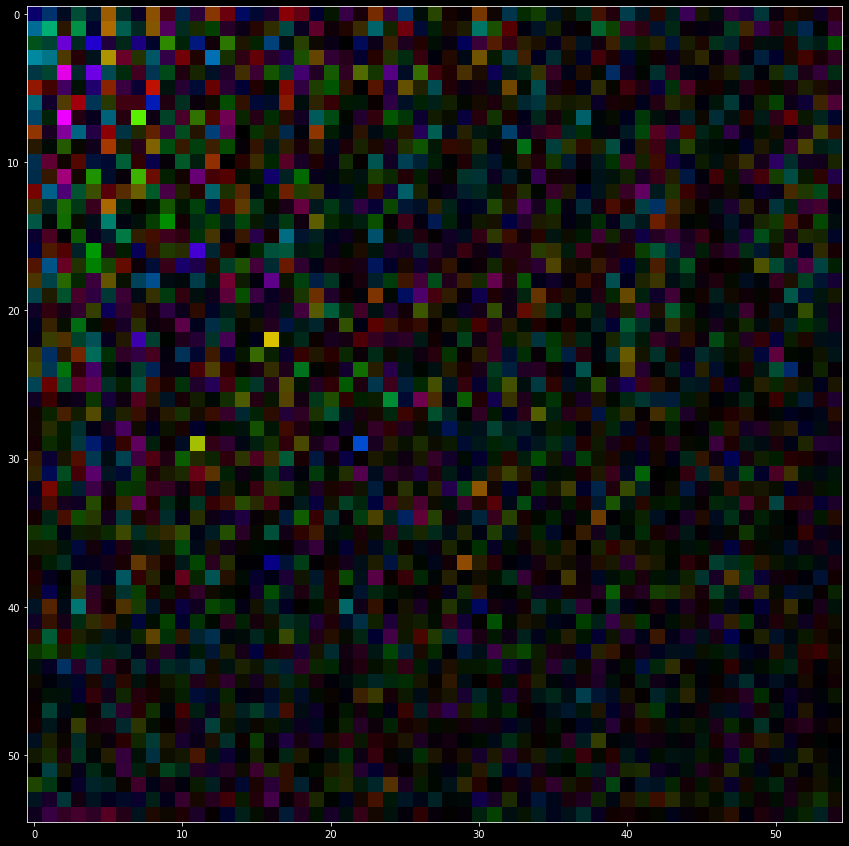

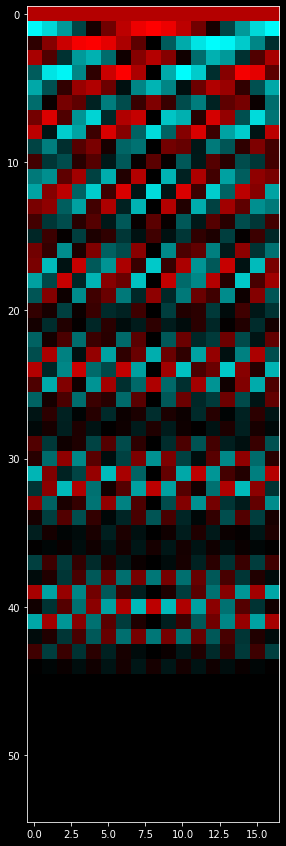

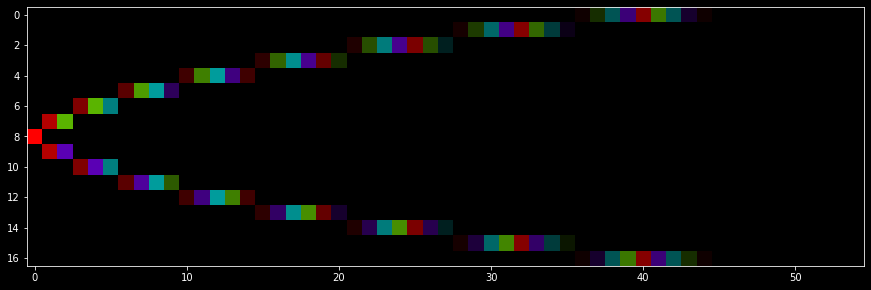

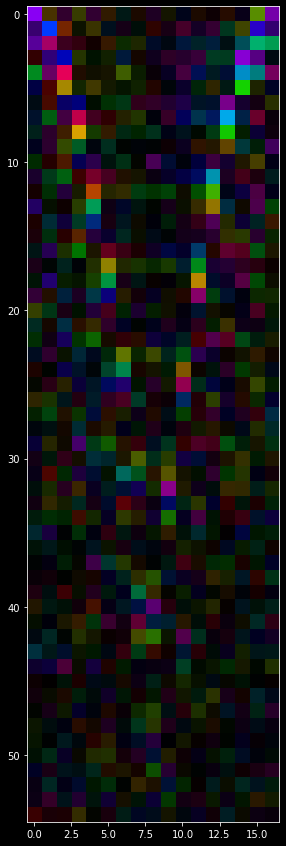

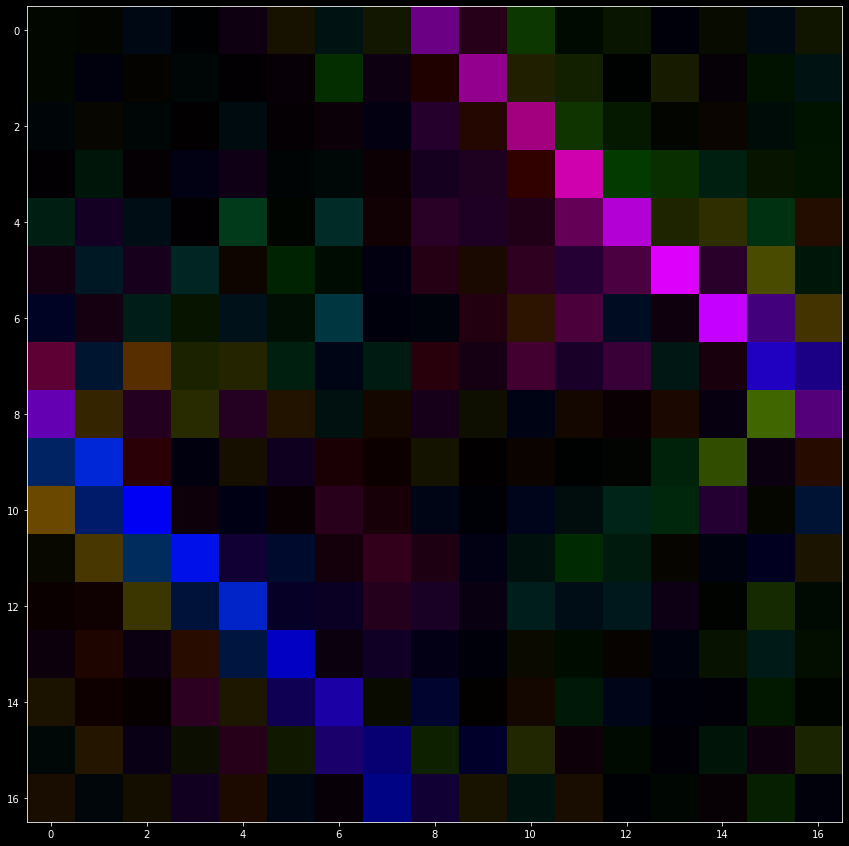

In [29]:
ipol1=0
CouplingMat=ExperData.CouplingMatrix[:,:,ipol1]
GaussianIndex=0 # the other one is at 93
plotCoupleMatrices=False
DoMetrics=False
MakeInvertedMatrix=False
# MatlabFilename = 'CouplingMatrix_inv_From_MGGroup10_Azimuthals_AtEnd_Superpositions_Interwoven_Azmuth17_IL.mat'
MatlabFilename = 'CouplingMatrix_inv_From_HG_MGGroup10_Superpositions_Interwoven_IL.mat'
LoadAndApplyInvertedMatrix=True
CouplingMat_GLobalPhaseShift=copy.deepcopy(CouplingMat)

#Shift the Gaussian show so that its Gaussian Element (First element in the reference row) has phase 0
# print(np.angle(CouplingMat_GLobalPhaseShift[GaussianIndex,0]))
# CouplingMat_GLobalPhaseShift[GaussianIndex,:]=CouplingMat_GLobalPhaseShift[GaussianIndex,:]*np.exp(-1j*np.angle(CouplingMat_GLobalPhaseShift[GaussianIndex,0]))
# print(np.angle(CouplingMat_GLobalPhaseShift[GaussianIndex,0]))

# Shift all the rows so that they are locked with the Gaussian
for imode in range(1,ExperData.modeCount_Frames,2):
    if(imode!=GaussianIndex):
        Phase_SupPos=np.angle(np.sum((CouplingMat_GLobalPhaseShift[imode,:])*np.conj(CouplingMat_GLobalPhaseShift[GaussianIndex,:])))
        CouplingMat_GLobalPhaseShift[imode,:]=CouplingMat_GLobalPhaseShift[imode,:]*np.exp(-1j*Phase_SupPos)


# print(GaussianRow.shape)
New_CouplingMat=np.zeros([ExperData.modeCount_ReconBasis,ExperData.modeCount_ReconBasis],dtype=complex)
Old_CouplingMat=np.zeros([ExperData.modeCount_ReconBasis,ExperData.modeCount_ReconBasis],dtype=complex)

PhaseShiftForMode=np.zeros(ExperData.modeCount_ReconBasis)
Field_FromExperiemnt=np.zeros([ExperData.modeCount_ReconBasis,ExperData.polCount,ExperData.Ny,ExperData.Nx],dtype=complex)
Field_PhaseShifted=np.zeros(Field_FromExperiemnt.shape,dtype=complex)
icounter=0
for imode in range(0,ExperData.modeCount_Frames,2):
    Old_CouplingMat[icounter,:]=CouplingMat_GLobalPhaseShift[imode,:]
    if(imode!=GaussianIndex):
        Phase_SupPos=np.sum((CouplingMat_GLobalPhaseShift[imode,:])*np.conj(CouplingMat_GLobalPhaseShift[imode+1,:]))
        PhaseShiftForMode[icounter]=np.angle(Phase_SupPos)
        New_CouplingMat[icounter,:]=CouplingMat_GLobalPhaseShift[imode,:]*np.exp(-1j* PhaseShiftForMode[icounter])
        
        #Apply and store Phase adjustments to Fields
        Field_FromExperiemnt[icounter,ipol1,:,:]=ExperData.Field[imode,ipol1,:,:]
        Field_PhaseShifted[icounter,ipol1,:,:]=ExperData.Field[imode,ipol1,:,:]*np.exp(-1j* PhaseShiftForMode[icounter])
    else:
        New_CouplingMat[icounter,:]=CouplingMat_GLobalPhaseShift[imode,:]
        Field_FromExperiemnt[icounter,ipol1,:,:]=ExperData.Field[imode,ipol1,:,:]
        Field_PhaseShifted[icounter,ipol1,:,:]=ExperData.Field[imode,ipol1,:,:]
        
    icounter=icounter+1

if(plotCoupleMatrices):
    # print(GlobalPhase)
    plt.figure()
    # plt.subplot(1,3,1)
    plt.imshow(cmplxplt.ComplexArrayToRgb(CouplingMat))
    # plt.subplot(1,3,2)
    plt.figure()
    plt.imshow(cmplxplt.ComplexArrayToRgb(CouplingMat_GLobalPhaseShift))
    # plt.subplot(1,3,3)
    plt.figure()
    plt.imshow(cmplxplt.ComplexArrayToRgb(New_CouplingMat))

    plt.figure()
    plt.imshow(cmplxplt.ComplexArrayToRgb(Old_CouplingMat))

if (LoadAndApplyInvertedMatrix):
    #Make filter Matrix
    # ModeType='LGAzim';
    ModeType='DFTGate'
    modeCountAzimthal=AzimthalIndeices.size
    
    ModesX1,ExperData= Modelab.MakeIdealModes('LGAzim',maxModeGroup-1,ExperData,'temp')
    ModesX2,ExperData= Modelab.MakeIdealModes('DFTGate',maxModeGroup-1,ExperData,'temp')
    
    IndexFilename='LGModesIndex.txt'
    IndexFilename='HGGroup10_mn.txt'
    ModesY1,ExperData= Modelab.MakeIdealModes('HGModeGroup',maxModeGroup,ExperData,IndexFilename)
    IndexFilename='LGModesIndexMGOrder.txt'
    IndexFilename='HGGroup10_mn.txt'
    
    # IndexFilename='LGModesIndex.txt' #This is needed if the inversion matrix is applied you also have to do a fftshift
    ModesY2,ExperData= Modelab.MakeIdealModes('HGModeGroup',maxModeGroup,ExperData,IndexFilename)
    
    
    ModeGate,ExperData= Modelab.MakeIdealModes(ModeType,maxModeGroup-1,ExperData,'temp')
    
    FilterMatrix1=MetricCals.CalculateCouplingMatrix(ModesY1,ModesX1[0:modeCountAzimthal,:,:],ExperData.pixelSize)
    
    FilterMatrix5=MetricCals.CalculateCouplingMatrix(ModesX2[0:modeCountAzimthal,:,:],ModesY1,ExperData.pixelSize)
    # plt.figure()
    # plt.imshow(cmplxplt.ComplexArrayToRgb(FilterMatrix1))
    
    # FilterMatrix2=MetricCals.CalculateCouplingMatrix(ModesX2[0:modeCountAzimthal,:,:],ModesY2,ExperData.pixelSize)
    # FilterMatrix6=MetricCals.CalculateCouplingMatrix(ModesY2,ModesX1[0:modeCountAzimthal,:,:],ExperData.pixelSize)
    
    # plt.figure()
    # plt.imshow(cmplxplt.ComplexArrayToRgb(FilterMatrix6))
    
    # IL,MDL,SingularValues=MetricCals.CalculateILAndMDL(FilterMatrix)
    # outputstr='IL= '+ str(IL) +' MDL= ' +str(MDL)
    # print(outputstr)

    # MatlabFilename = 'CouplingMatrix_inv_From_MGGroup10_Azimuthals_AtEnd_Superpositions_Interwoven_Azmuth17.mat'
    data_mat=scipy.io.loadmat(MatlabFilename)
    CouplingMat_inv=data_mat['CouplingMat_inv']
    # CouplingMatrixWithInv2=np.dot((CouplingMat_inv),New_CouplingMat)
    CouplingMatrixWithInv=np.dot((New_CouplingMat),(CouplingMat_inv))
    plt.figure()
    plt.imshow(cmplxplt.ComplexArrayToRgb(New_CouplingMat))
    plt.figure()
    plt.imshow(cmplxplt.ComplexArrayToRgb((CouplingMat_inv)))
    plt.figure()
    plt.imshow(cmplxplt.ComplexArrayToRgb(CouplingMatrixWithInv))
    # plt.figure()
    # plt.imshow(cmplxplt.ComplexArrayToRgb(CouplingMatrixWithInv2))
    # plt.figure()
    # plt.imshow(cmplxplt.ComplexArrayToRgb(FilterMatrix1))
    
    
    
    #Now we need to filter out the modes that we want to look at
    # FinalCouplingMat=np.dot(FilterMatrix1,(CouplingMatrixWithInv))
    # FinalCouplingMat_temp=np.dot(np.transpose(FilterMatrix1),(New_CouplingMat))
    # plt.figure()
    # plt.imshow(cmplxplt.ComplexArrayToRgb(CouplingMatrixWithInv))
    print('1 matmul')
    plt.figure()
    plt.imshow(cmplxplt.ComplexArrayToRgb(New_CouplingMat))
    plt.figure()
    plt.imshow(cmplxplt.ComplexArrayToRgb(FilterMatrix5))
    print('1 matmul')
    # FinalCouplingMat_temp=np.dot((New_CouplingMat),(FilterMatrix2))#This works
    FinalCouplingMat_temp=np.dot((CouplingMatrixWithInv),(FilterMatrix5))
    
    # FinalCouplingMat_temp=np.dot((FilterMatrix1),(CouplingMatrixWithInv))
    
    print('2 matmul')
    plt.figure()
    plt.imshow(cmplxplt.ComplexArrayToRgb(FilterMatrix1 ))
    plt.figure()
    plt.imshow(cmplxplt.ComplexArrayToRgb(FinalCouplingMat_temp))
    print('2 matmul')
    # FinalCouplingMat=np.dot((FinalCouplingMat_temp),(FilterMatrix2))
    FinalCouplingMat=np.dot(FilterMatrix1,(FinalCouplingMat_temp))
    
    # FinalCouplingMat=np.dot(FilterMatrix,(CouplingMatrixWithInv))
    
    IL,MDL,SingularValues=MetricCals.CalculateILAndMDL(FinalCouplingMat)
    # IL,MDL,SingularValues=MetricCals.CalculateILAndMDL(fft.fftshift(FinalCouplingMat,1))
    
    
    outputstr='IL= '+ str(IL) +' MDL= ' +str(MDL)
    print(outputstr)
    plt.figure()
    plt.imshow(cmplxplt.ComplexArrayToRgb((FinalCouplingMat)))
    # plt.imshow(cmplxplt.ComplexArrayToRgb(fft.fftshift(FinalCouplingMat,1)))
    
    #Lets rebuild the modes up and look at what they look like
    # ReconstructedModes=OpticOp.ConvertModeViaTransformMatrix(np.dot(FilterMatrix1,(CouplingMat_inv)),Field_PhaseShifted[:,ipol1,:,:])
    # ReconstructedModes1=copy.deepcopy(Field_PhaseShifted[:,ipol1,:,:])
    # for imode in range(55):
    #     ReconstructedModes1[imode,:,:]=OpticOp.ConvertModeViaTransformMatrix((CouplingMat_inv[:,imode]),Field_PhaseShifted[:,ipol1,:,:])
    # ReconstructedModes1=OpticOp.ConvertModeViaTransformMatrix((CouplingMat_inv),Field_PhaseShifted[:,ipol1,:,:],"Right")
    # FilterMatrix3=MetricCals.CalculateCouplingMatrix(ReconstructedModes1,ModesY1,ExperData.pixelSize)
    # plt.figure()
    # plt.imshow(cmplxplt.ComplexArrayToRgb(FilterMatrix3))
    
    # FilterMatrix4=np.dot((FilterMatrix2),(FilterMatrix6))
    # plt.figure()
    # plt.imshow(cmplxplt.ComplexArrayToRgb(FilterMatrix4))
    
    # # ReconstructedModes1=OpticOp.ConvertModeViaTransformMatrix(CouplingMat_inv,Field_FromExperiemnt[:,ipol1,:,:])
    #ReconstructedModes2=OpticOp.ConvertModeViaTransformMatrix((FilterMatrix2),ReconstructedModes1)
    
    # ReconstructedModes=OpticOp.ConvertModeViaTransformMatrix(np.transpose(FilterMatrix5),ReconstructedModes1)
    # # ReconstructedModes=OpticOp.ConvertModeViaTransformMatrix(FilterMatrix1,Field_PhaseShifted[:,ipol1,:,:])

    # #ReconstructedModes=OpticOp.ConvertModeViaTransformMatrix(FilterMatrix,Field_PhaseShifted[:,ipol1,:,:])

    # # ReconstructedModes=OpticOp.ConvertModeViaTransformMatrix(FinalCouplingMat,ModesY)

    # FinalMetrics=MetricCals.CalculateCoupMatrixAndMetrics(ModeGate,ReconstructedModes,ExperData.pixelSize)
    # # # ReconstructModeMetrics=MetricCals.CalculateCoupMatrixAndMetrics(ReconstructedModes,ModesX[0:modeCountAzimthal,:,:],ExperData.pixelSize)
    # ipywidgets.interact(OpticOp.PlotCouplingMatrixAndModes,imode=(0,modeCountAzimthal-1,1),FieldX =ipywidgets.fixed(ModeGate),FieldY =ipywidgets.fixed(ReconstructedModes), CouplingMatrix=ipywidgets.fixed(FinalMetrics.CouplingMatrix))
    
    # plt.figure()
    # plt.imshow(cmplxplt.ComplexArrayToRgb( np.linalg.inv(CouplingMat_inv)))


if(DoMetrics):
    # IL,MDL,SingularValues=MetricCals.CalculateILAndMDL(New_CouplingMat)
    ModeMetrics_phaseShifted=MetricCals.CalculateCoupMatrixAndMetrics(InputModes_Ideal, Field_PhaseShifted[:,ipol1,:,:],ExperData.pixelSize)
    ipywidgets.interact(OpticOp.PlotCouplingMatrixAndModes,imode=(0,ExperData.modeCount_ReconBasis-1,1),FieldX =ipywidgets.fixed(InputModes_Ideal),FieldY =ipywidgets.fixed(Field_PhaseShifted[:,ipol1,:,:]), CouplingMatrix=ipywidgets.fixed(ModeMetrics_phaseShifted.CouplingMatrix))

if(MakeInvertedMatrix):
    det_A = np.linalg.det(New_CouplingMat)
    # Check if the determinant is non-zero
    if det_A != 0:
        # Compute the inverse of the matrix
        New_CouplingMat_inv = np.linalg.inv(New_CouplingMat)
    else:
        print("The matrix is not invertible.")
    plt.figure()
    plt.imshow(cmplxplt.ComplexArrayToRgb(New_CouplingMat)) 
    plt.figure()
    plt.imshow(cmplxplt.ComplexArrayToRgb(New_CouplingMat_inv)) 
    #THis just checks if the reconstriction worked
    NewModes=OpticOp.ConvertModeViaTransformMatrix(New_CouplingMat_inv,Field_PhaseShifted[:,ipol1,:,:])
    ModeMetrics_Reconstruct=MetricCals.CalculateCoupMatrixAndMetrics(InputModes_Ideal, NewModes,ExperData.pixelSize)
    ipywidgets.interact(OpticOp.PlotCouplingMatrixAndModes,imode=(0,ExperData.modeCount_ReconBasis-1,1),FieldX =ipywidgets.fixed(InputModes_Ideal),FieldY =ipywidgets.fixed(NewModes), CouplingMatrix=ipywidgets.fixed(ModeMetrics_Reconstruct.CouplingMatrix))


    #save the Matrix
    InvertedCouplingMatrix = {"CouplingMat_inv": New_CouplingMat_inv}
    # MatlabFilename = 'CouplingMatrix_inv_From_MGGroup10_Azimuthals_AtEnd_Superpositions_Interwoven_Azmuth17.mat'
    scipy.io.savemat(MatlabFilename, InvertedCouplingMatrix)
    # from scipy.fft import fft, fftfreq, fftshift, fft2,ifft2,rfft2,irfft2



In [19]:
imode=2
np.angle(New_CouplingMat[imode,imode])-np.angle(New_CouplingMat[imode+1,imode+1])

-0.23250913125216122

In [8]:
FinalMetrics=MetricCals.CalculateCoupMatrixAndMetrics(Field_FromExperiemnt[:,ipol1,:,:],Field_FromExperiemnt[:,ipol1,:,:],ExperData.pixelSize)
# ReconstructModeMetrics=MetricCals.CalculateCoupMatrixAndMetrics(ReconstructedModes,ModesX[0:modeCountAzimthal,:,:],ExperData.pixelSize)
ipywidgets.interact(OpticOp.PlotCouplingMatrixAndModes,imode=(0,modeCountAzimthal-1,1),FieldX =ipywidgets.fixed(Field_FromExperiemnt[:,ipol1,:,:]),FieldY =ipywidgets.fixed(Field_PhaseShifted[:,ipol1,:,:]), CouplingMatrix=ipywidgets.fixed(FinalMetrics.CouplingMatrix))


IL= 7.223991795468089 MDL= 24.401129532793405 Vis= 0.7634181352410327 sum(diag)=21.10183734971433 SNR=5.087810219219283


interactive(children=(IntSlider(value=8, description='imode', max=16), Output()), _dom_classes=('widget-intera…

<function MyLibs.OpticalOperators.PlotCouplingMatrixAndModes(imode, FieldX, FieldY, CouplingMatrix)>

# Make filter Matrices

IL= 4.57697253163301e-07 MDL= 8.884149036853842e-07


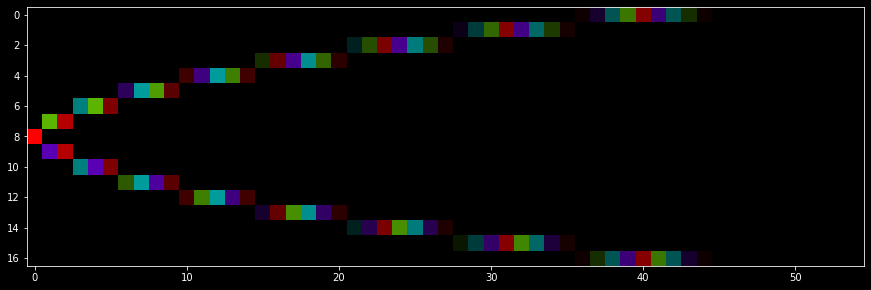

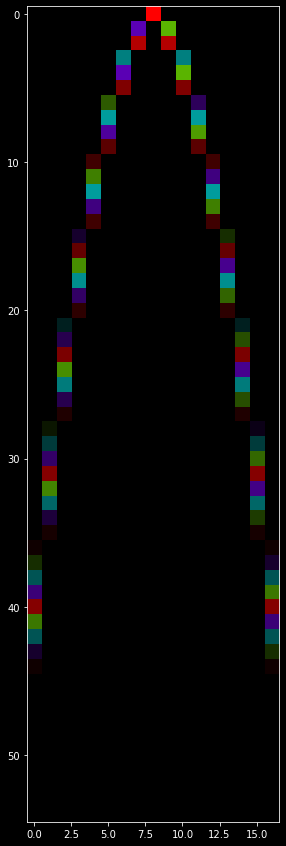

interactive(children=(IntSlider(value=27, description='imode', max=54), Output()), _dom_classes=('widget-inter…

interactive(children=(IntSlider(value=27, description='imode', max=54), Output()), _dom_classes=('widget-inter…

<function MyLibs.OpticalOperators.PlotCouplingMatrixAndModes(imode, FieldX, FieldY, CouplingMatrix)>

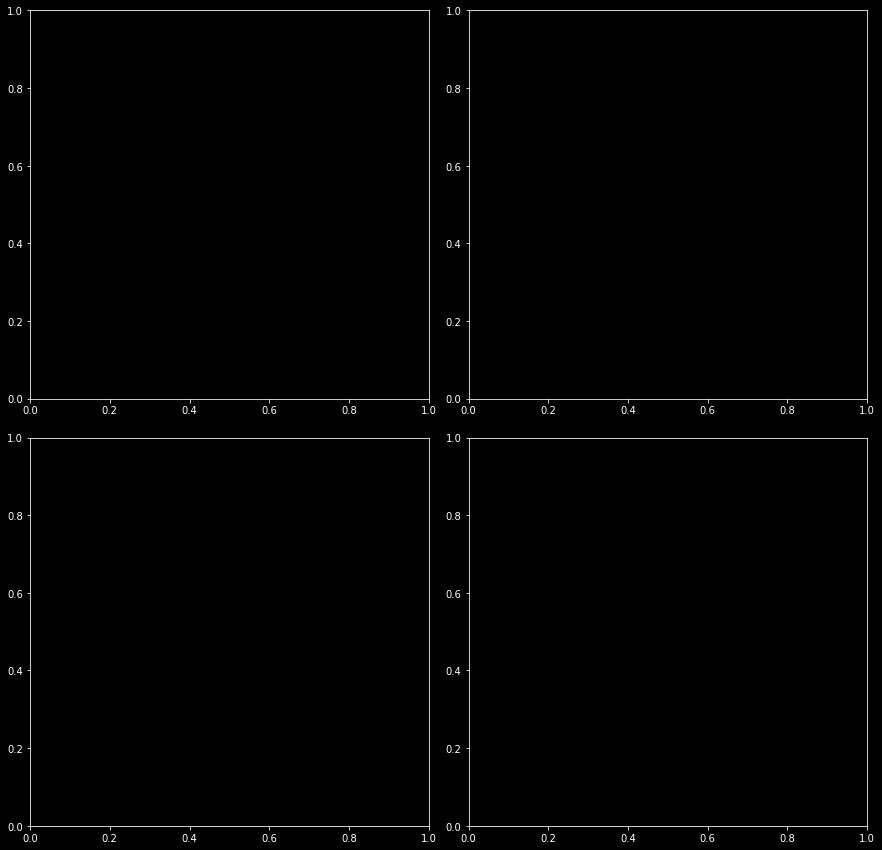

In [82]:
ModeType='DFTGate';
ModeType='LGAzim';

modeCountAzimthal=AzimthalIndeices.size
ModesX,ExperData= Modelab.MakeIdealModes(ModeType,maxModeGroup-1,ExperData)
# ModesY,ExperData= Modelab.MakeIdealModes('LGModeGroup',maxModeGroup,ExperData)
ModesY,ExperData= Modelab.MakeIdealModes('HGModeGroup',maxModeGroup,ExperData,'HGGroup10_mn.txt')

# FilterMatrix=MetricCals.CalculateCouplingMatrix(ModesY,ModesX[0:modeCountAzimthal,:,:],ExperData.pixelSize)
FilterMatrix_YX=MetricCals.CalculateCouplingMatrix(ModesY,ModesX[0:modeCountAzimthal,:,:],ExperData.pixelSize)
FilterMatrix_XY=MetricCals.CalculateCouplingMatrix(ModesX[0:modeCountAzimthal,:,:],ModesY,ExperData.pixelSize)


IL,MDL,SingularValues=MetricCals.CalculateILAndMDL(FilterMatrix_XY)
outputstr='IL= '+ str(IL) +' MDL= ' +str(MDL)
print(outputstr)

# ipywidgets.interact(OpticOp.PlotCouplingMatrixAndModes,imode=(0,ExperData.modeCount_ReconBasis-1,1),FieldX =ipywidgets.fixed(ModesX),FieldY =ipywidgets.fixed(ModesY), CouplingMatrix=ipywidgets.fixed(ModeFilterMetrics.CouplingMatrix))




plt.figure()
plt.imshow(cmplxplt.ComplexArrayToRgb( FilterMatrix_YX))

plt.figure()
plt.imshow(cmplxplt.ComplexArrayToRgb( FilterMatrix_XY))

# transFiedl=OpticOp.ConvertModeViaTransformMatrix(FilterMatrix,ModesY)
# ipywidgets.interact(OpticOp.PlotCouplingMatrixAndModes,imode=(0,ExperData.modeCount_ReconBasis-1,1),FieldX =ipywidgets.fixed(transFiedl),FieldY =ipywidgets.fixed(ModesX[0:modeCountAzimthal,:,:]), CouplingMatrix=ipywidgets.fixed(FilterMatrix))

transFied_XY=OpticOp.ConvertModeViaTransformMatrix((FilterMatrix_XY),ModesX[0:modeCountAzimthal,:,:])
transFied_YX=OpticOp.ConvertModeViaTransformMatrix(FilterMatrix_YX,ModesY)

ipywidgets.interact(OpticOp.PlotCouplingMatrixAndModes,imode=(0,ExperData.modeCount_ReconBasis-1,1),FieldX =ipywidgets.fixed(transFied_XY),FieldY =ipywidgets.fixed(ModesY), CouplingMatrix=ipywidgets.fixed(FilterMatrix_XY))
ipywidgets.interact(OpticOp.PlotCouplingMatrixAndModes,imode=(0,ExperData.modeCount_ReconBasis-1,1),FieldX =ipywidgets.fixed(transFied_YX),FieldY =ipywidgets.fixed(ModesX[0:modeCountAzimthal,:,:]), CouplingMatrix=ipywidgets.fixed(FilterMatrix_YX))


    

# I dont know what i was doing in the below cell but have kept it just incase it is something good

In [29]:
# ExpoFields=ExpoDataInputMode.Field
# IdealFields=InputModes
# ModeMetrics_FromModelab=MetricCals.CalculateMetrics(GateModeMetrics.CouplingMatrix[:,:])
CoupMat=copy.deepcopy(np.squeeze(ExperData.CouplingMatrix[:,:,ipol1]))
ModeMetrics_FromModelab=MetricCals.CalculateMetrics(ExperData.CouplingMatrix[:,:,ipol1])
NewCoup=np.zeros(CoupMat.shape,dtype=complex)
# for imode in range(ExpoDataGateMode.modeCount_ReconBasis):
#     # normfactor=sum(np.abs(ExpoDataGateMode.CouplingMatrix[imode,:,ipol])**2)
#     # ExpoDataGateMode.CouplingMatrix[imode,:,ipol]=ExpoDataGateMode.CouplingMatrix[imode,:,ipol]/np.sqrt(normfactor)
#     # normfactor=sum(np.abs(ModeMetrics_FromModelab.CouplingMatrix[imode,:])**2)
#     normfactor=np.sum(np.abs(CoupMat[imode,:])**2)
    
#     NewCoup[imode,:]=CoupMat[imode,:]/np.sqrt(normfactor)
    # print(sum(np.abs(ModeMetrics_FromModelab.CouplingMatrix[imode,:])**2))
# ModeMetrics=MetricCals.CalculateCoupMatrixAndMetrics(InputModes_Ideal, ExperData.Field[:,ipol1,:,:],ExperData.pixelSize)
# ModeMetrics_FromModelab=MetricCals.CalculateMetrics(ExpoDataGateMode.CouplingMatrix[:,:,ipol])
normfactor=np.sum(np.sum(np.abs(CoupMat)**2))
NewCoup=CoupMat*(np.sqrt(ExperData.modeCount_ReconBasis)/(np.sqrt(normfactor)))
print(np.sum(np.abs(NewCoup)**2))
ModeMetrics_new=MetricCals.CalculateMetrics(NewCoup)

print(np.sum(np.diag(np.abs(NewCoup)**2)))
print((np.diag(np.abs(NewCoup)**2)))
print(((np.abs(NewCoup[2,:])**2)))
couplMat=NewCoup


xaxis=np.arange(ExperData.modeCount_ReconBasis)
yaxis=np.arange(ExperData.modeCount_ReconBasis)
XAxis,YAxis=np.meshgrid(xaxis,yaxis)
plt.style.use('default')
plt.figure()
plt.imshow(abs(couplMat)**2,cmap='inferno')
plt.xticks(xaxis, fontsize=8)
plt.yticks(yaxis, fontsize=8)
plt.colorbar()

plt.xlabel('Theoretical Mode',fontsize=16)
plt.ylabel('Experimental Mode',fontsize=16)

19

## Save the current Field to another .mat File
# NewFilePathName='SavedBatchFiles'+slash+'DFTGate17_MDL5p96_SNR3p44_batchBatch_MPLC_1'
# NewFilePathName='SavedBatchFiles'+slash+'JoelDFT17Mode_MDL7p74_SNR6p90_batchBatch_MPLC_1_F_GATE_SYMCHECK_ADIABATIC2'
# NewFilePathName='SavedBatchFiles'+slash+'LGAzimuth17Mode_MDL2p53_SNR21p49_batchBatch_MPLC_0'
NewFilePathName='SavedBatchFiles'+slash+'LG_MG13_Plus_Superpostions_batchBatch_MPLC_0_ILAlginedDigholo__10FrameAvg'

Modelab.SaveDataToNewBatchFile(NewFilePathName,ExperData)

# Just Load data from Batch file

In [ ]:
foldername='..'+slash+'..'+slash+'Main';
# Read in the data from ModeLab
filePathMode=foldername+slash+'batchBatch_MPLC_'+str(mplcIdx)+'.mat';

filename='MG10_Plus_Superpostions_batchBatch_MPLC_0'
filePathMode='SavedBatchFiles'+slash+filename+'.mat'
ExperData=Modelab.ReadDataFromDigholo(filePathMode,flipCamImag,flipFields,TransposeFields,wavelen)

print(ExperData.CouplingMatrix.shape)

plt.figure(1)
# plt.imshow(cmplxplt.ComplexArrayToRgb(ExperData.Field[0,1,:,:]))
plt.subplot(1,2,1)
plt.imshow(np.abs(ExperData.CouplingMatrix[:,:,0])**2)
plt.subplot(1,2,2)
plt.imshow(cmplxplt.ComplexArrayToRgb(ExperData.CouplingMatrix[:,:,0]))

# Check Phase difference

(21, 144, 144)
IL= 1.4370493107954394 MDL= 3.386616882965085 Vis= 0.9811067350186388 sum(diag)=1.0839844038966864 SNR=17.15409241361489
IL= 1.4370375871658325 MDL= 3.38664174079895


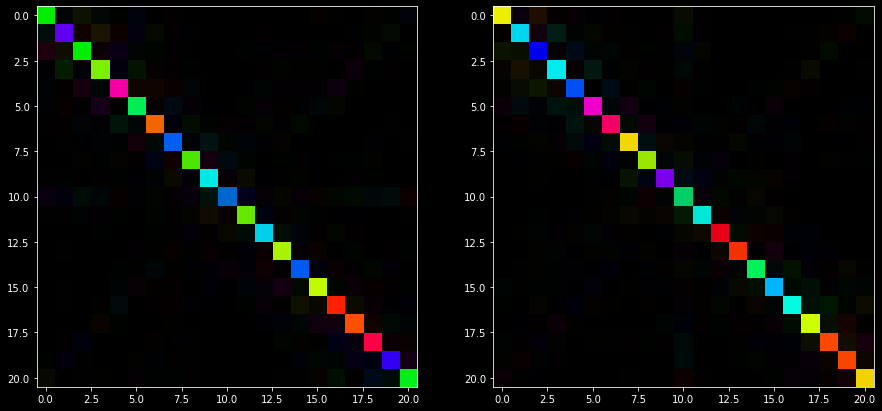

In [6]:
#Calculate the metrics to see how well the calculation went
# ipol=1
# ModeMetrics_Ref=Modelab.CalculateCouplingAndMetrics(GaussianRef, ExperData.Field[:,ipol2,:,:],ExperData.pixelSize)
ModeMetrics=MetricCals.CalculateCouplingAndMetrics(InputModes_Ideal, ExperData.Field[:,ipol1,:,:],ExperData.pixelSize)
# ModeMetrics=Modelab.CalculateCouplingAndMetrics(Field_test[:,ipol1,:,:], ExperData.Field[:,ipol1,:,:],ExperData.pixelSize)
# ModeMetrics=Modelab.CalculateCouplingAndMetrics(Field_test[:,ipol1,:,:], InputModes_Ideal,ExperData.pixelSize)


IL,MDL,SingularValues=MetricCals.CalculateILAndMDL(ExperData.CouplingMatrix[:,:,ipol1])
outputstr='IL= '+ str(IL) +' MDL= ' +str(MDL)
print(outputstr)
plt.figure(1)
# plt.imshow(cmplxplt.ComplexArrayToRgb(ExperData.Field[0,1,:,:]))
plt.subplot(1,2,1)
plt.imshow(cmplxplt.ComplexArrayToRgb(ModeMetrics.CouplingMatrix[:,:]))
# plt.imshow(cmplxplt.ComplexArrayToRgb(ExperData.CouplingMatrix[:,:,ipol1]))
plt.subplot(1,2,2)
# plt.imshow(cmplxplt.ComplexArrayToRgb(ModeMetrics_Ref.CouplingMatrix[:,:]))
# plt.imshow(cmplxplt.ComplexArrayToRgb(ExperData.CouplingMatrix[:,:,ipol2]))
plt.imshow(cmplxplt.ComplexArrayToRgb(ExperData.CouplingMatrix[:,:,ipol1]))


In [123]:
REphsae=np.angle(ModeMetrics.CouplingMatrix[1,1])
ExpoPhase=np.angle(ExperData.CouplingMatrix[1,1,ipol1])
diff=(REphsae-ExpoPhase)/np.pi
print(REphsae)
print(ExpoPhase)
print(diff)

1.2781236586504745
0.29267246
0.31367886037472453


In [7]:
ipywidgets.interact(Modelab.PlotResults,imode=(0,modeCount-1,1),ipol=ipywidgets.fixed(ipol1),Analy_Modes=ipywidgets.fixed(InputModes_Ideal),ExperData=ipywidgets.fixed(ExperData),Metrics=ipywidgets.fixed(ModeMetrics))


interactive(children=(IntSlider(value=10, description='imode', max=20), Output()), _dom_classes=('widget-inter…

<function MyLibs.ModelabProcessBatchFile.PlotResults(imode, ipol, Analy_Modes, ExperData, Metrics)>

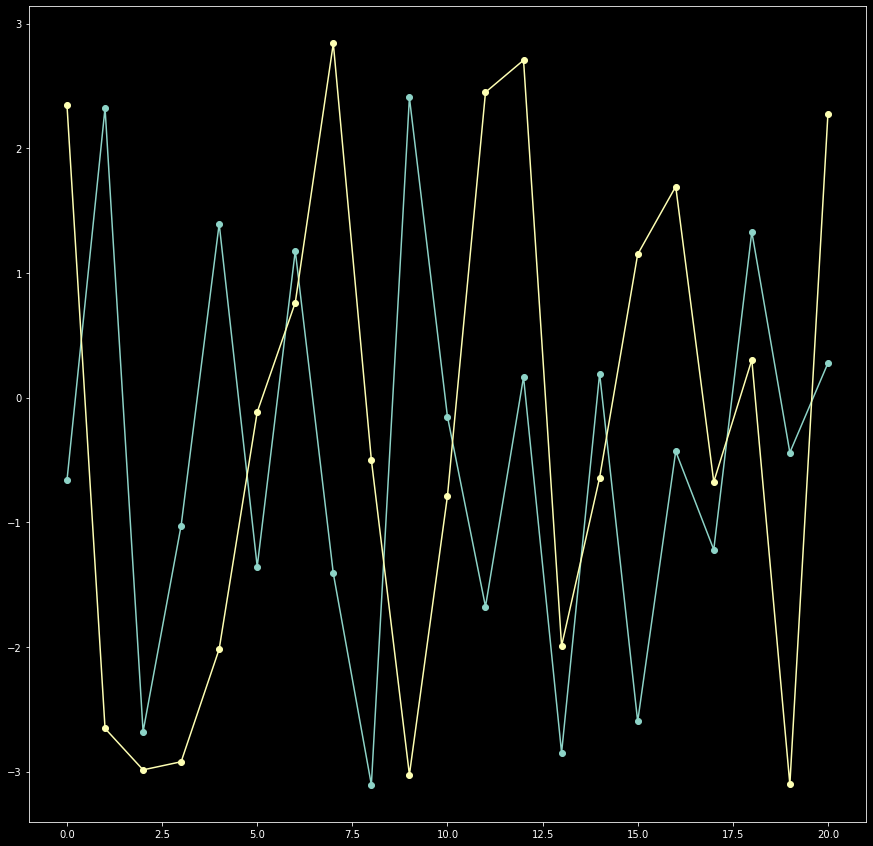

In [186]:
plt.plot(np.angle(GlobalPhaseShift[:,ipol2]),marker='o')
DiagAngle=np.angle(np.diag(ModeMetrics.CouplingMatrix[:,:]))
plt.plot(DiagAngle,marker='o')

In [ ]:
plt.figure(1)
# plt.imshow(cmplxplt.ComplexArrayToRgb(ExperData.Field[0,1,:,:]))
plt.subplot(1,2,1)
# plt.imshow(cmplxplt.ComplexArrayToRgb(ModeMetrics.CouplingMatrix[:,:]))
plt.imshow(cmplxplt.ComplexArrayToRgb(ExperData.CouplingMatrix[:,:,ipol1]))
plt.subplot(1,2,2)
# plt.imshow(cmplxplt.ComplexArrayToRgb(ModeMetrics_Ref.CouplingMatrix[:,:]))
plt.imshow(cmplxplt.ComplexArrayToRgb(ExperData.CouplingMatrix[:,:,ipol2]))


DiagPhase=np.angle(np.diag(ExperData.CouplingMatrix[:,:,ipol1]))
reflinePhase=(np.angle(ExperData.CouplingMatrix[:,10,ipol2]))
shift_1st=DiagPhase[0]-reflinePhase[0]
shift_2nd=DiagPhase[10]-reflinePhase[10]
Diag=np.angle(np.diag(ExperData.CouplingMatrix[:,:,ipol1]))
reflineNew=(ExperData.CouplingMatrix[:,10,ipol2])*np.exp(1j*(shift))
# refline=np.angle(reflineNew)
refline=copy.deepcopy(reflinePhase+shift_1st)
for imode in range(modeCount):
    if imode>9:
        refline[imode]=reflinePhase[imode]
    else:
        refline[imode]=reflinePhase[imode]
# drift=refline[0]
# for imode in range(modeCount):
#     TempVal=refline[imode]+shift
#     if (TempVal>np.pi):
#         TempVal=-(TempVal-np.pi)
#     refline[imode]=TempVal
    
diff=np.unwrap((Diag-refline))
refline_diff=abs(refline[0]-refline)
Diag_diff=abs(Diag[0]-Diag)
plt.figure()
plt.subplot(1,3,1)
plt.plot(modeIndices[1,:],(Diag),marker='o')
plt.plot(modeIndices[1,:],(refline),marker='o')
plt.subplot(1,3,2)
plt.plot(modeIndices[1,:],diff,marker='o')
plt.subplot(1,3,3)
plt.plot(modeIndices[1,:],np.unwrap(refline_diff),marker='o')
plt.plot(modeIndices[1,:],np.unwrap(Diag_diff),marker='o')




## Below is any code that might needed to be run inbetween other code for debugging

In [ ]:
testMetrics=MetricCals.CalculateCouplingAndMetrics(ExpoDataInputMode.Field,ExpoDataGateMode.Field,ExpoDataGateMode.pixelSize)
plt.figure()
plt.imshow(cmplxplt.ComplexArrayToRgb(testMetrics.CouplingMatrix))
ipywidgets.interact(OpticOp.PlotPhaseMASKS,imode=(0,maskCount-1,1),planeCount =ipywidgets.fixed(planeCount),MASKS=ipywidgets.fixed(NewMASKS))

In [ ]:
  # Load the Experimental fields
foldername='..'+slash+'..'+slash+'Main';
# Read in the data from ModeLab
filePathMode=foldername+slash+'batchBatch_MPLC_'+str(0)+'.mat';
data_mat=scipy.io.loadmat(filePathMode)
fieldScaler=data_mat['fieldScale']
inv_fieldScaler=(1.0/(fieldScaler));
fieldR=data_mat['fieldR'];#Real part of Fields
fieldI=data_mat['fieldI'];#Imaginary part of Fields
Dims=np.shape(fieldR);
modeCount_Field= Dims[0];
Ny= Dims[1];
Nx=Dims[2];
polCount=2

Field=np.zeros([polCount,modeCount,Ny,Nx],dtype=complex);

for imode in range(modeCount):
    for ipol in range(polCount):
        frameIdx = (imode)*polCount+ipol;
        ScaleTerm=fieldScaler[ipol,imode]
        print(ScaleTerm)
        Field[ipol,imode,:,:]= (1.0/ScaleTerm)*((fieldR[frameIdx,:,:])+ 1j*(fieldI[frameIdx,:,:])); 

        
GlobalGobPhaseShift=(np.sum(np.sum(Field[1,0,:,:])));
print(GlobalGobPhaseShift)
test=(1.0/fieldScaler[1,0])*((fieldR[1,:,:])+ 1j*(fieldI[1,:,:]))
plt.imshow(abs(test))
print(np.exp(-1j*np.angle(np.sum(test))))
print(np.angle(np.exp(-1j*np.angle(np.sum(test)))))

# Checking some stuff with LG modes

0.0
0.3141592653589793
0.6283185307179586
0.9424777960769379
1.2566370614359172
1.5707963267948966
1.8849555921538759
2.199114857512855
2.5132741228718345
2.827433388230814
IL= 0.5047750340747728 MDL= 2.4485149976613947 Vis= 0.7960125069947304 sum(diag)=15.918504227384403 SNR=5.913163509142667


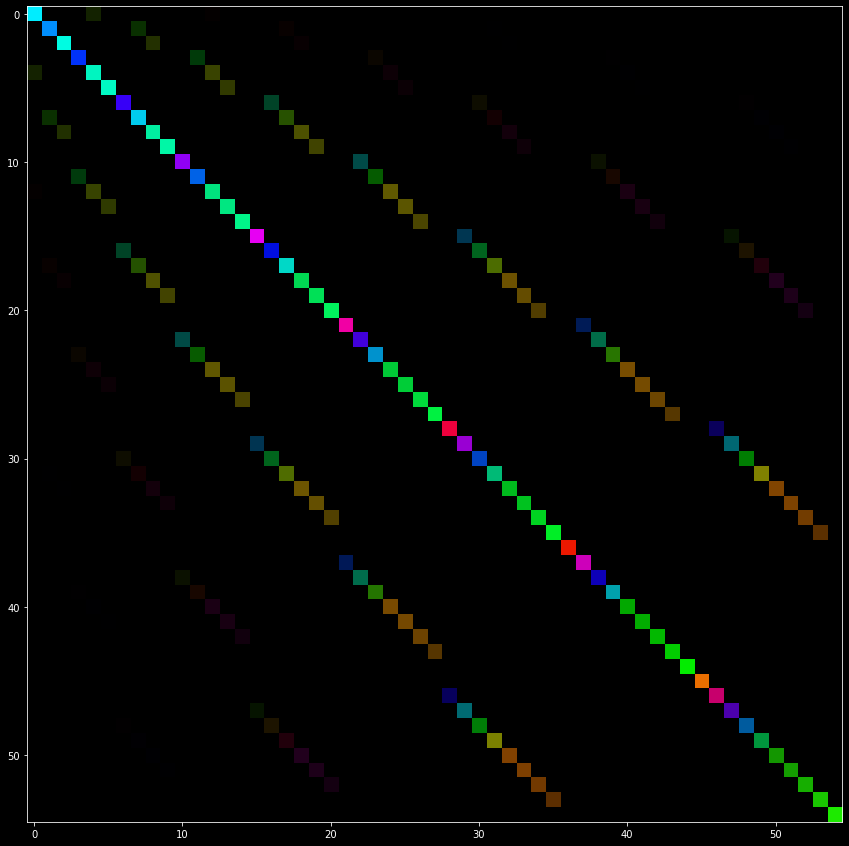

In [121]:
LG_z0=np.zeros((ExperData.modeCount_ReconBasis,ExperData.Ny,ExperData.Nx),dtype=np.complex128)
LG_z1mm=np.zeros((ExperData.modeCount_ReconBasis,ExperData.Ny,ExperData.Nx),dtype=np.complex128)

XGrid, YGrid= np.meshgrid(ExperData.x,ExperData.y)
z_dist=0
# # Make the LG modes
imode=0
for mgIdx in range(maxModeGroup):
    #zero-based index of the mode-group
    mgIDX = mgIdx;
    GroupPhaseShift=np.pi*(mgIdx/maxModeGroup)
    print(GroupPhaseShift)
    #For every mode in this group (there will be mgIdx of them)
    for modeIdx in range(mgIdx+1):
        #m+n should equal mgIDX.
        #Go through each m,n combo in this group starting with max m
        n = mgIDX-(modeIdx);
        m = mgIDX-n;
        l=m-n;
        p=min([n,m]);
        ExperData.modeIndices[0,imode]=p
        ExperData.modeIndices[1,imode]=l
        #Calculate this HG(m,n) mode
        # w0Output
        LG_z0[imode,:,:]= GaussBeams.GenerateLGMode(ExperData.MFD, ExperData.wavelen,p,l, ExperData.pixelSize,XGrid,YGrid, 0, 0)
        LG_z1mm[imode,:,:]= GaussBeams.GenerateLGMode(ExperData.MFD, ExperData.wavelen,p,l, ExperData.pixelSize,XGrid,YGrid, -2e-1, 0)
        imode=imode+1
        
TestLGDistMetrics=MetricCals.CalculateCoupMatrixAndMetrics(LG_z0, LG_z1mm,ExperData.pixelSize)
plt.figure()
plt.imshow(cmplxplt.ComplexArrayToRgb(TestLGDistMetrics.CouplingMatrix))


# This code was the original code that worked at run to fix phase with dual pol method. It might be obsolete now

In [ ]:
# flags to turn on and off for whole code
flipCamImag=False;
flipFields=False;
TransposeFields=False;
flipMetricMatrices=False;#This should be set to true for the XGates results 
wavelen=1565e-9;
maxModeGroup=9;
mplcIdx=0;
if(mplcIdx==0):
    ModeType='LGAzim';
    ModeType='LGModeGroup';
    
elif(mplcIdx==1):
    ModeType='XGate';
    ModeType='ZGate';
    ModeType='DFTGate';
else:
    print('mplcIdx needs to be set to a valid number')
# Load the Experimental fields
foldername='..'+slash+'..'+slash+'Main';
# Read in the data from ModeLab
filePathMode=foldername+slash+'batchBatch_MPLC_'+str(mplcIdx)+'.mat';
ExperData=Modelab.ReadDataFromDigholo(filePathMode,flipCamImag,flipFields,TransposeFields,wavelen)
modeCount=ExperData.modeCount_Basis;

# Make Theoretical modes for LG basis
# setup the LG indices
if(ModeType=='LGAzim'):
    modeIndices=np.zeros([2,modeCount],dtype=int);
    # AzimthalIndeices=np.arange(-maxModeGroup,maxModeGroup+1,dtype=int);
    AzimthalIndeices=np.asarray([0,1,-1,2,-2,3,-3,4,-4,5,-5,6,-6,7,-7,8,-8],dtype=int)
    modeIndices[1,:]=AzimthalIndeices
    # Make the LG modes
    ExperData.modeIndices=modeIndices
    InputModes_Ideal=(QGateGen.GenerateLGAzthmModes(ExperData.x,ExperData.y,0.0,ExperData.MFD,ExperData.wavelen,ExperData.modeIndices))

elif(ModeType=='XGate' or ModeType=='DFTGate' or ModeType=='ZGate'):
    modeIndices=np.zeros([2,modeCount],dtype=int);
    modeIndices[1,:]=np.arange(-maxModeGroup,maxModeGroup+1,dtype=int);
    # Make the LG modes
    ExperData.modeIndices=modeIndices
    InputModes_Ideal=QGateGen.GenerateLGAzthmModes(ExperData.x,ExperData.y,0.0,ExperData.MFD,ExperData.wavelen,ExperData.modeIndices)
    # Make the modes after the gate operations
    ExperData.modeIndices=modeIndices;
    InputModes_Ideal=QGateGen.GenerateGateModes(ModeType,InputModes_Ideal);
elif(ModeType=='LGModeGroup'):
    # modeIndices=np.zeros([2,modeCount],dtype=int);
    # # AzimthalIndeices=np.arange(-maxModeGroup,maxModeGroup+1,dtype=int);
    # AzimthalIndeices=np.asarray([0,1,-1,2,-2,3,-3,4,-4,5,-5,6,-6,7,-7,8,-8],dtype=int)
    # modeIndices[1,:]=AzimthalIndeices
    # # Make the LG modes
    # ExperData.modeIndices=modeIndices
    
    InputModes_Ideal=np.zeros((modeCount,ExperData.Ny,ExperData.Nx),dtype=np.complex128)
    imode=0
    XGrid, YGrid= np.meshgrid(ExperData.x,ExperData.y)
    z_dist=0
    for mgIdx in range(maxModeGroup):
        #zero-based index of the mode-group
        mgIDX = mgIdx;
        #For every mode in this group (there will be mgIdx of them)
        for modeIdx in range(mgIdx+1):
            #m+n should equal mgIDX.
            #Go through each m,n combo in this group starting with max m
            n = mgIDX-(modeIdx);
            m = mgIDX-n;
            l=m-n;
            p=min([n,m]);
            #Calculate this HG(m,n) mode
            # w0Output
            InputModes_Ideal[imode,:,:]= GaussBeams.GenerateLGMode(ExperData.MFD, ExperData.wavelen,p,l, ExperData.pixelSize,XGrid, YGrid, z_dist, 0)
            imode=imode+1
else:
    print("Mode type not implemented yet")

XGrid, YGrid= np.meshgrid(ExperData.x,ExperData.y)
GaussianRef=np.zeros([modeCount,ExperData.Ny,ExperData.Nx],dtype=complex)
for imode in range(modeCount):
    #Make Gassuain spots
    # MFD=2*1231.289e-6#for 650e-6 mask fields
    GaussianRef[imode,:,:]=GaussBeams.GaussianBeam(ExperData.MFD, wavelen,ExperData.pixelSize ,XGrid, YGrid, 0)
#Fix Phase of experimental field
#NOTE this doesn't do anything to the Metrics it just makes the fields look
#better by adjusting the global phase of each field
ipol1=0
if(ExperData.polCount>1):
    # ipol1=0
    if (ipol1==0):
        ipol2=1
    elif (ipol1==1):
        ipol2=0
    else:
        print("ipol can only be 0 or 1")

    ModeMetrics=MetricCals.CalculateCoupMatrixAndMetrics(InputModes_Ideal, ExperData.Field[:,ipol1,:,:],ExperData.pixelSize)

    refline=np.angle(ExperData.CouplingMatrix[:,10,ipol2])
    diag=np.angle(np.diag(ExperData.CouplingMatrix[:,:,ipol1]))
    GlobalPhaseShift=np.zeros([modeCount,2],dtype=complex) 
    shift=refline[0]-diag[0]
    # GlobalGobPhaseShift=np.exp(-1j*np.angle(np.sum(np.sum(ExperData.Field[0,ipol2,:,:]))));
    GlobalGobPhaseShift=np.exp(-1j*np.angle(np.sum(np.sum(np.conj(GaussianRef[imode,:,:])*ExperData.Field[0,ipol2,:,:]))));

    # GlobalGobPhaseShift=(np.angle(np.sum(np.sum(ExperData.Field[0,ipol2,:,:]))));
    Field_test=np.zeros([ExperData.modeCount,ExperData.polCount,ExperData.Ny,ExperData.Nx],dtype=complex)
    # print(np.angle(np.sum(np.sum((ExperData.Field[0,ipol1,:,:])*ExperData.Field[0,ipol1,:,:]))))
    for imode in range(modeCount):
        # if(imode==0):
        #     GlobalPhaseShift[imode,ipol2]=np.angle(np.sum(np.sum(np.conj(GaussianRef[imode,:,:])*ExperData.Field[imode,ipol2,:,:])));
        # else:
        #     # GlobalPhaseShift[imode,ipol2]=np.angle(np.sum(np.sum(np.conj(ExperData.Field[0,ipol2,:,:]*np.exp(-1j*GlobalPhaseShift[0,ipol2]))*ExperData.Field[imode,ipol2,:,:])));
        #     GlobalPhaseShift[imode,ipol2]=np.angle(np.sum(np.sum(np.conj(ExperData.Field[0,ipol2,:,:])*ExperData.Field[imode,ipol2,:,:])));
            
        # maxPWR=np.max(np.abs(ExperData.Field[imode,ipol2,:,:])**2)  
        # # GlobalOverlap=OpticOp.overlap( ExperData.Field[imode,ipol2,:,:], ExperData.Field[imode,ipol2,:,:])
        # # print(GlobalOverlap)
        # # GlobalPhaseShift=np.angle(GlobalOverlap)
        # PwrMask=np.abs(ExperData.Field[imode,ipol2,:,:])**2 > (0.1*maxPWR)
        # GlobalPhaseShift[imode,ipol2]=np.sum(np.angle(ExperData.Field[imode,ipol2,:,:])*PwrMask)/np.sum(PwrMask)
        
        GlobalPhaseShift[imode,ipol1]=np.angle(np.sum(np.sum(np.conj(InputModes_Ideal[imode,:,:])*ExperData.Field[imode,ipol1,:,:])));
        # GlobalPhaseShift[imode,ipol2]=np.angle(np.sum(np.sum(np.conj(ExperData.Field[0,ipol2,:,:])*ExperData.Field[imode,ipol2,:,:])))+GlobalGobPhaseShift;
        # ExperData.Field[imode,ipol1,:,:]= ExperData.Field[imode,ipol1,:,:]*np.exp(-1j*GlobalPhaseShift[imode,ipol1])
        GlobalPhaseShift[imode,ipol2]=np.exp(-1j*np.angle(np.sum(np.sum(np.conj(ExperData.Field[0,ipol2,:,:])*ExperData.Field[imode,ipol2,:,:]))))*GlobalGobPhaseShift;
        Field_test[imode,ipol1,:,:]= ExperData.Field[imode,ipol1,:,:]*(GlobalPhaseShift[imode,ipol2])
        
        # InputModes_Ideal[imode,:,:]=InputModes_Ideal[imode,:,:]*np.conj(GlobalPhaseShift[imode,ipol2])
        ExperData.CouplingMatrix[:,imode,ipol1]=ExperData.CouplingMatrix[:,imode,ipol1]*GlobalPhaseShift[imode,ipol2]
        # # GlobalPhaseShift=np.mean(np.angle(ExperData.Field[imode,ipol2,:,:])*PwrMask)
        # ExperData.Field[imode,ipol1,:,:]= ExperData.Field[imode,ipol1,:,:]*np.exp(-1j*GlobalPhaseShift[imode,ipol1])
        # ExperData.Field[imode,ipol2,:,:]= ExperData.Field[imode,ipol2,:,:]*np.exp(-1j*GlobalPhaseShift[imode,ipol2])
        
        # GlobalPhaseShift[imode,ipol1]=np.angle(np.sum(np.sum(np.conj(InputModes_Ideal[imode,:,:])*ExperData.Field[imode,ipol1,:,:])));
        # GlobalPhaseShift[imode,ipol2]=np.angle(np.sum(np.sum(np.conj(GaussianRef[imode,:,:])*ExperData.Field[imode,ipol2,:,:])));
        # GlobalPhaseShift[imode,ipol2]=refline[imode]+shift
    # for imode in range(modeCount):
    #         ExperData.Field[imode,ipol1,:,:]= ExperData.Field[imode,ipol1,:,:]*GlobalPhaseShift[imode,ipol2]
    #         # ExperData.Field[imode,ipol1,:,:]= ExperData.Field[imode,ipol1,:,:]*np.exp(-1j*GlobalPhaseShift[imode,ipol2])
    #         ExperData.CouplingMatrix[imode,:,ipol1]=ExperData.CouplingMatrix[imode,:,ipol1]*GlobalPhaseShift[imode,ipol2]
        
        # print(GlobalPhaseShift)
        # ExperData.Field[imode,ipol1,:,:]= ExperData.Field[imode,ipol1,:,:]*np.exp(-1j*GlobalPhaseShift)
    #     Fix Phase of Input modes
    #      phaseDiff=angle(sum(sum(conj(InputModes(imode,:,:)).*ExpoDataInputMode.Field(imode,:,:))));
    #      ExpoDataInputMode.Field(imode,:,:)= ExpoDataInputMode.Field(imode,:,:).*exp(-1i.*phaseDiff);
    #     #  Fix Phase of Gate
    #      phaseDiff=angle(sum(sum(conj(GateModes(imode,:,:)).*ExpoDataGateMode.Field(imode,:,:))));
    #      ExpoDataGateMode.Field(imode,:,:)= ExpoDataGateMode.Field(imode,:,:).*exp(-1i.*phaseDiff);
    # shift=abs(GlobalPhaseShift[0,ipol1]-GlobalPhaseShift[0,ipol2])
    # # GlobalPhaseShift[:,ipol1]=np.roll(GlobalPhaseShift[:,ipol1],shift=0,axis=0);
    # plt.figure()
    # plt.subplot(1,2,1)
    # # plt.plot(modeIndices[1,:],GlobalPhaseShift[:,ipol1],marker='o')
    # test=np.angle(ModeMetrics.DiagCoup)
    # plt.plot(modeIndices[1,:],test,marker='o')
    # plt.plot(modeIndices[1,:],diag,marker='o')
    # # plt.plot(modeIndices[1,:],GlobalPhaseShift[:,ipol2],marker='o')

    # plt.subplot(1,2,2)
    # plt.plot(abs(GlobalPhaseShift[:,ipol1]-GlobalPhaseShift[:,ipol2]))

    # ExperData.CouplingMatrix[:,:,ipol1]=ExperData.CouplingMatrix[:,:,ipol1]*GlobalPhaseShift[:,ipol2]
print("test")
print(ExperData.CouplingMatrix.shape)    
ModeMetrics=MetricCals.CalculateCoupMatrixAndMetrics(InputModes_Ideal, ExperData.Field[:,ipol1,:,:],ExperData.pixelSize)

ipywidgets.interact(Modelab.PlotResults,imode=(0,modeCount-1,1),ipol=ipywidgets.fixed(ipol1),Analy_Modes=ipywidgets.fixed(InputModes_Ideal),ExperData=ipywidgets.fixed(ExperData),Metrics=ipywidgets.fixed(ModeMetrics))